In [3]:

import sys
sys.path.insert(0, 'C:/Users/marco/Downloads/Thesis_notebooks/Thesis_Marcos')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format ='retina'
from glob import glob
import glob
import matplotlib.gridspec as gridspec
import thesis_functions as mvs
#import pwlf
%matplotlib inline
import pathlib
from pandas.tseries.frequencies import to_offset
from datetime import datetime,date
import ftplib
import os
import timeit
from datetime import datetime, timedelta 
import pwlf
import plots_obs as obs
import data_processing_tools as dpt
import utilities_tools as utt
import support_functions as spf

#import missingno as mis

FileNotFoundError: [Errno 2] No such file or directory: 'SV_project/Data/Imos informations/IMOS_INTERMAGNET.txt'

In [10]:
import pandas as pd
pd.read_csv('Thesis_Marcos/Data/Imos informations/IMOS_INTERMAGNET.txt',
                            skiprows = 1,
                            sep = '\s+',
                            usecols=[0, 1, 2, 3],
                            names = ['Imos', 'Latitude', 'Longitude', 'Elevation'],
                            index_col= ['Imos'])

Latitude  Longitude  Elevation
Imos                                
AAA     43.250     76.920     1300.0
ABG     18.638     72.872        6.0
ABK     68.358     18.823      380.0
AIA    -65.245    -64.258       10.0
API    -13.815   -171.781        2.0
...        ...        ...        ...
TAN    -18.917     47.552     1375.0
TEO     19.747    -99.182     2280.0
TIK     71.580    129.000       57.0
MAA    -22.400    -43.650      457.0
COI     40.223    351.582       99.0

[152 rows x 3 columns]

In [4]:
mvs.load_INTERMAGNET_files('VSS','2010-01-01','2021-12-31')

Reading files from VSS...


X        Y         Z
Date                                            
2010-01-01 00:00:00  17402.60 -7017.70 -13921.30
2010-01-01 00:01:00  17402.80 -7018.00 -13921.50
2010-01-01 00:02:00  17402.70 -7018.00 -13921.50
2010-01-01 00:03:00  17402.70 -7018.10 -13921.50
2010-01-01 00:04:00  17402.70 -7018.10 -13921.50
...                       ...      ...       ...
2021-12-31 23:55:00  16242.50 -6863.53 -15182.93
2021-12-31 23:56:00  16242.29 -6863.58 -15183.04
2021-12-31 23:57:00  16241.96 -6863.66 -15183.10
2021-12-31 23:58:00  16241.84 -6863.72 -15183.18
2021-12-31 23:59:00  16241.76 -6863.80 -15183.21

[6311520 rows x 3 columns]

In [ ]:
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.datasets import load_airline

In [ ]:
transformer = HampelFilter(window_length= 24)
y_hat = transformer.fit_transform(df_CNB['X'].resample('H').mean())

In [ ]:
df_NT = mvs.night_time_selection(df_NT, '2010-01', '2021-06')

In [ ]:
df_TT = mvs.remove_Disturbed_Days(df_T,'2010','2021-08')

In [ ]:
df_HER2 = mvs.keep_Q_Days(df_HER,'2010','2019-12')

In [ ]:
mvs.check_data_availability(station = 'thl')

In [ ]:
start_time = datetime.now() 

df_VSS = mvs.load_INTERMAGNET_files(station = 'VSS', starttime = '2000-01-01',endtime = '2021-11-30')

time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))


In [ ]:
dpt.hampel_filter_denoising(df_VSS,100,plot_figure=True)

In [ ]:

def Header_SV_files(station):

    path = 'SV_update/' + station.upper() + '_data/SV_' + station.upper() + '.txt'
    path_header = 'SV_update/' + station.upper() + '_data'


    df_station = pd.read_csv(path,sep = '\s+', index_col = [0])
    df_station.index = pd.to_datetime(df_station.index,infer_datetime_format=True)


    df_IMOS = pd.read_csv('IMOS_INTERMAGNET.txt', sep = '\s+')  
    df_IMOS.set_index('Imos', inplace = True)
    Header = ('Secular Variation repository project\nIAGA CODE '
              + str(station.upper()) + '\nLatitude ' + 
              str(df_IMOS.loc[station.upper()]['Latitude'].round(2))
              +'\nLongitude ' + 
              str(df_IMOS.loc[station.upper()]['Longitude'].round(2)) +'\n\n')
    
    with open(path_header +'/header_file.txt','w+') as f2:
        f2.write(Header)
        header = f2.read()
    
    filenames = [path_header +'/header_file.txt',path]
    with open(path_header + '/Secular_variation_' + station.upper() + '.txt', 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
    
    os.remove(path_header +'/header_file.txt')
        
    

In [ ]:
inp = input('type your name')

In [ ]:

def Header_SV_obs_files(station, filename, data_denoise, external_correction, chaos_model):
    
    #filenames = ['minute_mean','hourly_mean','daily_mean','monthly_mean','annual_mean']
     
    
    path = 'Filtered_data/'+ station +'_data/'+ station.upper() + '_' + filename +'_preliminar.txt'
    path_header = 'Filtered_data/'+ station +'_data'
    destiny_path = 'Filtered_data/'+ station +'_data/'+ station.upper() + '_' + filename +'.txt'
    
    #pathlib.Path(destiny_path).mkdir(parents=True, exist_ok=True)

    df_station = pd.read_csv(path,sep = '\s+', index_col = [0])
    df_station.index = pd.to_datetime(df_station.index,infer_datetime_format=True)


    df_IMOS = pd.read_csv('IMOS_INTERMAGNET.txt', sep = '\s+')  
    df_IMOS.set_index('Imos', inplace = True)
    
    inp5 = 'Y'
    inp = 'DD'
    input_chaos = 'Y'
    
    Header = ('Thesis project provisory header\nIAGA CODE '
              + str(station.upper()) + '\nLatitude ' + 
              str(df_IMOS.loc[station.upper()]['Latitude'].round(2))
              +'\nLongitude ' + 
              str(df_IMOS.loc[station.upper()]['Longitude'].round(2)) +'\nData denoise: ' + data_denoise +
              '\nExternal field reduction: ' + external_correction + '\nCHAOS model correction: ' + chaos_model +  
              '\n\n')
    
    with open(path_header +'/header_file.txt','w+') as f2:
        f2.write(Header)
        header = f2.read()
    
    filenames = [path_header +'/header_file.txt',path]
    with open(destiny_path, 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
    
    os.remove(path_header +'/header_file.txt')
    os.remove(path)

In [ ]:
Header_SV_obs_files('CNB', filename = 'annual_mean')

In [ ]:
Header = 'Secular Variation repositoy project\n' + str(station.upper()) + '\nLatitude ' + str(df_IMOS.loc[station.upper()]['Latitude'].round(2)) +'\nLongitude ' + str(df_IMOS.loc[station.upper()]['Longitude'].round(2)) +'\n'

In [ ]:
Header

In [ ]:
with open('SV_update/VSS_data/newfile.txt','w+') as f2:
    f2.write(Header)
    header = f2.read() 
    

In [ ]:
with open('SV_update\VSS_data\SV_VSS.txt','r') as f:
    
    data = f.read()
    

In [ ]:
filenames = ['SV_update/VSS_data/newfile.txt','SV_update\VSS_data\SV_VSS.txt']
with open('SV_update/VSS_data/result.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [ ]:
df1 = df_VSS.resample('M')['X'].apply(lambda x: (x > 0).sum())

In [ ]:
df_VSS = mvs.calculate_SV(dataframe = df_VSS, starttime = '2010-01-01', endtime = '2021-09', info = 'ADMM', columns = None)

In [ ]:
mvs.SV_(['VSS'],'2005-01-01','2021-06-30',file = "off", external_reduce = 'C', plot_chaos = True)

In [20]:
%%time
df = mvs.load_INTERMAGNET_files(station = 'SHU',starttime = '2010-01-01',endtime = '2021-12-31')
df = utt.HDZ_to_XYZ_conversion(station = "SHU",dataframe=df)    


Reading files from SHU...
CPU times: total: 1min 13s
Wall time: 1min 20s


In [6]:
df_r = dpt.resample_obs_data(df,'M',apply_percentage=True)

df_sv = dpt.calculate_SV(df,apply_percentage= True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

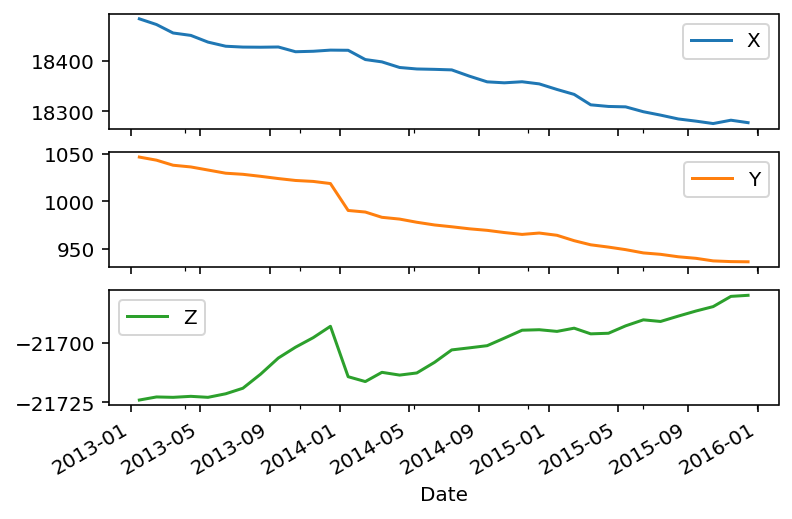

In [18]:
df_r['2013':'2015'].plot(subplots = True)

In [19]:
df_r.loc[df_r.index >'2013-12']

X            Y             Z
Date                                               
2013-12-15  18421.003370  1018.872830 -21693.137474
2014-01-15  18420.669644   990.402060 -21714.267225
2014-02-14  18402.388451   988.737598 -21716.305368
2014-03-15  18397.796375   983.155735 -21712.433327
2014-04-15  18386.718079   981.269143 -21713.591806
...                  ...          ...           ...
2021-08-15  17890.537768   783.478320 -21570.716517
2021-09-15  17885.795165   781.830297 -21567.437965
2021-10-15  17881.013466   779.467011 -21566.449655
2021-11-15  17877.144705   777.318408 -21564.725768
2021-12-15  17878.453396   777.013270 -21562.292963

[97 rows x 3 columns]

In [8]:
df_HDZ = df.loc[df.index >= '2022']

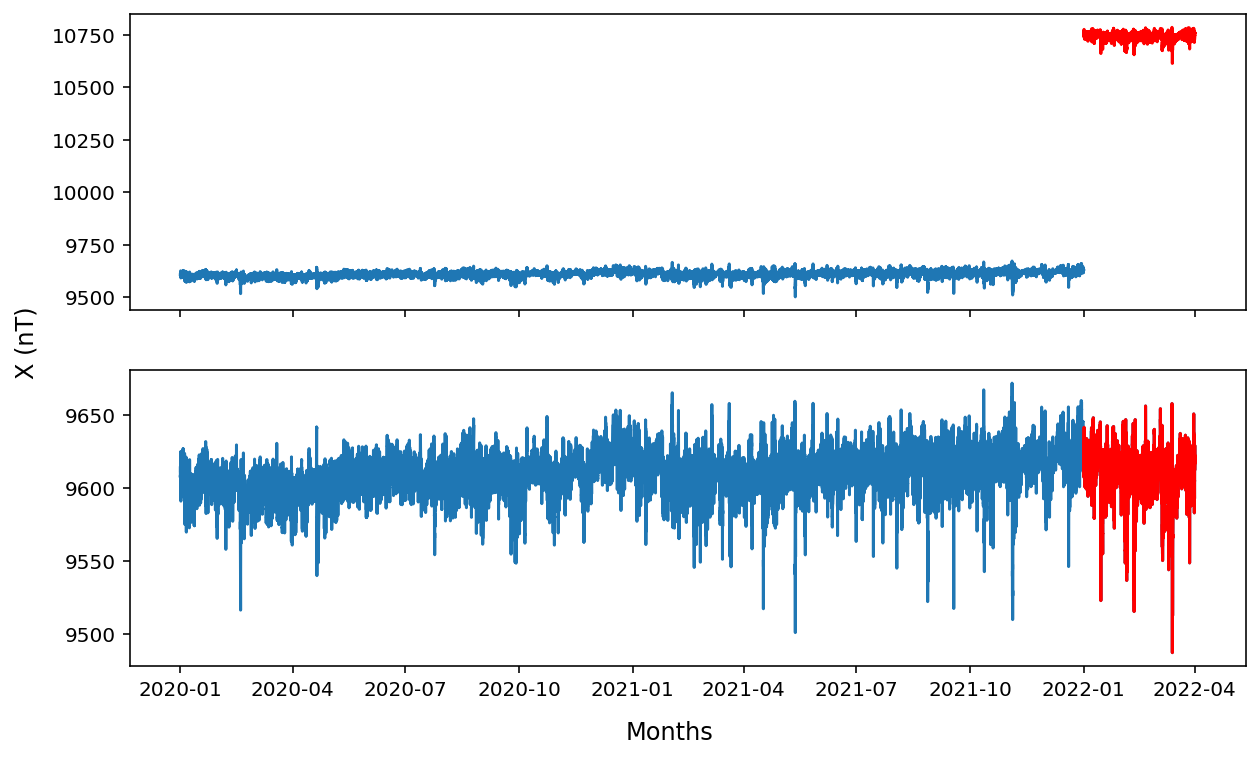

In [28]:
fig, ax = plt.subplots(2,1, figsize = (10,6), sharex=True)

ax[0].plot(df_XYZ['X'])
ax[0].plot(df_HDZ['X'], color = 'red')

ax[1].plot(df['X'])
ax[1].plot(df['X'].loc[df.index >= '2022'],color = 'red')

fig.text(0.5, 0.04, 'Months', ha='center',fontsize = 12)
fig.text(0.045, 0.5, 'X (nT)', va='center', rotation='vertical',fontsize = 12)
plt.savefig('HDZ_conversion.jpeg', dpi = 300)

plt.show()

In [ ]:
sample = 'M'
apply_percentage = True

if sample == 'M' and apply_percentage == True:
    print(True)
    
    
if sample == 'M' and apply_percentage == True:
    
    tmp = df.groupby(pd.Grouper(freq='M')).agg(['mean','count']).swaplevel(0,1,axis=1)
    
    if (tmp['count'].median().any() <= 800) == True:
        
        df_station = df.resample('H').mean()
        tmp['full day'] = df_station.resample('M').mean().index.days_in_month*24
X = tmp['mean','X'].loc[tmp['count','X'] >= tmp['full day']*0.9]
Y = tmp['mean','Y'].loc[tmp['count','Y'] >= tmp['full day']*0.9]
Z = tmp['mean','Z'].loc[tmp['count','Z'] >= tmp['full day']*0.9]

In [ ]:
tmp = df.groupby(pd.Grouper(freq='M')).agg(['mean','count']).swaplevel(0,1,axis=1)

In [8]:
10 - np.nan

nan

In [3]:
df_sv = dpt.calculate_SV(df,apply_percentage=True)
df_sv_false = dpt.calculate_SV(df,apply_percentage=False)

In [5]:
df_D_no = dpt.resample_obs_data(df,sample = 'M')
df_D_yes = dpt.resample_obs_data(df,sample = 'M',apply_percentage=True)

In [ ]:
df_D_yes

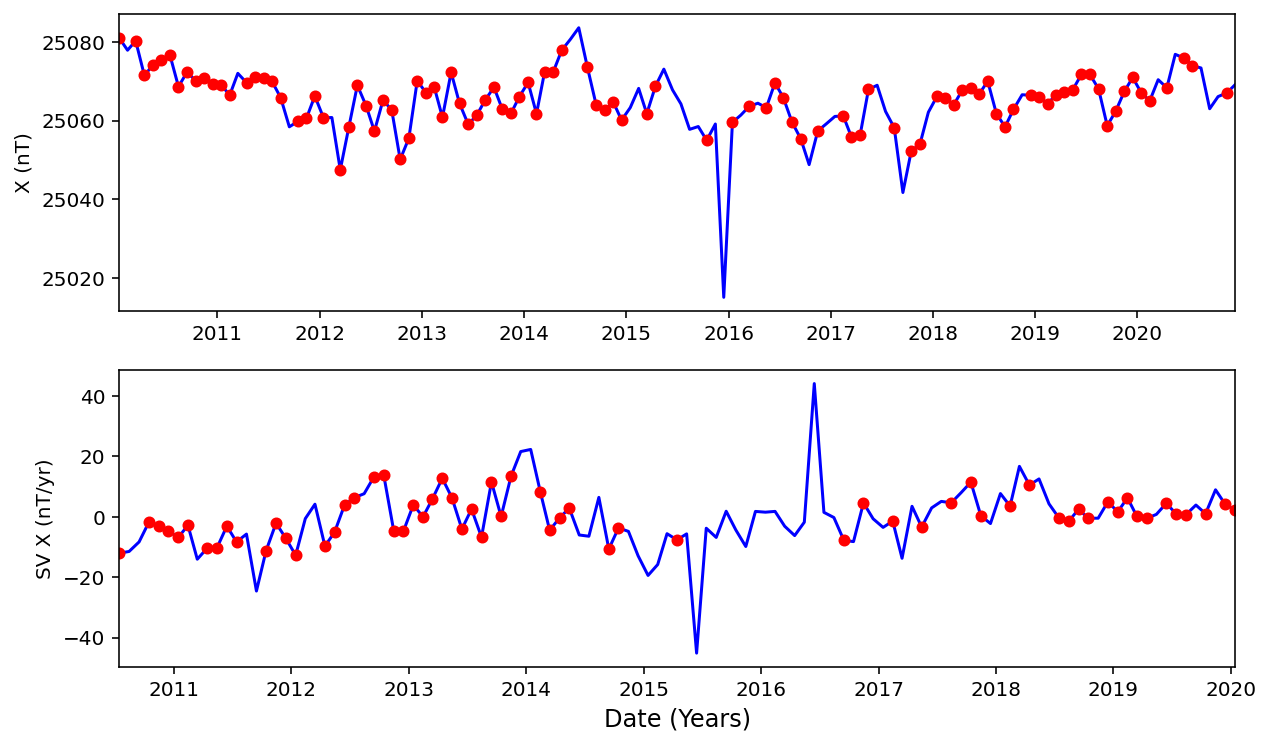

In [35]:
fig, ax = plt.subplots(2,1, figsize = (10,6))
ax[0].plot(df_D_no['X'],color = 'blue')
ax[0].plot(df_D_yes['X'],'o',markersize=5,color = 'red')
ax[0].set_xlim(df_D_no.index[0],df_D_no.index[-1])
ax[1].plot(df_sv_false['X'],color = 'blue')
ax[1].plot(df_sv['X'],'o',markersize=5,color = 'red')
ax[1].set_xlim(df_sv.index[0],df_sv.index[-1])

ax[1].set_xlabel('Date (Years)', fontsize = 12)
ax[1].set_ylabel('SV X (nT/yr)', fontsize = 10)
ax[0].set_ylabel('X (nT)', fontsize = 10)
plt.savefig('resample_condition_YZN.jpeg',dpi = 300)

In [ ]:
files_station = []
files_station.extend(glob.glob('Dados OBS\\*/*/MGD*'))
files_station.sort()

In [ ]:
files_station

In [ ]:
str(df.index[0].date())

In [ ]:
df_imos = pd.read_csv('Dados OBS/Data/Imos informations/IMOS_INTERMAGNET.txt', sep = '\s+')
df_imos.index = df_imos['Imos']

In [ ]:
df_imos.index.get_loc('SBL')

In [ ]:
list(df_imos.index[96::])

In [ ]:
mvs.SV_(stations = ['VSS'],
        starttime = '2010-01-01',
        endtime = '2019-06-30',
        jerk_start_window = '2012-01-15',
        jerk_end_window = '2018-01-15', 
        file = 'off',
        external_reduction = None,
        CHAOS_correction = True,
        hampel_filter = False,
        plot_chaos = True,
        convert_HDZ_to_XYZ=True)

In [2]:
df_chaos = dpt.chaos_model_prediction('VSS','2010-01-01','2022-02-28')
df_obs = mvs.load_INTERMAGNET_files('VSS','2010-01-01','2022-02-28')

Initiating geomagnetic field computation for VSS.
Computing core field.
Computing crustal field up to degree 110.
Computing field due to external sources, incl. induced field: GSM.
Reading files from VSS...


Reading files from HER...
Initiating geomagnetic field computation for HER.
Computing core field.
Computing crustal field up to degree 110.
Computing field due to external sources, incl. induced field: GSM.
The external field predicted using CHAOS-model was removed from the data.

HER Jerk statistics for the X component.

Jerk occurence time -t0-: 2010.28
Jerk amplitute: -7.8
R^2: 0.88

****************************************************************

HER Jerk statistics for the Y component.

Jerk occurence time -t0-: 2010.81
Jerk amplitute: 4.6
R^2: 0.87

****************************************************************

HER Jerk statistics for the Z component.

Jerk occurence time -t0-: 2010.13
Jerk amplitute: -10.0
R^2: 0.93

****************************************************************


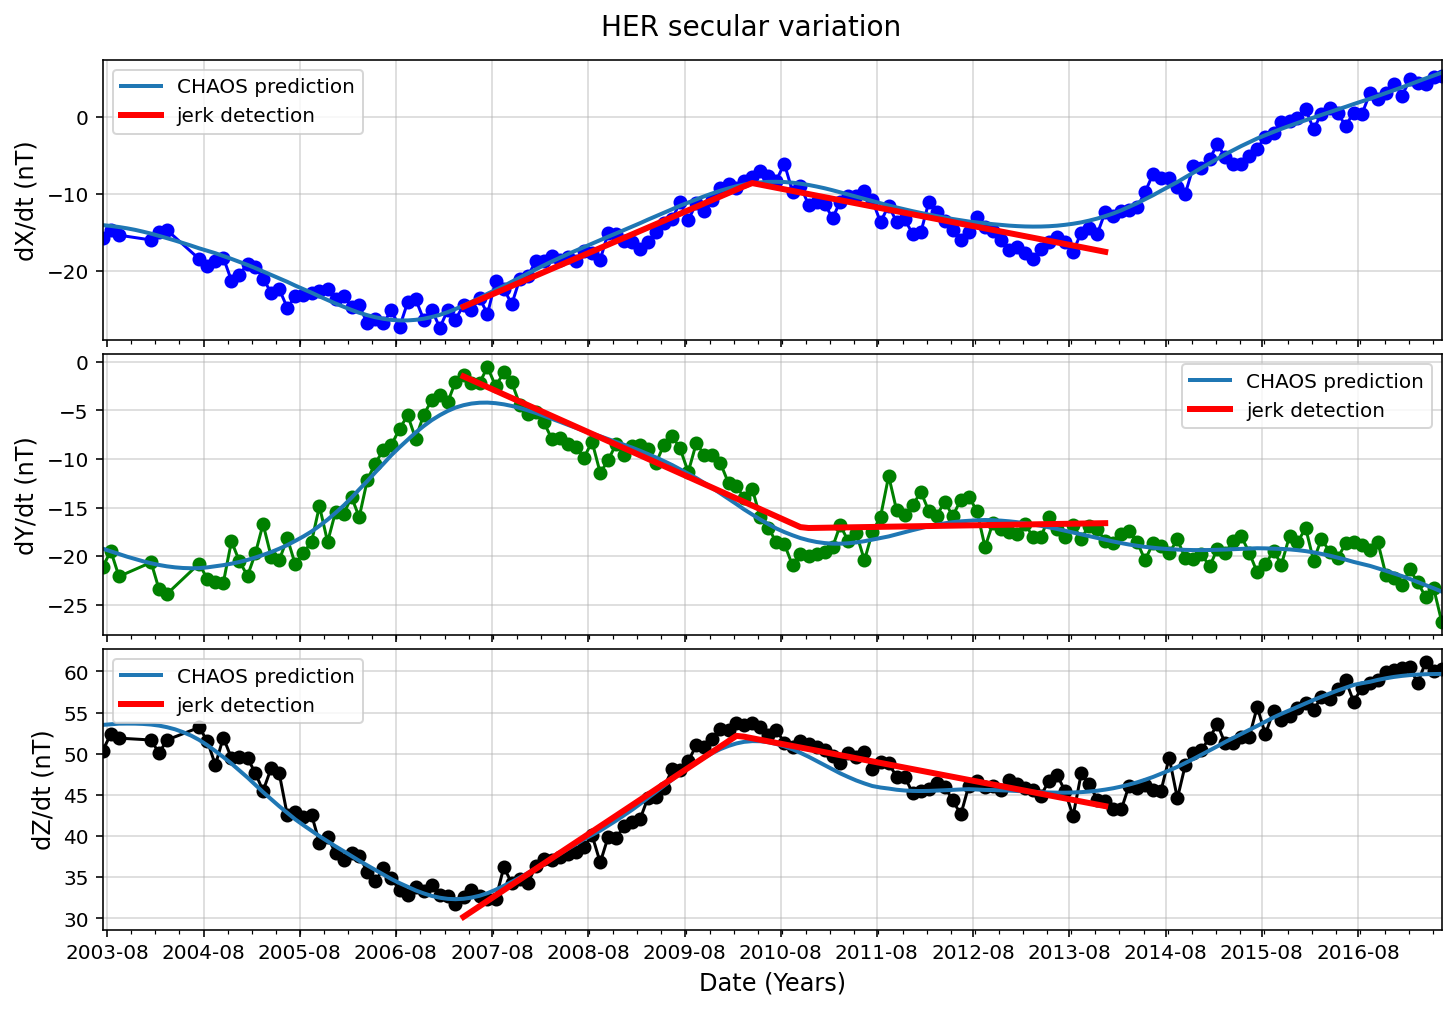

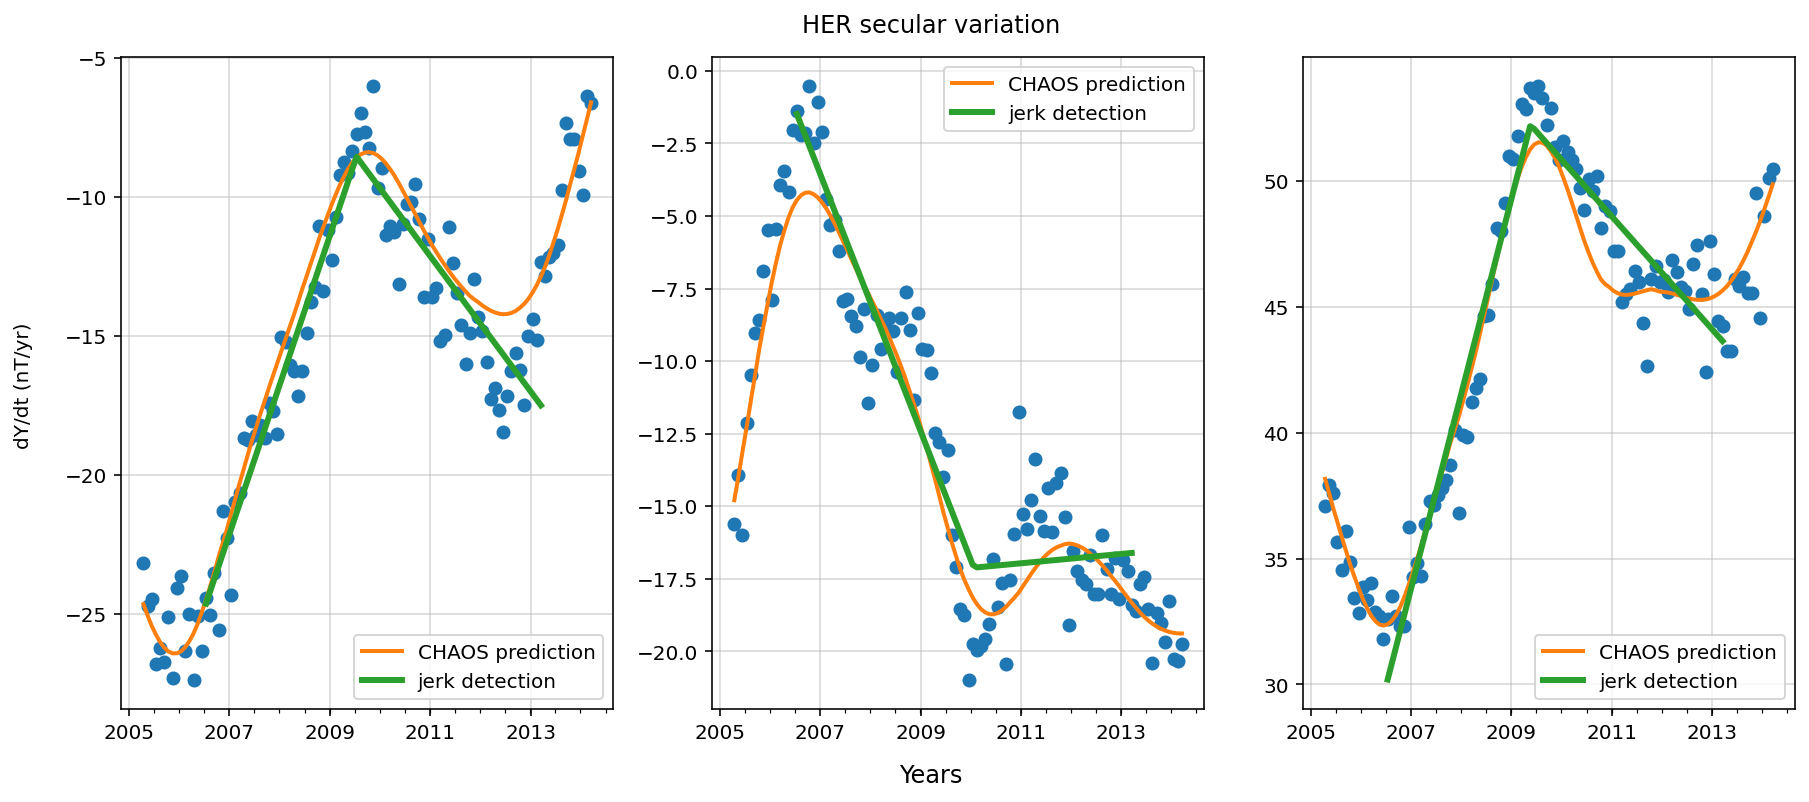

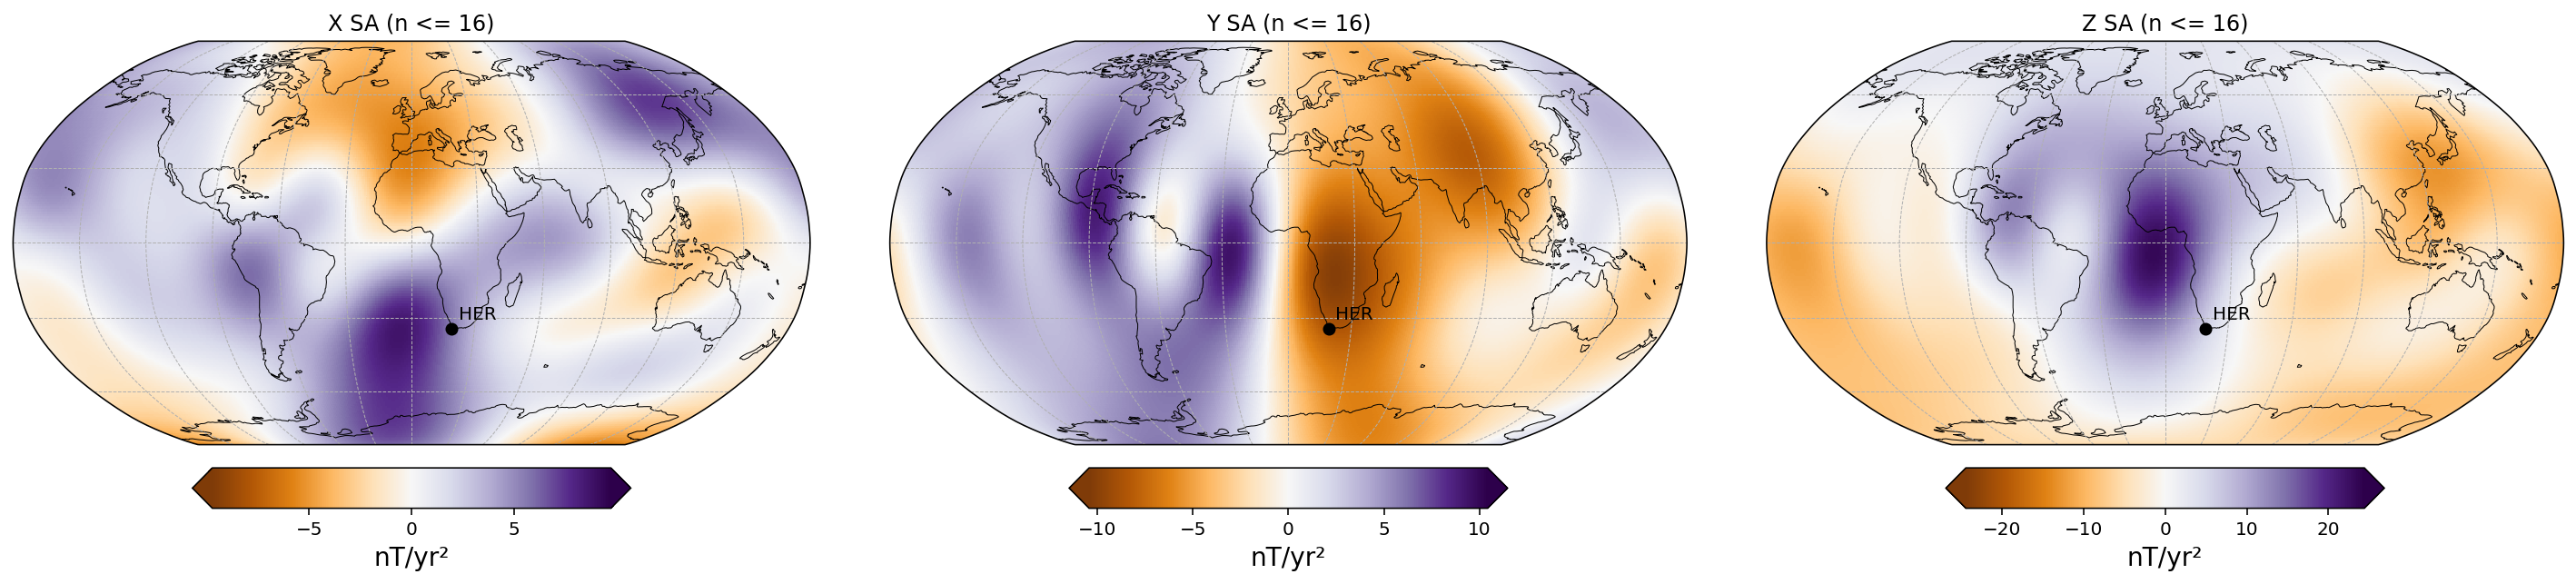

In [2]:
x,y,z,t = dpt.jerk_detection_window(station = 'HER',
                         window_start= '2007-04',
                         window_end = '2013-12',
                         starttime = '2003-01-01',
                         endtime = '2017-12-31',
                         df_station= None,
                         df_CHAOS= None,
                         plot_detection = True,
                         CHAOS_correction = True,
                         plot_CHAOS_prediction = True,
                         convert_hdz_to_xyz = True,
                         save_plots = False)

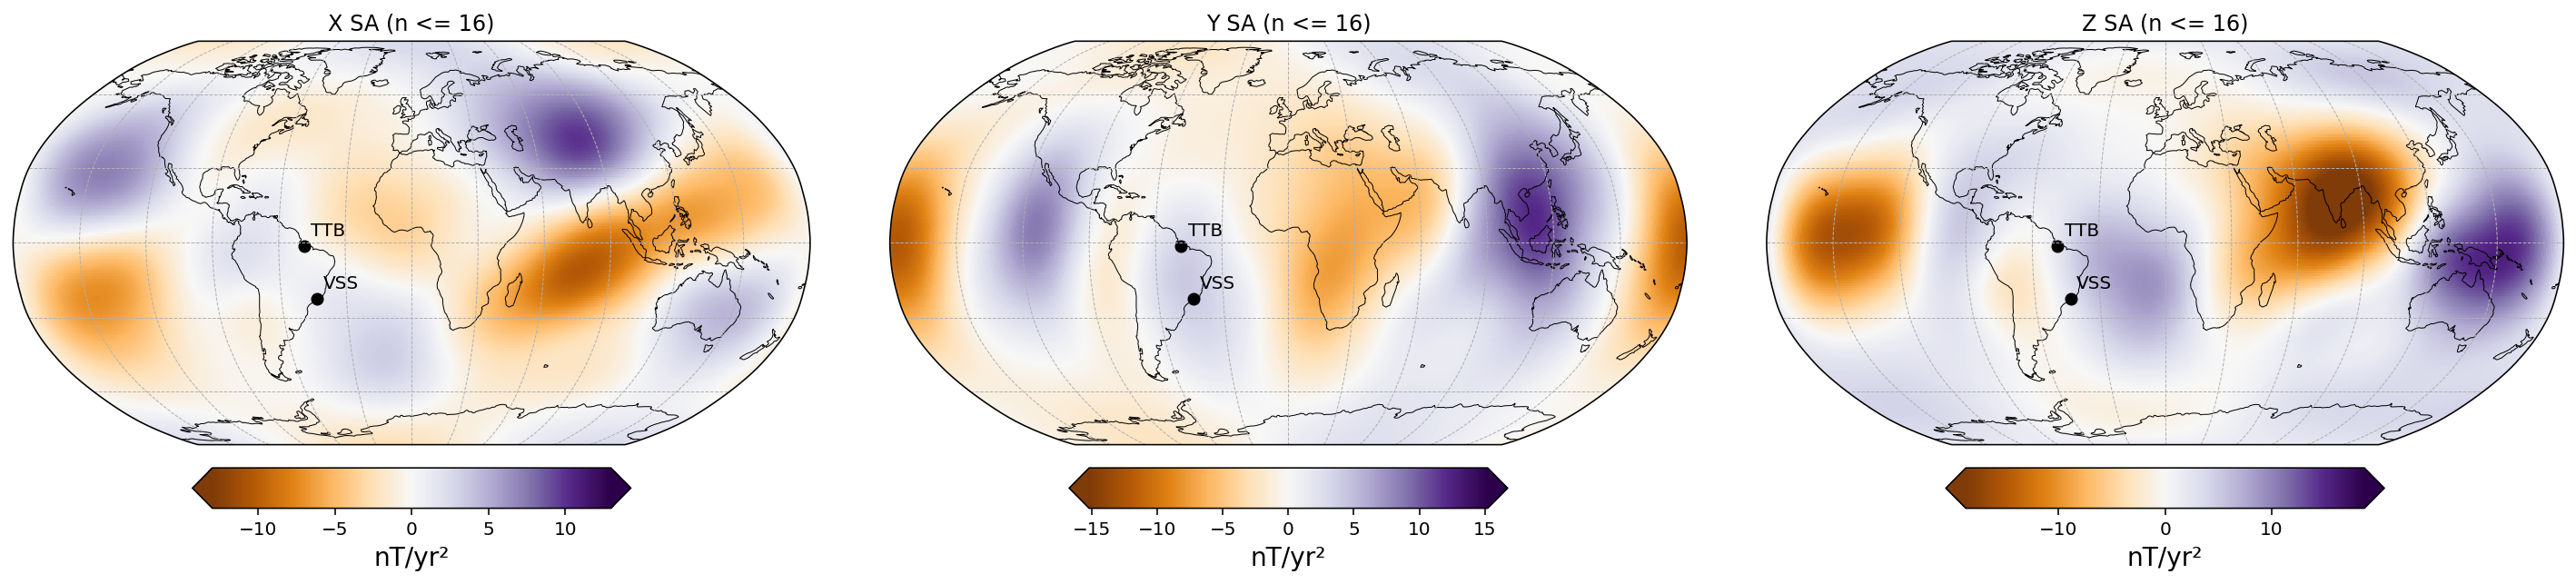

In [4]:
mvs.plot_tdep_map('2021-01-01',deriv = 2,plot_changes=False,station = ['VSS','TTB'])

Reading files from VSS...
Do You Want To denoise the data based on median absolute deviation? [y/n]: n
No data changed.
Press Q to use only Quiet Days, D to remove Disturbed Days, NT to use only the night-time, KP to Kp-Index <=3 or E to Exit without actions [Q/D/NT/KP/E]: E
No action
Do You want to correct the external field using the CHAOS model? [y/n]: y
Initiating geomagnetic field computation for VSS.
Computing core field.
Computing crustal field up to degree 110.
Computing field due to external sources, incl. induced field: GSM.
The external field predicted using CHAOS-model was removed from the data.
Do You Want To Save a File With the Variation? [y/n]: n
No files saved!
Do You Want To Save Plots of the Variation and SV for X, Y and Z? [y/n]: n
No plots saved


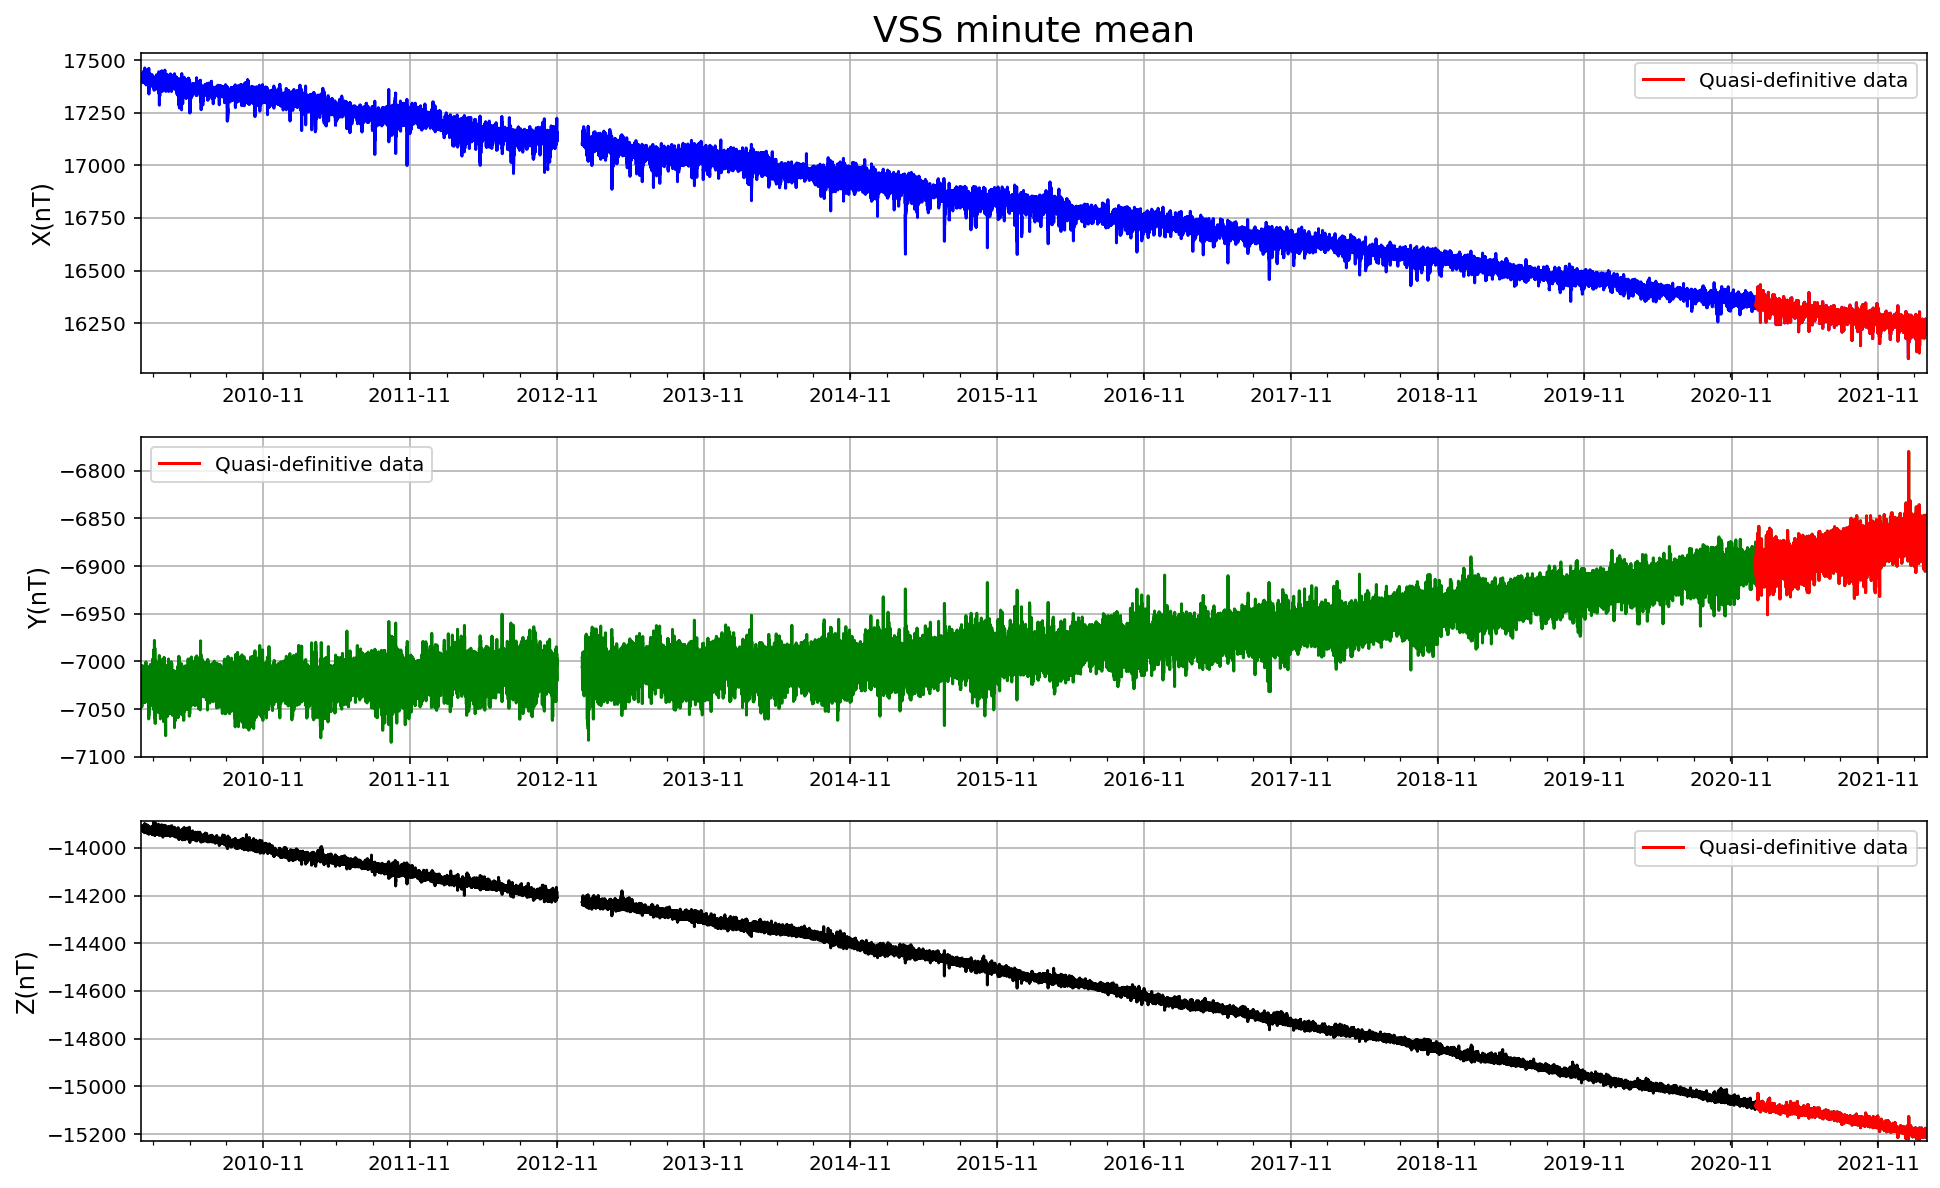

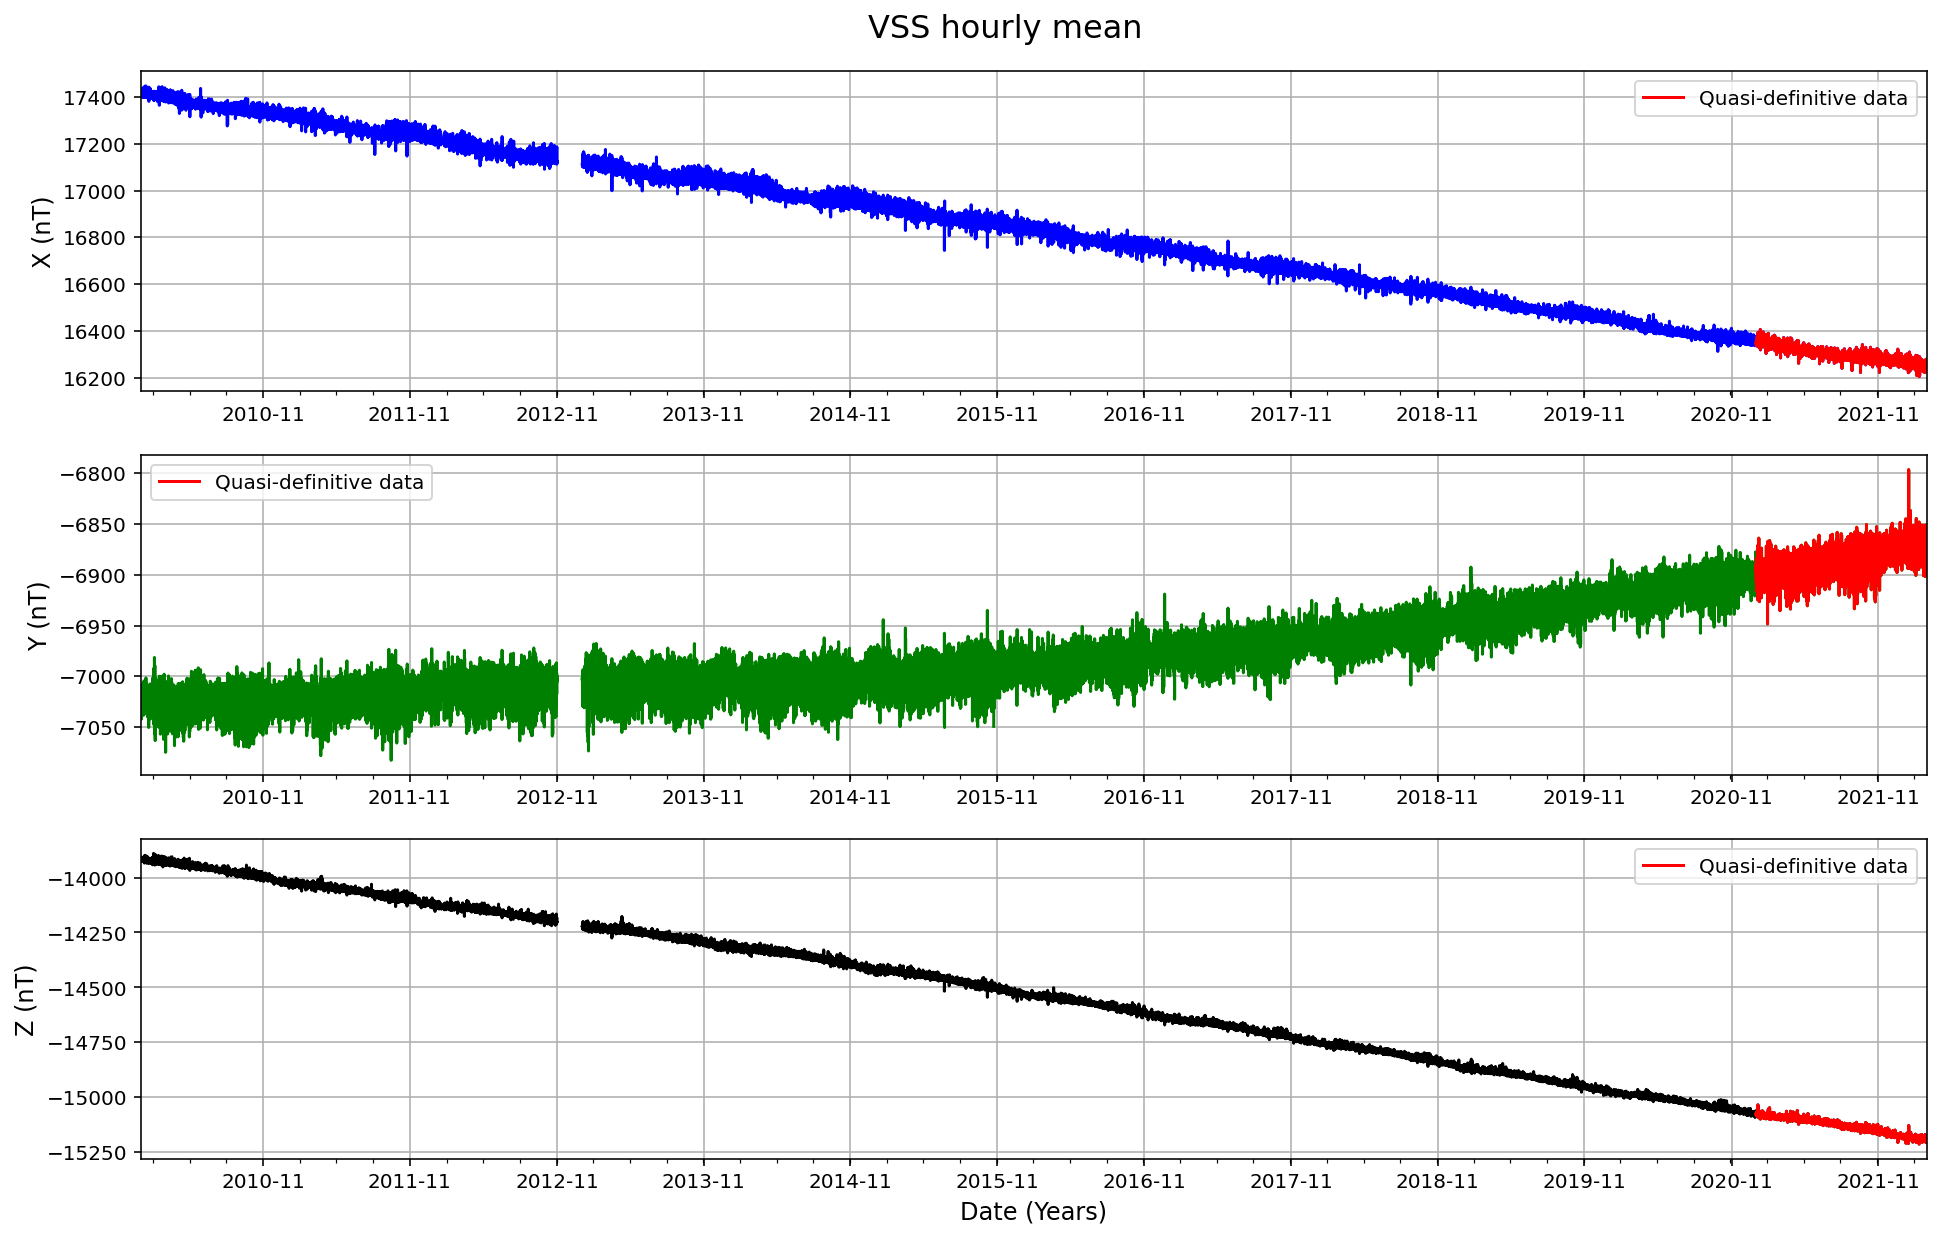

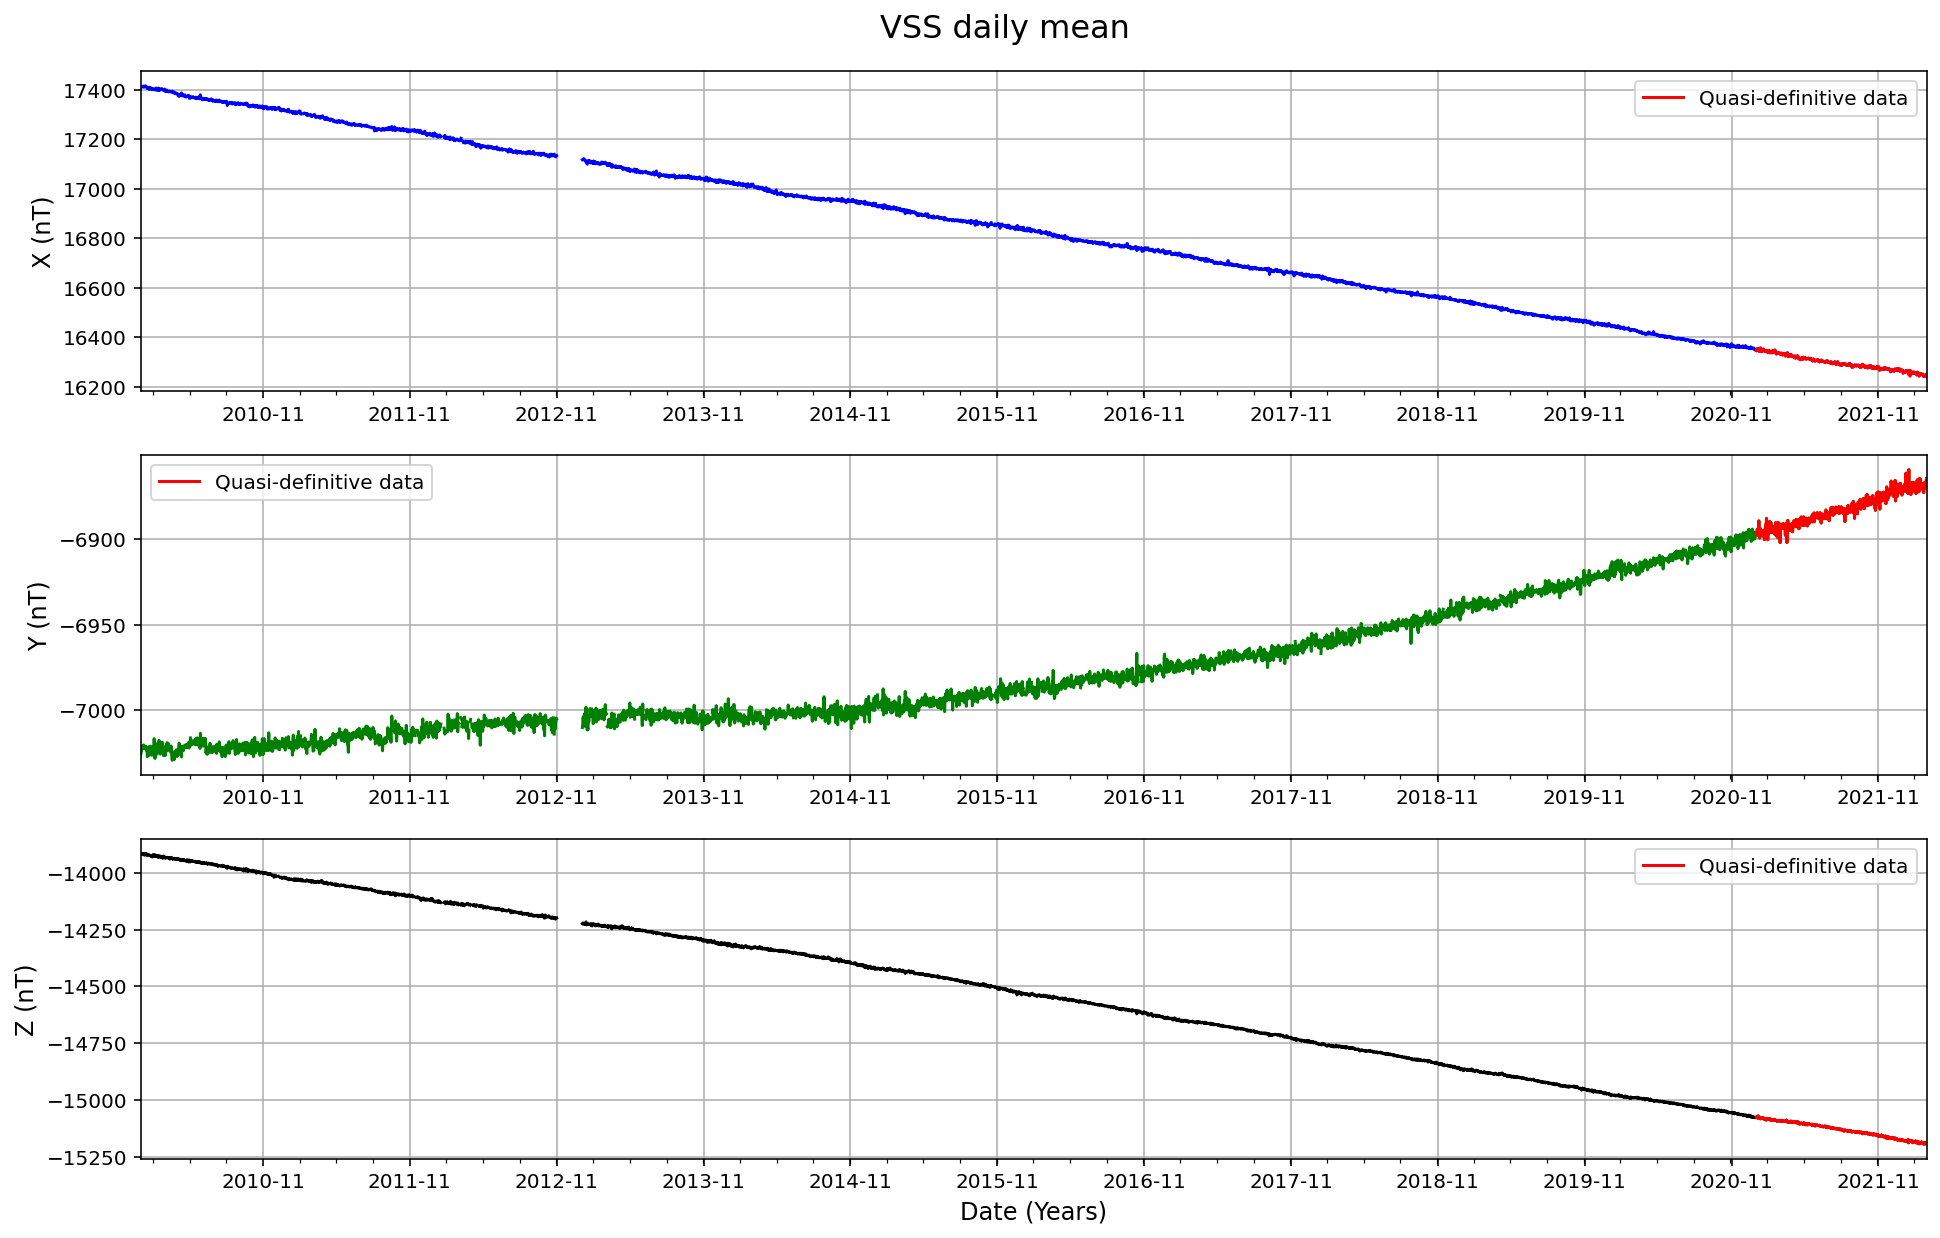

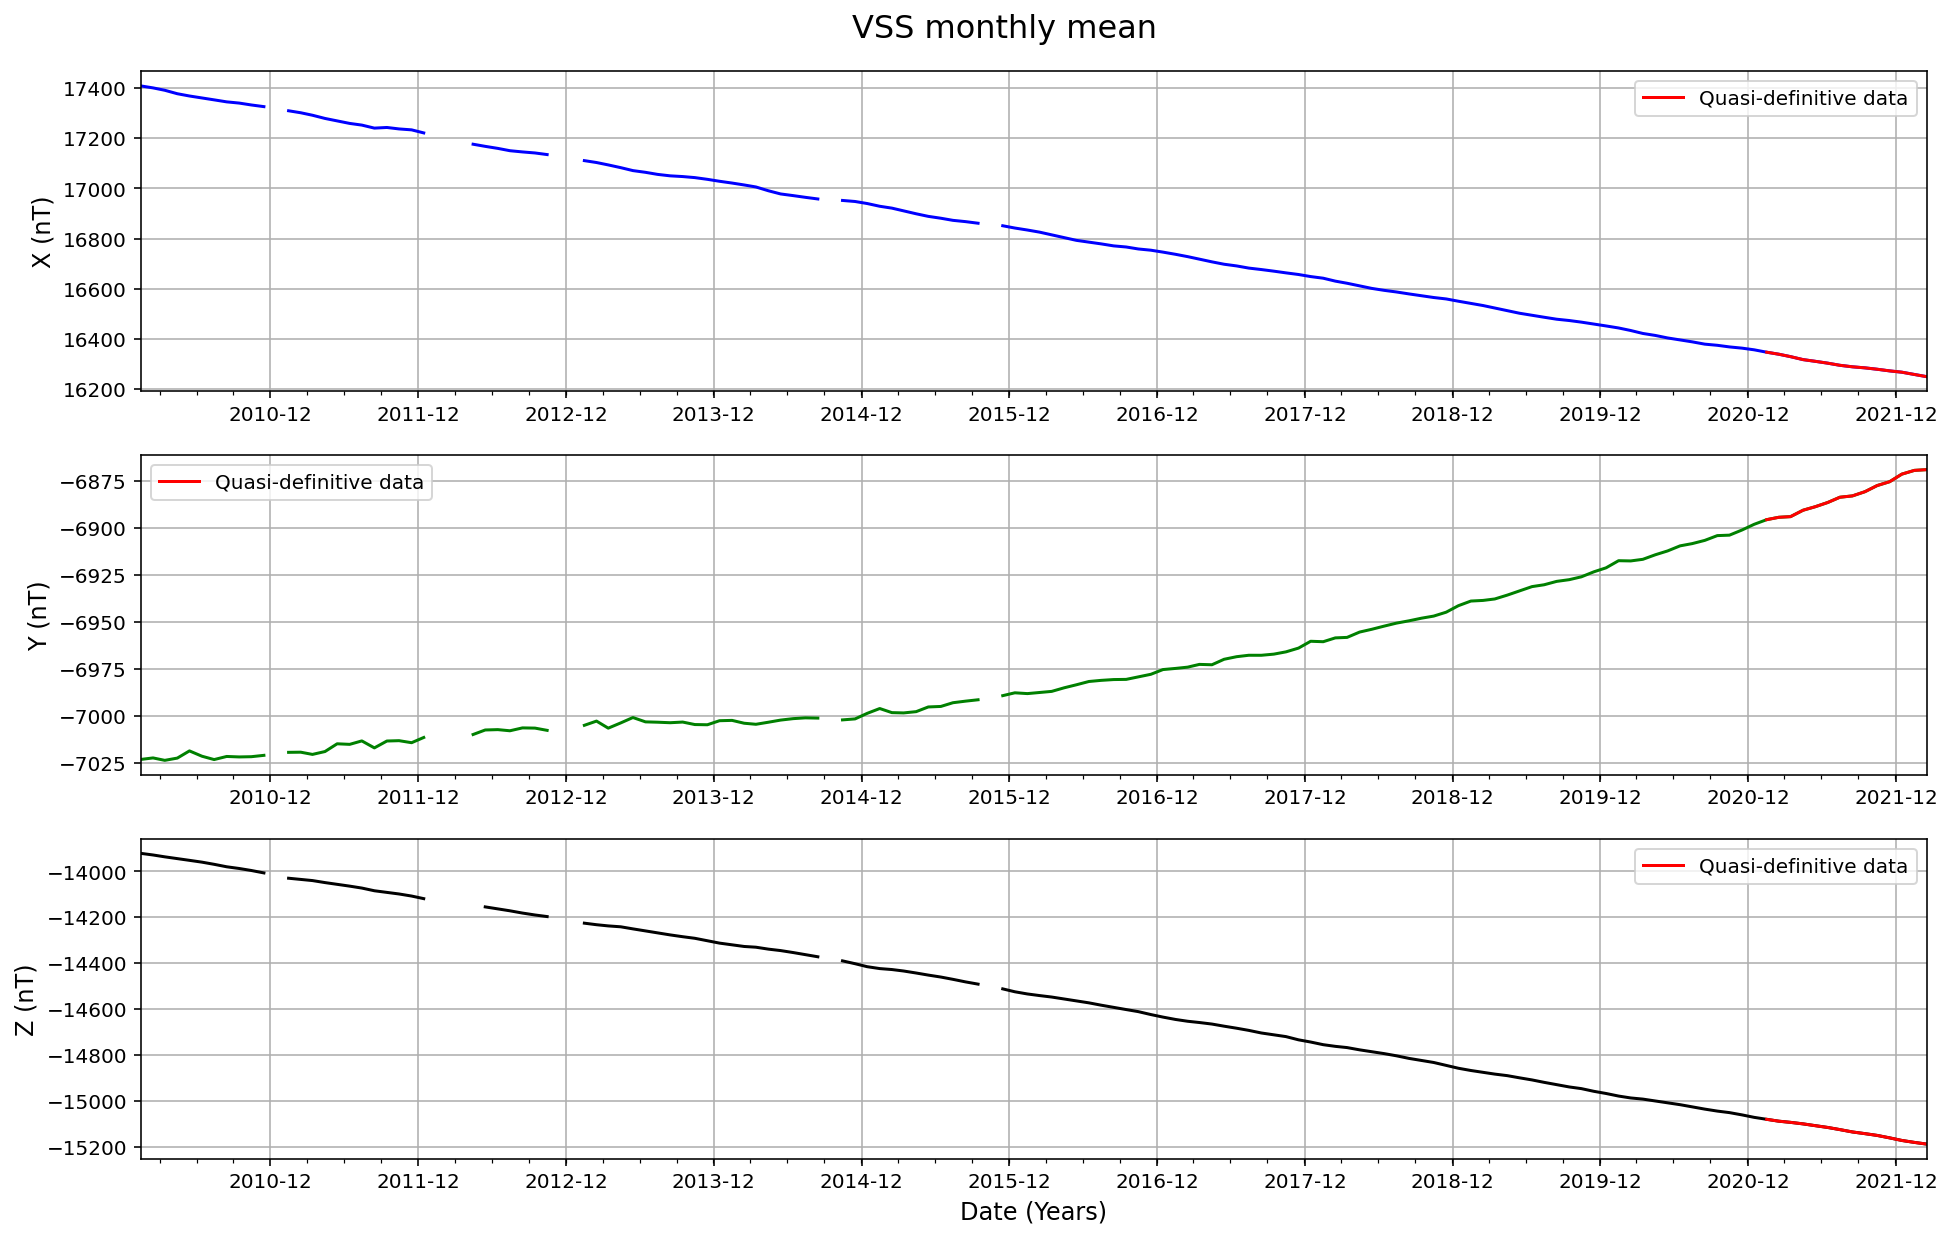

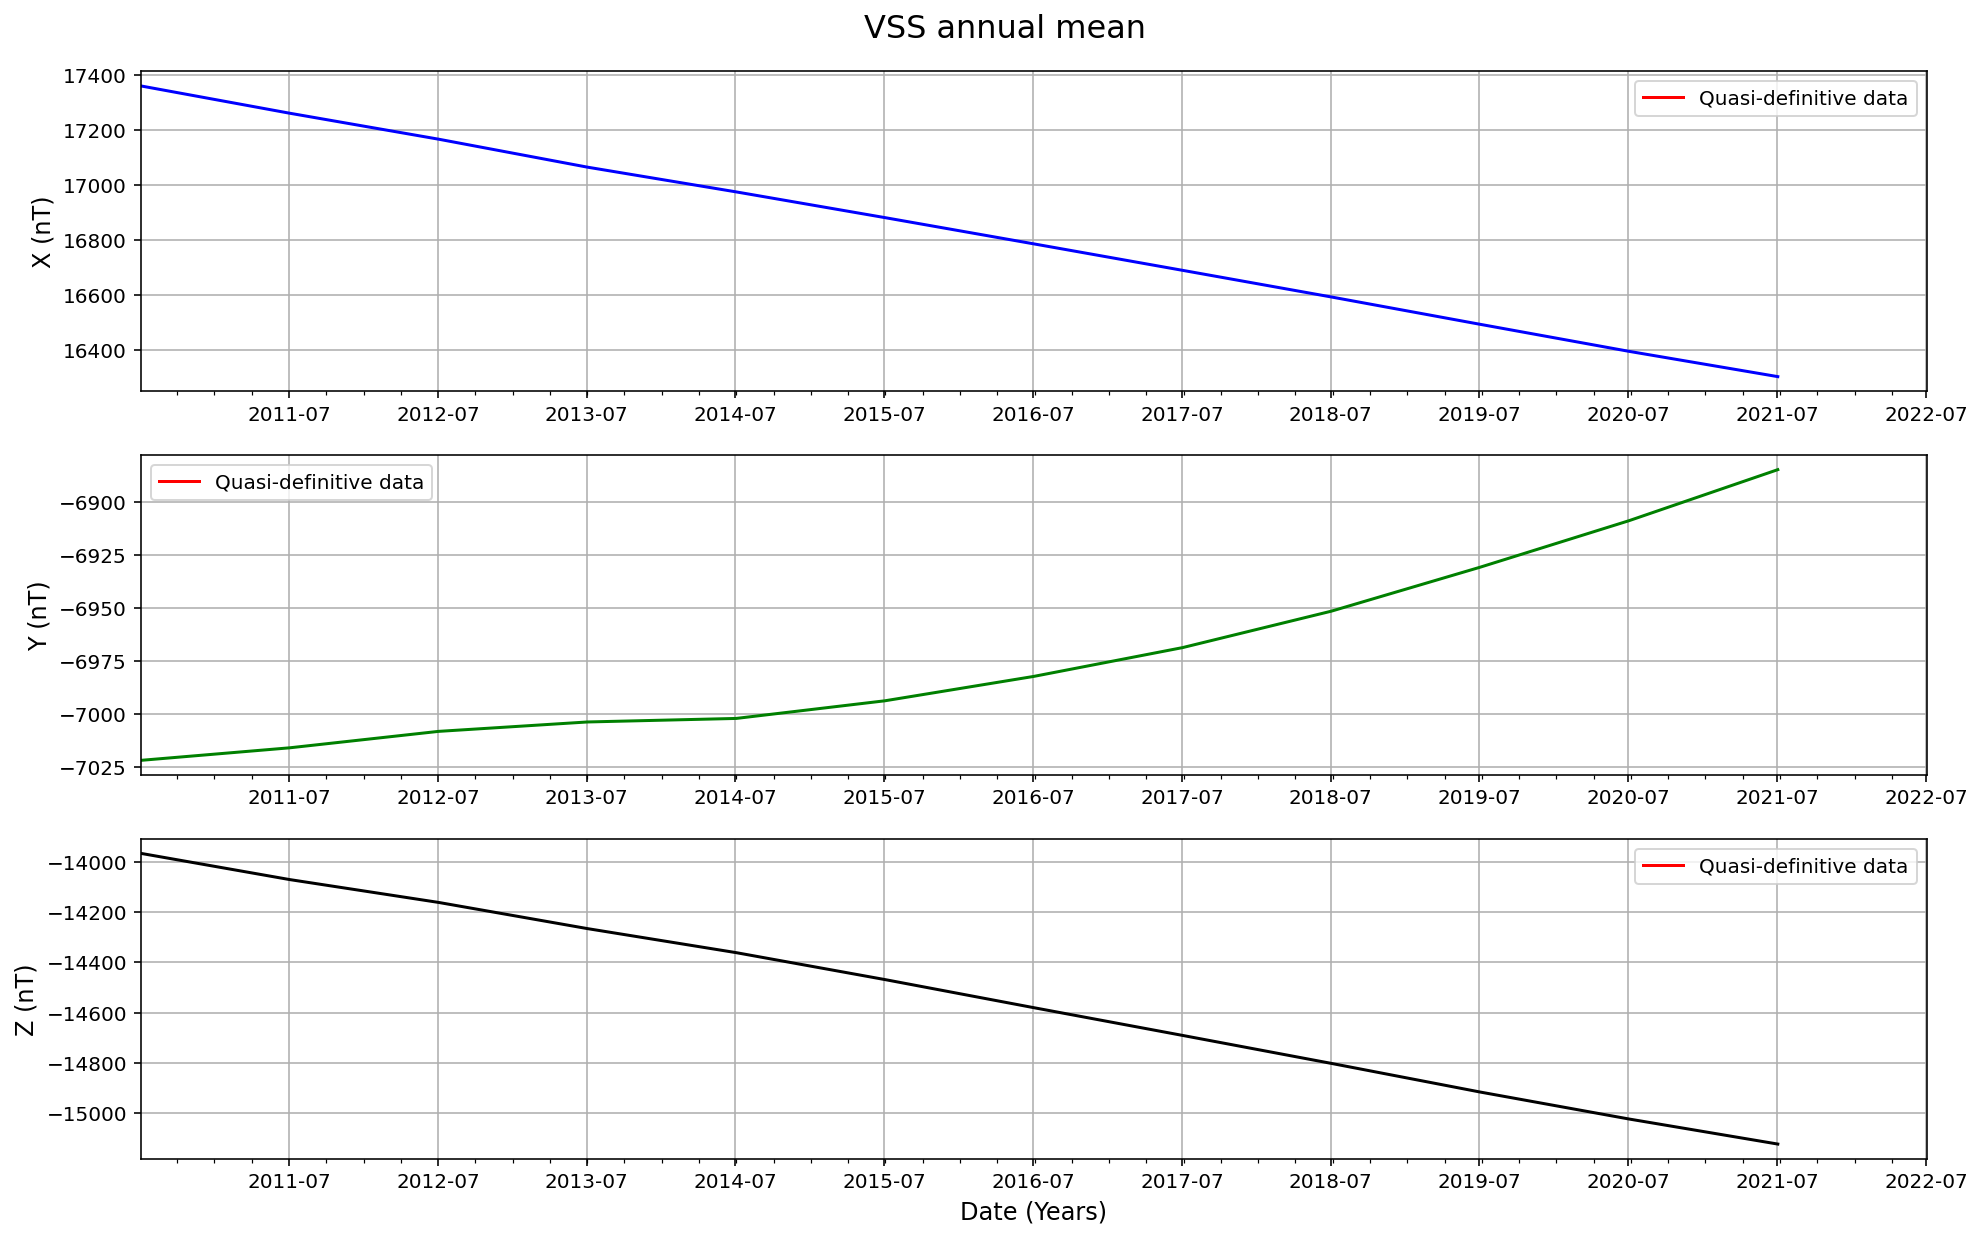

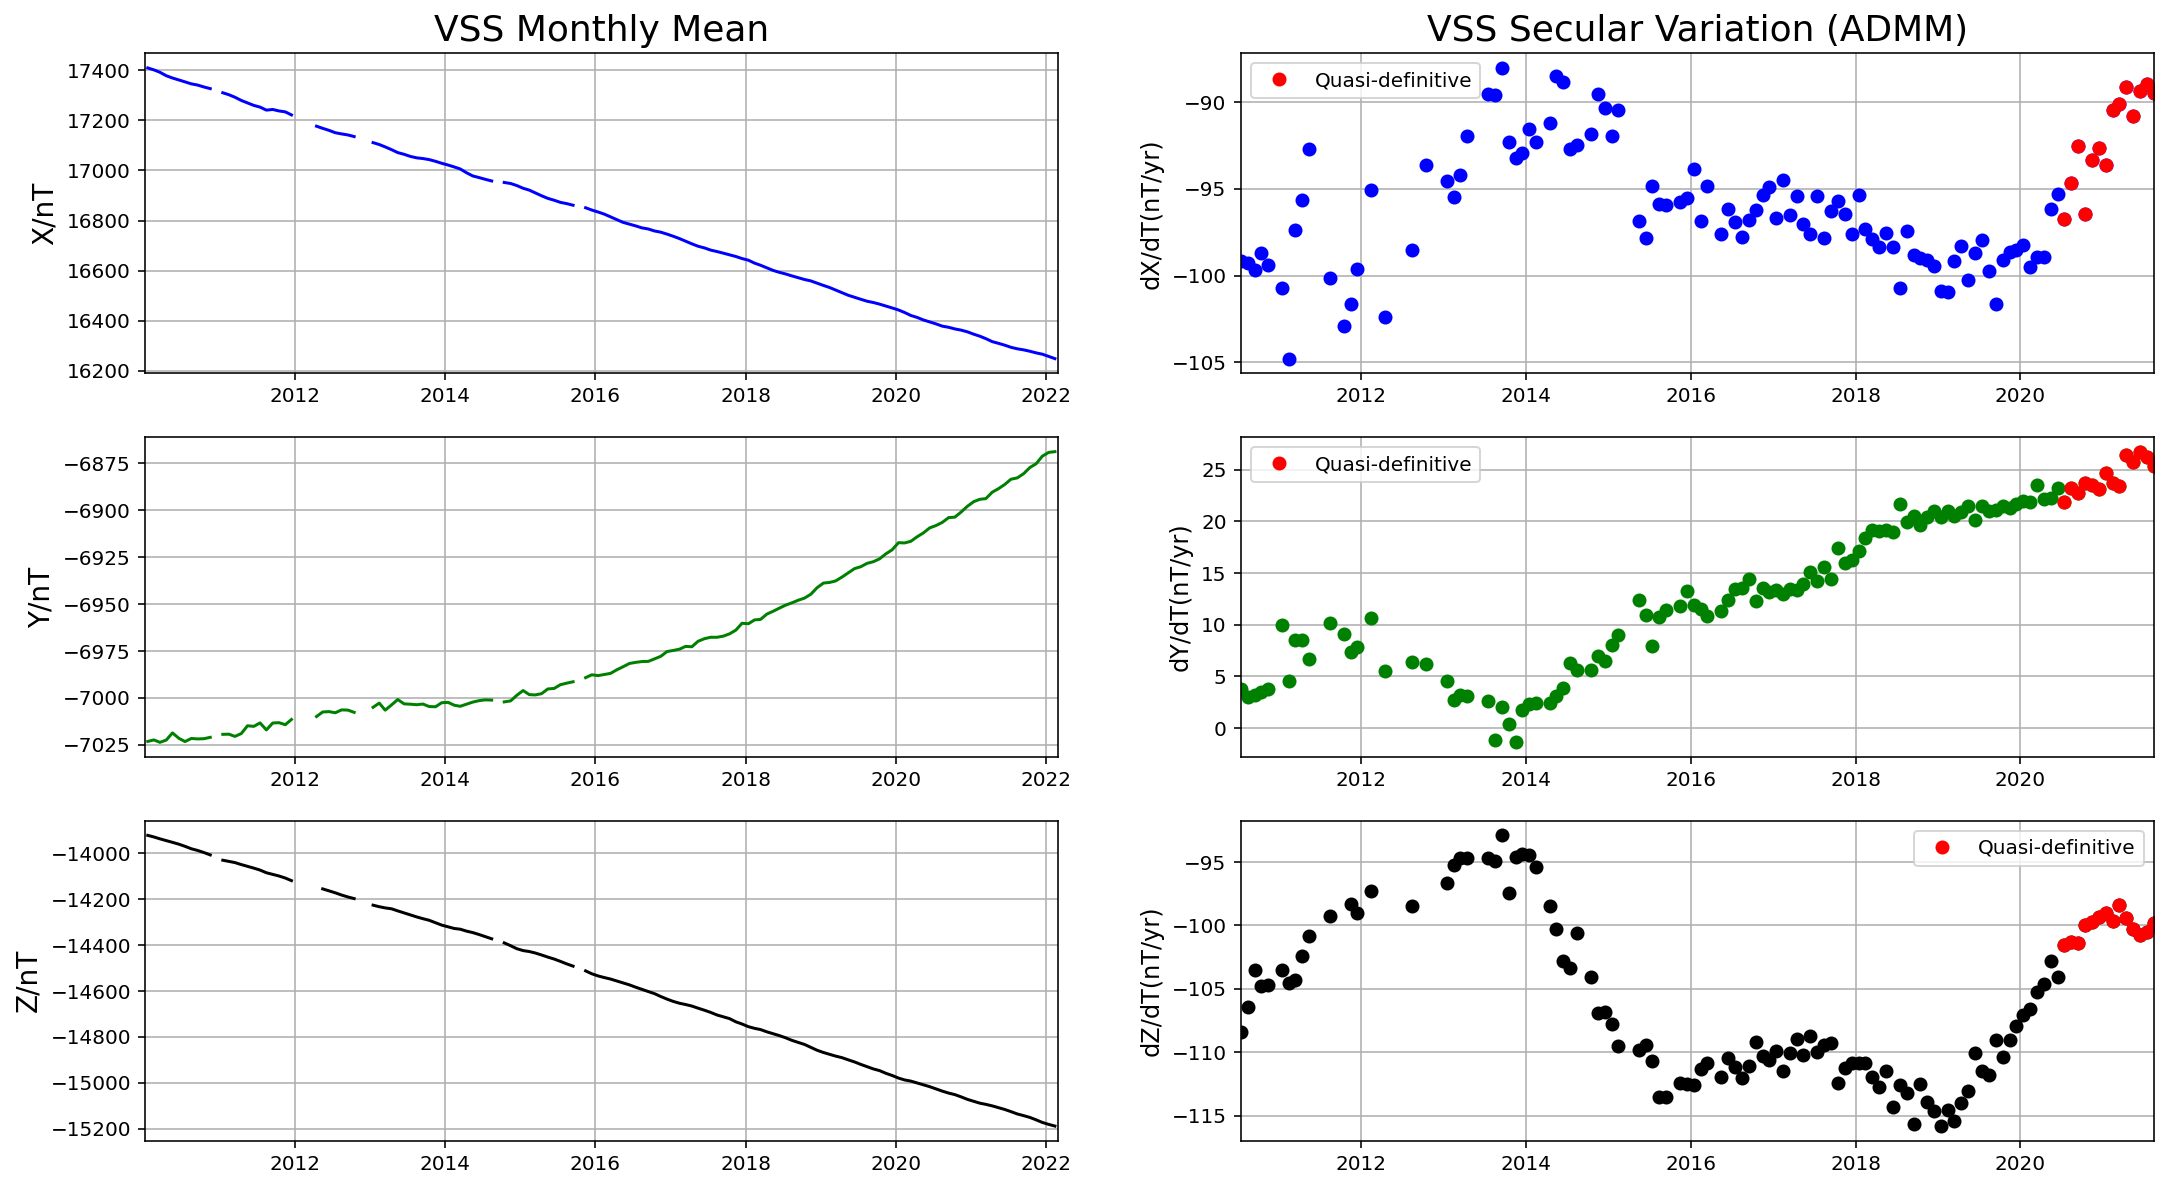

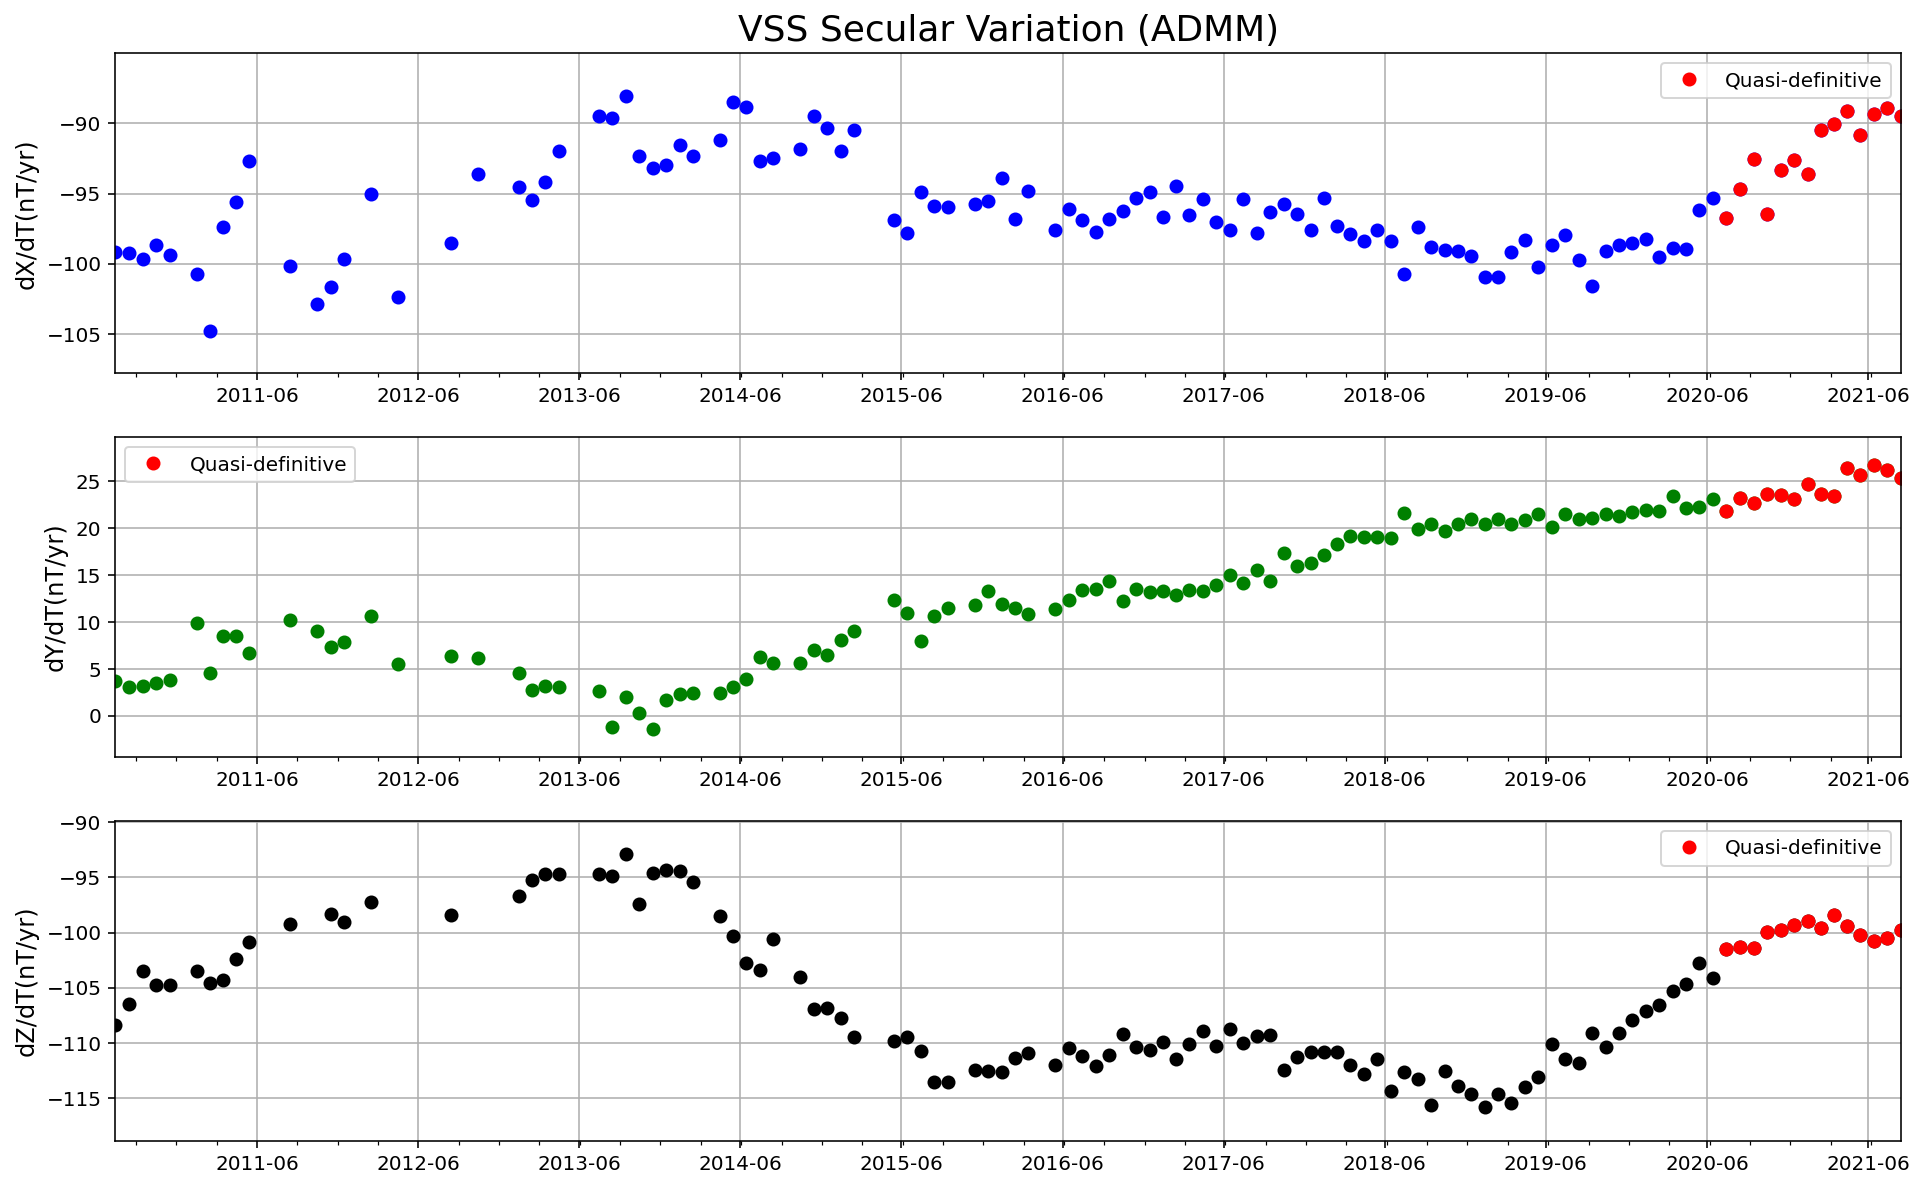

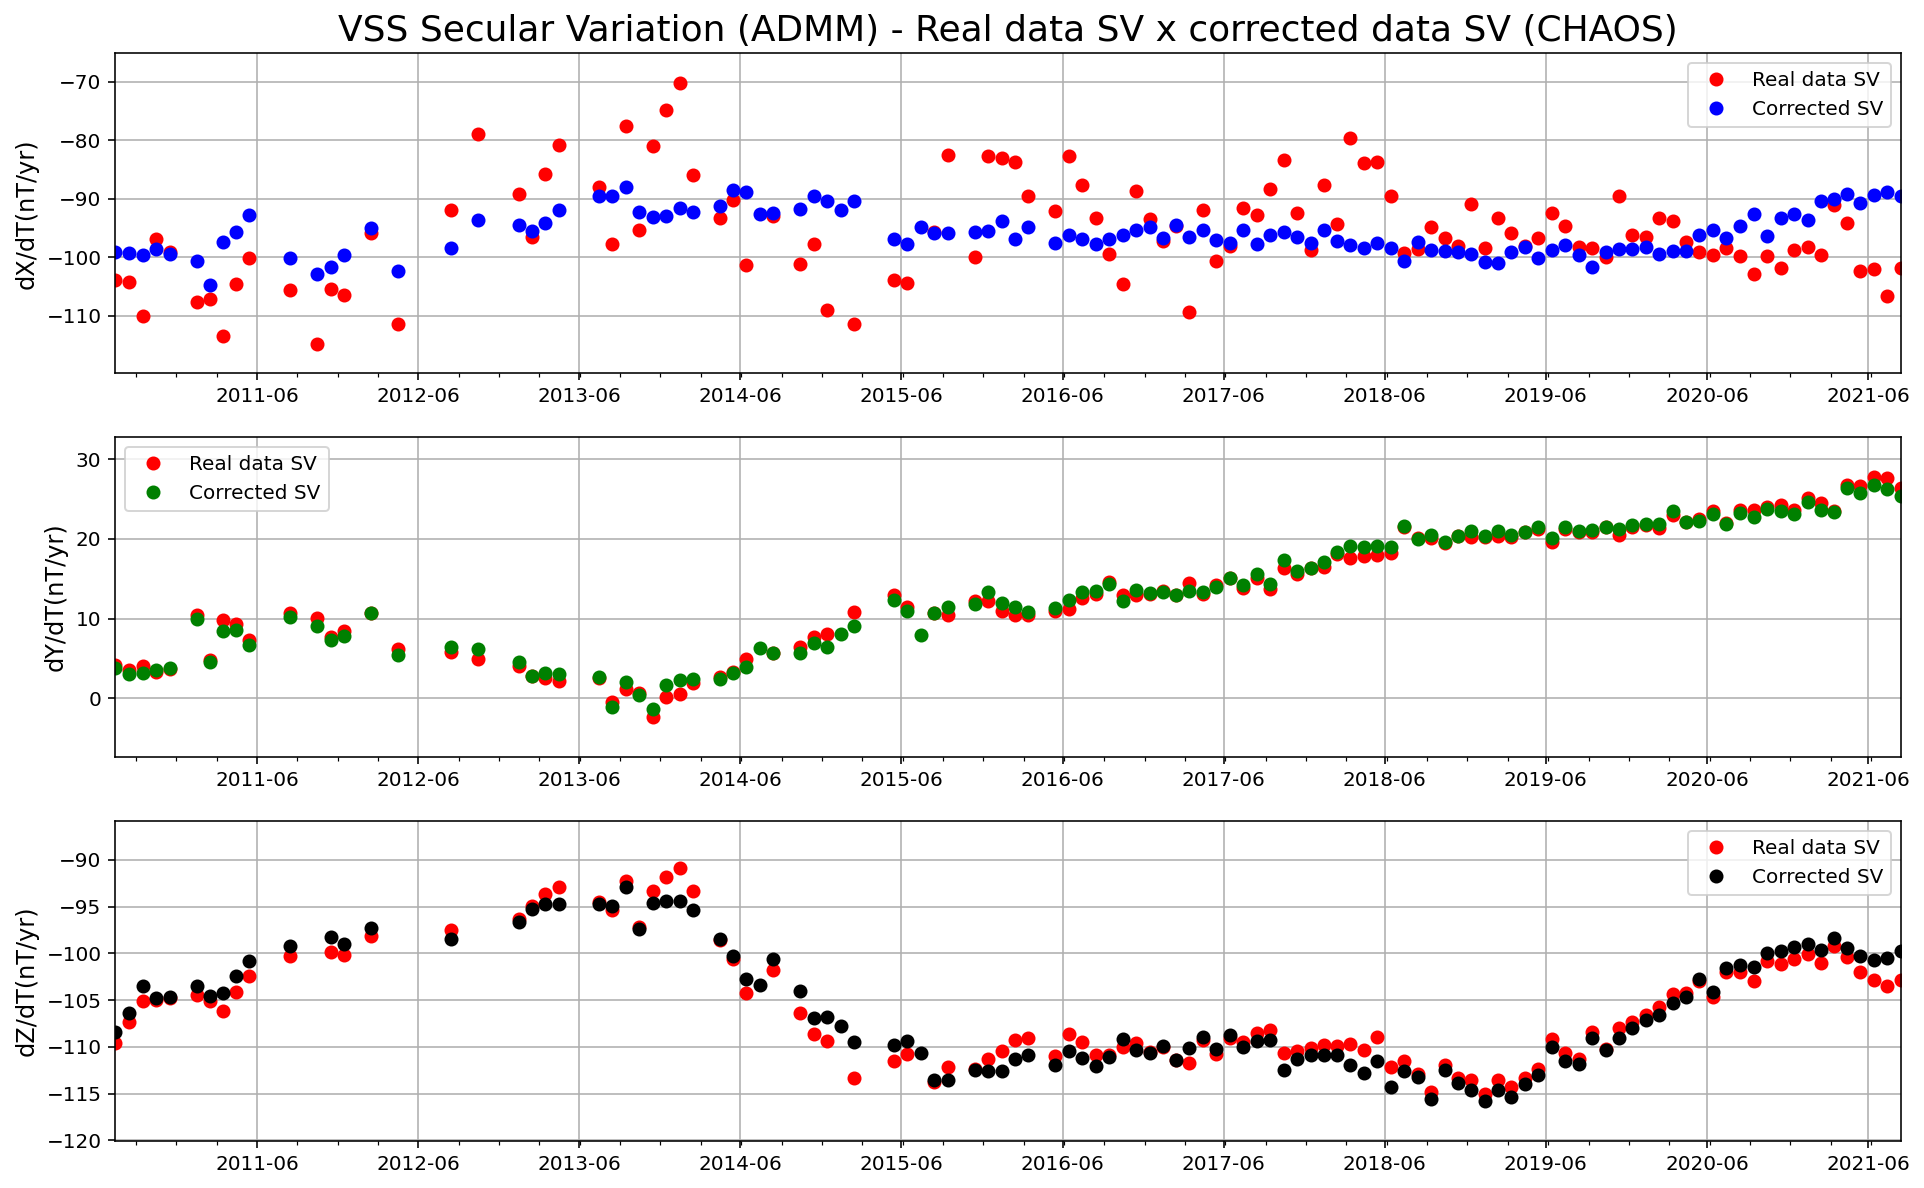

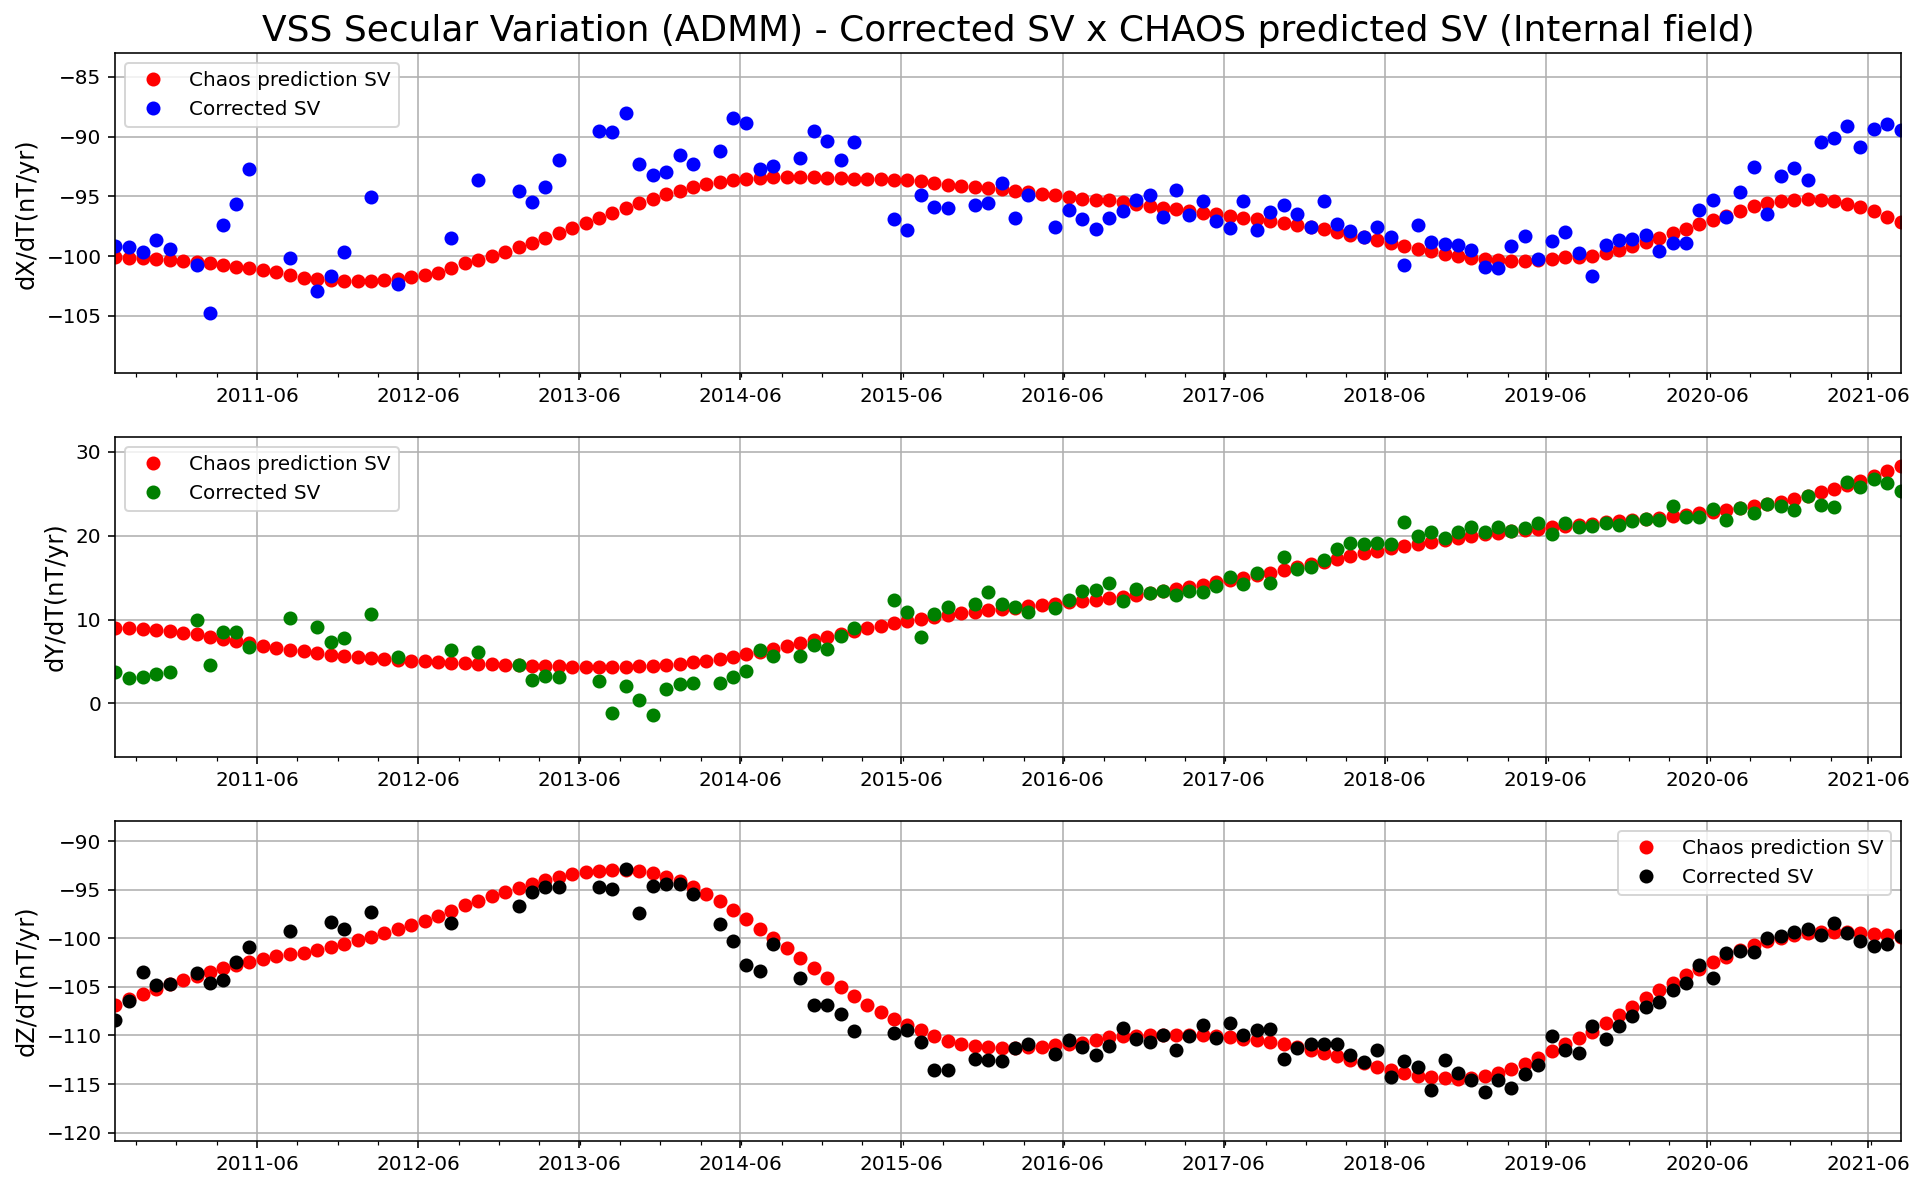

Do you want to detect a geomagnetic jerk? [y/n]: y
type the  start date for the jerk window [yyyy-mm]: 2010-01
type the end date for the jerk window [yyyy-mm]: 2015-06
The external field predicted using CHAOS-model was removed from the data.

VSS Jerk statistics for the X component.

Jerk occurence time -t0-: 2014.97
Jerk amplitute: -19.97
R^2: 0.62

****************************************************************

VSS Jerk statistics for the Y component.

Jerk occurence time -t0-: 2014.2
Jerk amplitute: 9.61
R^2: 0.53

****************************************************************

VSS Jerk statistics for the Z component.

Jerk occurence time -t0-: 2013.71
Jerk amplitute: -14.72
R^2: 0.9

****************************************************************


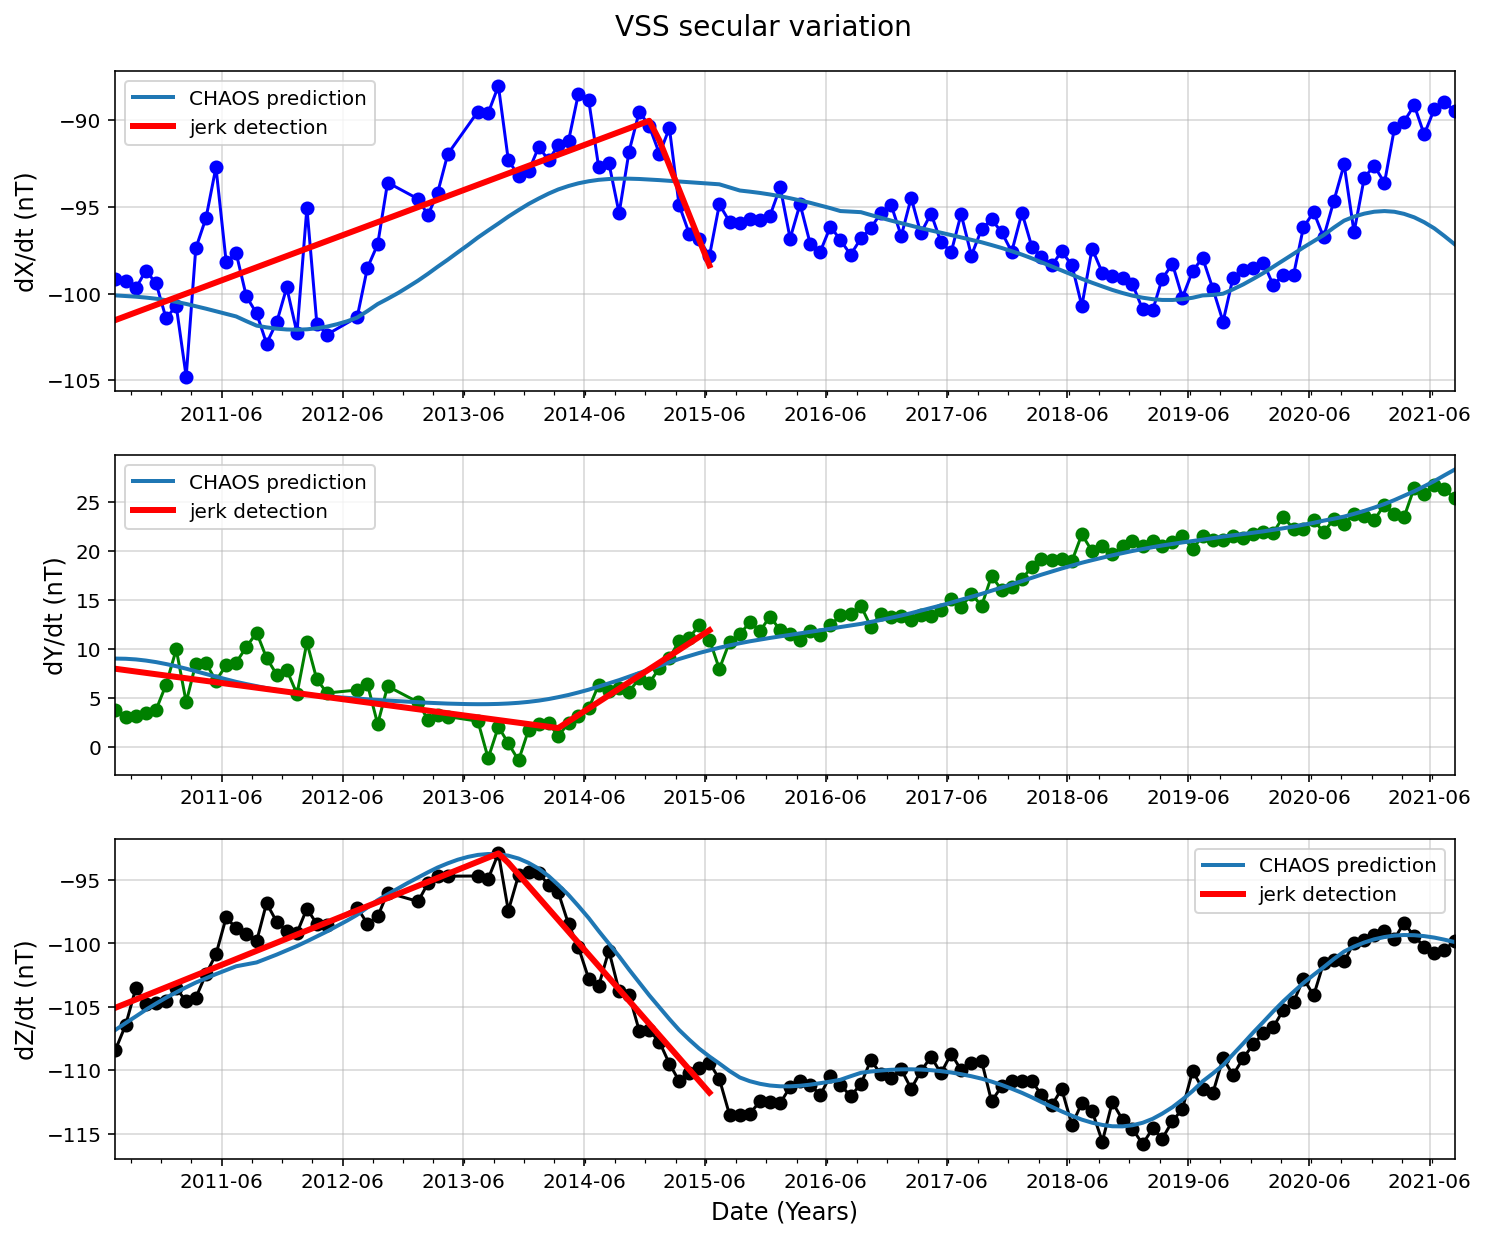

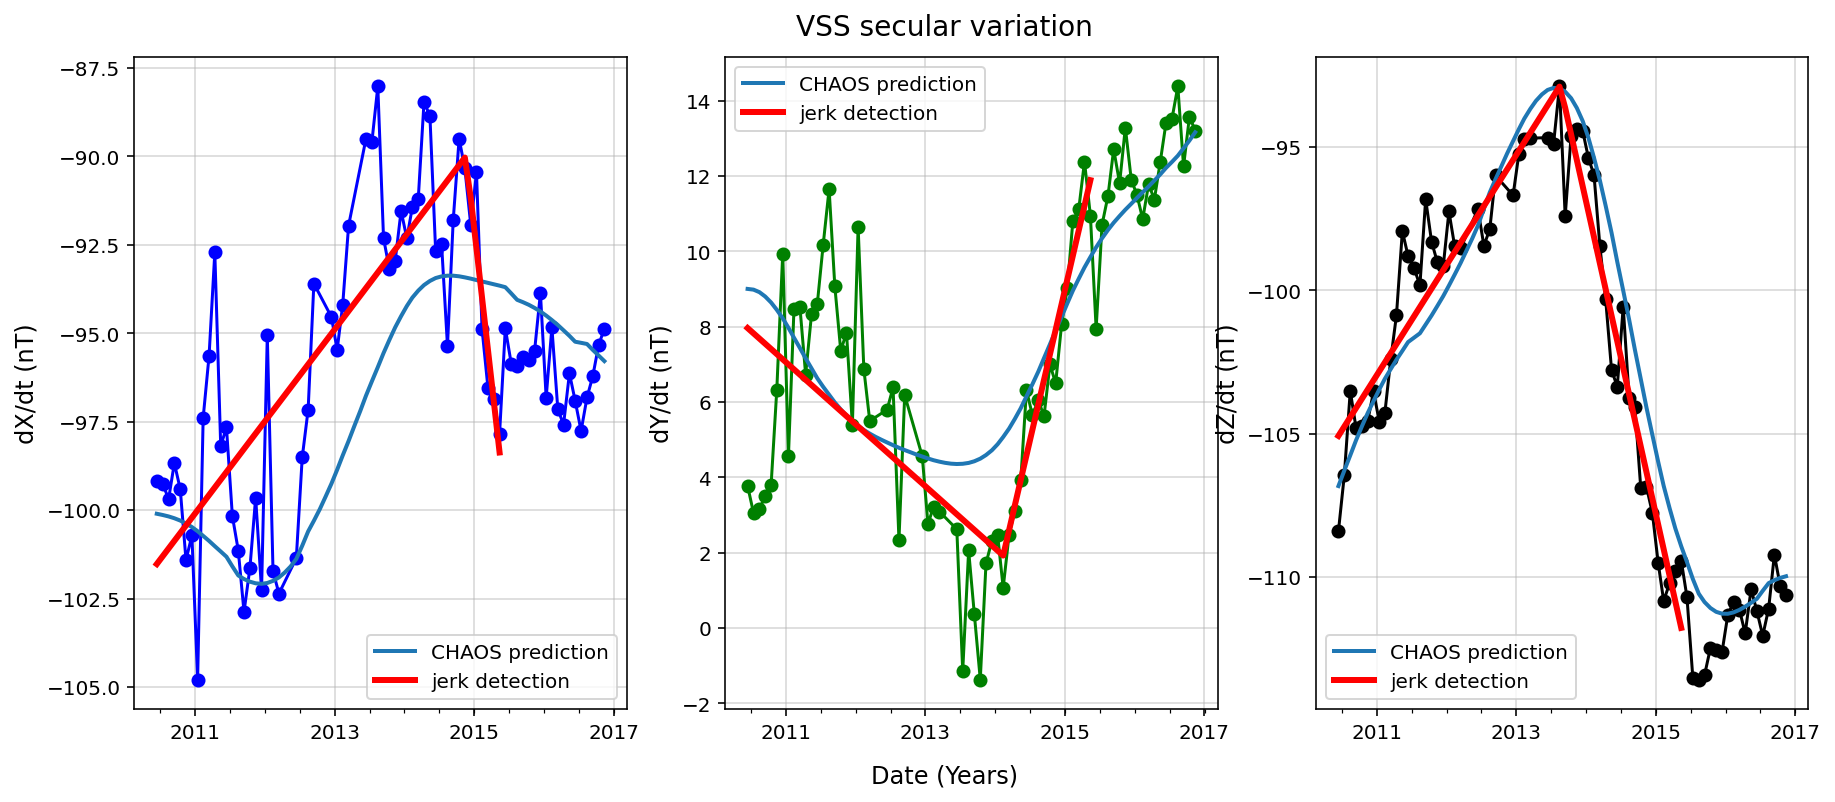

In [2]:
df_obs = mvs.SV_obs(station = 'vss',
           starttime = '2010-01-01',
           endtime = '2022-02-28',
           plot_chaos = True)


In [4]:
utt.IMO.check_existence('VSS')

True

In [ ]:
dpt.chaos_model_prediction(station = 'ABG', starttime = '2010-01-01', endtime = '2020-12-31')

In [ ]:
df_obs = mvs.load_INTERMAGNET_files('VSS','2010-01-01','2015-12-31')

In [ ]:
mvs.plot_samples(station = 'VSS', dataframe = df_obs.resample('H').mean(), save_plots = False,apply_percentage=True)

In [ ]:
dpt.resample_obs_data(df_obs,'Y',apply_percentage=True)

In [ ]:
def resample_obs_data(dataframe, sample):
    
    df_station = pd.DataFrame()
    df_station = dataframe
    
    samples = ['min','H','D','M','Y']
    
    
    if sample not in samples:
        print('sample must be H, D, M or Y!')
    else:
        
        if sample == 'min':
            
            df_station = df_station
            
        if sample == 'H':
            
            df_station = df_station.resample('H').mean()
            df_station.index = df_station.index + to_offset('30min')
            
        if sample == 'D':
            
            df_station = df_station.resample('D').mean()
            df_station.index = df_station.index + to_offset('12H')
            
        if sample == 'M':
            
            df_station = df_station.resample('M').mean()
            df_station.index = df_station.index + to_offset('-1M') + to_offset('15D')
            
            
        if sample == 'Y':
            
            df_station = df_station.resample('Y').mean()
            df_station.index = df_station.index + to_offset('-6M') + to_offset('-15D')
            
    return df_station

In [ ]:

#fig, axes = plt.subplots(3,1,figsize = (10,8))
#plt.suptitle(station.upper() +' secular variation', fontsize = 14, y = 0.92)
#plt.xlabel('Date (Years)', fontsize = 12)


    

In [ ]:
df_station = resample_obs_data(dataframe = df_obs, sample = sample)

In [ ]:
samples = ['Min','H','D','M','Y']
colors = ['blue','green','black']
for sample, title in zip(samples, ['minute','hourly','daily','monthly','annual']):
    
    df_station = resample_obs_data(dataframe = df_obs, sample = sample)
    fig, axes = plt.subplots(3,1,figsize = (10,8))
    plt.suptitle('VSS ' + title + ' mean', fontsize = 14, y = 0.92)
    plt.xlabel('Date(Years)', fontsize = 12)

                  
    for col, ax, color in zip(df_station.columns, axes.flatten(), colors):
    
        ax.plot(df_station[col],color = color)
        ax.set_ylabel(col.upper() +' (nT)', fontsize = 12)
        ax.set_xlim(df_station.index[0],df_station.index[-1])
        ax.grid()


In [ ]:
df = mvs.load_INTERMAGNET_files('VSS','2010-01-01','2010-12-31')

In [ ]:
df.index[0].date()

In [ ]:
        colors = ['blue','green','black']
        fig, axes = plt.subplots(3,1,figsize = (10,8))
        plt.suptitle(station.upper() +' secular variation', fontsize = 14, y = 0.92)
        plt.xlabel('Date (Years)', fontsize = 12)
        
        for col, ax, color in zip(df_SV.columns, axes.flatten(), colors):
            ax.plot(df_SV[col],'o-',color = color)
            ax.plot(df_SV[col].loc[window_start:window_end].index,
                    jerk_prediction[col],color = 'red', linewidth = 3, label = '3rd order polynomial')
            ax.set_ylabel('d' + col.upper() +'/dt (nT)', fontsize = 12)
            ax.legend()

In [ ]:
i = str(date)[0:10]
j = str(end)[0:10]
j

In [ ]:
df_obs.sort_index().loc[i:j]

In [ ]:
datetime.strptime(str(date),"%y%m%d")

In [ ]:
df_obs.loc['2011':'2012'].resample('H').mean().plot(subplots = True, figsize = (16,10))

In [ ]:
df_VSS.resample('H').mean().loc['2020-10']

In [ ]:
x = mvs.calculate_SV(df_VSS,starttime = '2005-01-01',endtime = '2021-06-30')

In [ ]:
df_VSS.diff().max()

In [ ]:
df_VSS['2015'].plot(subplots = True, figsize = (16,10))

In [ ]:
df_FRD_SV = mvs.calculate_SV(df_FRD,'2015-02','2021-09')

In [ ]:
df_VSS = mvs.SV_obs(station = 'VSS', starttime = '2010-01-01',endtime = '2021-05-30')

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (16,10))
ax[0].plot(df_E['2021-01-01':'2021-01-03']['X'].shift(-2.90, freq = 'H'))
ax[0].plot(df_E['2021-01-01':'2021-01-03']['X'])

ax[1].plot(df_E['2021-01-01':'2021-01-03']['Y'].shift(-2.90, freq = 'H'))
ax[1].plot(df_E['2021-01-01':'2021-01-03']['Y'])

ax[2].plot(df_E['2021-01-01':'2021-01-03']['Z'].shift(-2.90, freq = 'H'))
ax[2].plot(df_E['2021-01-01':'2021-01-03']['Z'])

In [ ]:
df_E = mvs.SV_obs(station = 'vss',skiprows = 26, starttime = '2010-01',endtime = '2021-09')

In [ ]:
for i in range(len(df_Q['Y'])):
    gaps = []
    if df_Q['Y'][i] < 10*(df_Q['Y'][i + 1]):
        gaps = df_Q['Y'][i] < 10*(df_Q['Y'][i + 1])

In [ ]:
for i in range(len(df_D['Y'])):
    gaps = []
    x = df_D['Y'].diff()
print(x.max(), x.min())
print(df_D.loc[(df_D['Y'].diff() == x.max())])
print(df_D.loc[(df_D['Y'].diff() == x.min())])
fig, ax = plt.subplots(2,1)
ax[0].plot(df_D['Y']['2019':])
ax[1].plot(df_C['Y']['2019':])

In [ ]:
df_C['Y']['2020-01':] = df_D['Y'].loc[df_D['Y']['2020-01':].index] - 414.85

In [ ]:
df_D['2019':'2020']

In [ ]:
df_YM = pd.read_csv('Yearly means VSS INTERMAGNET',header = None, skiprows = 1, sep = '\s+', usecols = [0,6,7,8], 
                    names = ['Year','X','Y','Z'])

In [ ]:
df_YM_NGK = pd.read_csv('Yearly means NGK WDC',header = None, skiprows = 1, sep = '\s+', usecols = [0,6,7,8], 
                    names = ['Year','X','Y','Z'])

In [ ]:
df_YM_NGK

In [ ]:
plt.plot(df_YM['Year'],df_YM['X'], 'o-')
plt.plot(df_YM['Year'],df['X'].resample('Y').mean())
plt.show()


In [ ]:
df['X'].resample('Y').mean().diff()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (14,10))

ax[0].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['X'][1:12].diff(), 'o-', label = 'INT YM')
ax[0].plot(df_YM_NGK['Year'][1:12],df_IGRF['X'][0:11].diff(), label = 'IGRF YM')
ax[0].plot(df_YM_NGK['Year'][1:12],df['X'].resample('Y').mean().diff()[0:11], label = 'SV_obs YM')
ax[0].set_ylabel('dX/nT', fontsize = 14)
ax[0].set_title('NGK - Secular Variation from INTERMAGNET, IGRF and calculated by SV_obs', fontsize = 14)
ax[0].legend()
ax[0].grid()


ax[1].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['Y'][1:12].diff(), 'o-', label = 'INT YM')
ax[1].plot(df_YM_NGK['Year'][1:12],df_IGRF['Y'][0:11].diff(),  label = 'IGRF YM')
ax[1].plot(df_YM_NGK['Year'][1:12],df['Y'].resample('Y').mean().diff()[0:11], color = 'green', label = 'SV_obs YM')
ax[1].set_ylabel('dY/nT', fontsize = 14)
ax[1].legend()
ax[1].grid()

ax[2].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['Z'][1:12].diff(), 'o-', label = 'INT YM')
ax[2].plot(df_YM_NGK['Year'][1:12],df_IGRF['Z'][0:11].diff(),  label = 'IGRF YM')
ax[2].plot(df_YM_NGK['Year'][1:12],df['Z'].resample('Y').mean().diff()[0:11], color = 'green', label = 'SV_obs YM')
ax[2].set_ylabel('dZ/nT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14 )
ax[2].grid()
ax[2].legend()

plt.show()

In [ ]:
df_IGRF = pd.read_csv('Dados OBS\IGRF_SV_VSS.txt', sep = '\s+', 
                      skiprows = 4, 
                      usecols = [0,5,6,7,12,13,14], 
                      names = ['Date','X', 'Y', 'Z', 'SV_X','SV_Y','SV_Z'])
df_IGRF['Date'] = pd.to_datetime(df_IGRF['Date'], format = '%Y')
df_IGRF.set_index('Date', inplace = True)

In [ ]:
df_IGRF = pd.read_csv('Dados OBS\IGRF_SV_NGK.txt', sep = '\s+', 
                      skiprows = 4, 
                      usecols = [0,5,6,7,12,13,14], 
                      names = ['Date','X', 'Y', 'Z', 'SV_X','SV_Y','SV_Z'])
df_IGRF['Date'] = pd.to_datetime(df_IGRF['Date'], format = '%Y')
df_IGRF.set_index('Date', inplace = True)

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (14,10))

ax[0].plot(df_YM_NGK['Year'][1:12],df_IGRF['X'][0:11], label = 'IGRF YM')
ax[0].plot(df_YM_NGK['Year'][1:12],df['X'].resample('Y').mean()[0:11],'o-', label = 'SV_obs YM')
ax[0].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['X'][1:12],color = 'black',label = 'INTERMAGNET YM')
ax[0].set_ylabel('X/nT', fontsize = 14)
ax[0].set_title('NGK - Comparing Yearly means from INTERMAGNET, calculated by SV_obs and IGRF Model', fontsize = 14)
ax[0].legend()
ax[0].grid()


ax[1].plot(df_YM_NGK['Year'][1:12],df_IGRF['Y'][0:11], label = 'IGRF YM')
ax[1].plot(df_YM_NGK['Year'][1:12],df['Y'].resample('Y').mean()[0:11], 'o-', label = 'SV_obs YM')
ax[1].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['Y'][1:12],color = 'black',label = 'INTERMAGNET YM')
ax[1].set_ylabel('Y/nT', fontsize = 14)
ax[1].legend()
ax[1].grid()

ax[2].plot(df_YM_NGK['Year'][1:12],df_IGRF['Z'][0:11], label = 'IGRF YM')
ax[2].plot(df_YM_NGK['Year'][1:12],df['Z'].resample('Y').mean()[0:11],'o-', label = 'SV_obs YM')
ax[2].plot(df_YM_NGK['Year'][1:12],df_YM_NGK['Z'][1:12],color = 'black',label = 'INTERMAGNET YM')
ax[2].set_ylabel('Z/nT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14 )
ax[2].grid()
ax[2].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (14,10))

ax[0].plot(df_YM['Year'],df_IGRF['X'].diff()[0:11], 'o-', label = 'INT YM')
ax[0].plot(df_YM['Year'],df['X'].resample('Y').mean().diff(), label = 'SV_obs YM')
ax[0].set_ylabel('X/nT', fontsize = 14)
ax[0].set_title('VSS - Comparing Yearly means from INTERMAGNET and calculated by SV_obs', fontsize = 14)
ax[0].legend()
ax[0].grid()


ax[1].plot(df_YM['Year'],df_IGRF['Y'].diff()[0:11], 'o-', label = 'INT YM')
ax[1].plot(df_YM['Year'],df['Y'].resample('Y').mean().diff(), color = 'red', label = 'SV_obs YM')
ax[1].set_ylabel('Y/nT', fontsize = 14)
ax[1].legend()
ax[1].grid()

ax[2].plot(df_YM['Year'],df_IGRF['Z'].diff()[0:11], 'o-', label = 'INT YM')
ax[2].plot(df_YM['Year'],df['Z'].resample('Y').mean().diff(), color = 'green', label = 'SV_obs YM')
ax[2].set_ylabel('Z/nT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14 )
ax[2].grid()
ax[2].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))


#ax[0].plot((y['X'].resample('M').mean().diff(6) - y['X'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[0].plot((df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6) + 5),'o-', color  = 'red')
#ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6) - 10),'o-', color = 'green')

ax[0].plot((df['X'].resample('M').mean().diff(6) - df['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'All days')
ax[0].plot((df_DD['X'].resample('M').mean().diff(6) - df_DD['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'Disturbed Days removed')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].set_title('No Disturbed days X All Days - SV comparison - NGK', fontsize = 16)
ax[0].grid()


ax[1].plot((df['Y'].resample('M').mean().diff(6) - df['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'All days')
#ax[1].plot((y['Y'].resample('M').mean().diff(6) - y['Y'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[1].plot((df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[1].plot((df_DD['Y'].resample('M').mean().diff(6) - df_DD['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Disturbed Days removed')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


ax[2].plot((df['Z'].resample('M').mean().diff(6) - df['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'All days')
#ax[2].plot((df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[2].plot((df_DD['Z'].resample('M').mean().diff(6) - df_DD['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Disturbed Days removed')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))


#ax[0].plot((y['X'].resample('M').mean().diff(6) - y['X'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[0].plot((df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6) + 5),'o-', color  = 'red')
#ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6) - 10),'o-', color = 'green')

ax[0].plot((df['X'].resample('M').mean().diff(6) - df['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'All days')
ax[0].plot((df_QD['X'].resample('M').mean().diff(6) - df_QD['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'Quiet Days')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].set_title('Quiet days X All Days - SV comparison - NGK', fontsize = 16)
ax[0].grid()


ax[1].plot((df['Y'].resample('M').mean().diff(6) - df['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'All days')
#ax[1].plot((y['Y'].resample('M').mean().diff(6) - y['Y'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[1].plot((df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[1].plot((df_QD['Y'].resample('M').mean().diff(6) - df_QD['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Quiet Days')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


ax[2].plot((df['Z'].resample('M').mean().diff(6) - df['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'All days')
#ax[2].plot((df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[2].plot((df_QD['Z'].resample('M').mean().diff(6) - df_QD['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Quiet Days')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))


#ax[0].plot((y['X'].resample('M').mean().diff(6) - y['X'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[0].plot((df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6) + 5),'o-', color  = 'red')
#ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6) - 10),'o-', color = 'green')

ax[0].plot((df['X'].resample('M').mean().diff(6) - df['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'All days')
ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'NightTime')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].set_title('Nighttime X All Days - SV comparison - VSS', fontsize = 16)
ax[0].grid()


ax[1].plot((df['Y'].resample('M').mean().diff(6) - df['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'All days')
#ax[1].plot((y['Y'].resample('M').mean().diff(6) - y['Y'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[1].plot((df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'NightTime')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


ax[2].plot((df['Z'].resample('M').mean().diff(6) - df['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'All days')
#ax[2].plot((df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'NightTime')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))


#ax[0].plot((y['X'].resample('M').mean().diff(6) - y['X'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[0].plot((df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6) + 5),'o-', color  = 'red')
#ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6) - 10),'o-', color = 'green')

ax[0].plot((df['X'].resample('M').mean().diff(6) - df['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'All days')
ax[0].plot((df_T['X'].resample('M').mean().diff(6) - df_T['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'Denoised')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].set_title('Desoined data X No action - SV comparison - MAW', fontsize = 16)
ax[0].grid()


ax[1].plot((df['Y'].resample('M').mean().diff(6) - df['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'All days')
#ax[1].plot((y['Y'].resample('M').mean().diff(6) - y['Y'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'teste')
#ax[1].plot((df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[1].plot((df_T['Y'].resample('M').mean().diff(6) - df_T['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Denoised')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


ax[2].plot((df['Z'].resample('M').mean().diff(6) - df['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'All days')
#ax[2].plot((df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red')
#ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[2].plot((df_T['Z'].resample('M').mean().diff(6) - df_T['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'Denoised')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))


ax[0].plot((df_T['X'].resample('M').mean().diff(6) - df_T['X'].resample('M').mean().diff(-6)),'o-', color  = 'red', label = 'NT selected')
ax[0].plot((df['X'].resample('M').mean().diff(6) - df['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'All days')
#ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6) - 10),'o-', color = 'green')
ax[0].set_title('Disturbed Days X All days - VSS', fontsize = 16)
#ax[0].plot((df_Q['X'].resample('M').mean().diff(6) - df_Q['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'Q-days days')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].grid()


#ax[1].plot((df_Q['Y'].resample('M').mean().diff(6) - df_Q['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'Q-days')
ax[1].plot((df_T['Y'].resample('M').mean().diff(6) - df_T['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red',label = 'NT selected')
#ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[1].plot((df['Y'].resample('M').mean().diff(6) - df['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'All days')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


#ax[2].plot((df_Q['Z'].resample('M').mean().diff(6) - df_Q['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'Q-days')
ax[2].plot((df_T['Z'].resample('M').mean().diff(6) - df_T['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red',label = 'NT selected')
#ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green')
ax[2].plot((df['Z'].resample('M').mean().diff(6) - df['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'All days')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,10))

ax[0].plot((df_E['X'].resample('M').mean().diff(6) - df_E['X'].resample('M').mean().diff(-6)),'o-', color = 'black', label = 'All days')
#ax[0].plot((df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6)),'o-', color  = 'red', label = 'Remov D-days')
ax[0].plot((df_NT['X'].resample('M').mean().diff(6) - df_NT['X'].resample('M').mean().diff(-6)),'o-', color = 'green', label = 'Night-time')
ax[0].set_title('Night Time X All days - VSS', fontsize = 16)
#ax[0].plot((df_Q['X'].resample('M').mean().diff(6) - df_Q['X'].resample('M').mean().diff(-6)),'o-', color = 'blue', label = 'Q-days days')
#ax[0].set_ylim(-130,-60)
#x[0].set_xlim(np.datetime64('2010-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('dX/dT', fontsize = 14)
ax[0].legend()
ax[0].grid()


#ax[1].plot((df_Q['Y'].resample('M').mean().diff(6) - df_Q['Y'].resample('M').mean().diff(-6)),'o-', color  = 'blue',label = 'Q-days')
#ax[1].plot((df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)),'o-', color  = 'red',label = 'Remov D-days')
ax[1].plot((df_NT['Y'].resample('M').mean().diff(6) - df_NT['Y'].resample('M').mean().diff(-6)),'o-', color = 'green',label = 'Night-time')
ax[1].plot((df_E['Y'].resample('M').mean().diff(6) - df_E['Y'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'All days')
ax[1].set_ylabel('dY/dT', fontsize = 14)
ax[1].legend()
#ax[1].set_ylim(-10,30)
ax[1].grid()


#ax[2].plot((df_Q['Z'].resample('M').mean().diff(6) - df_Q['Z'].resample('M').mean().diff(-6)),'o-', color = 'blue',label = 'Q-days')
#ax[2].plot((df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)),'o-', color  = 'red',label = 'Remov D-days')
ax[2].plot((df_NT['Z'].resample('M').mean().diff(6) - df_NT['Z'].resample('M').mean().diff(-6)),'o-', color = 'green',label = 'Night-time')
ax[2].plot((df_E['Z'].resample('M').mean().diff(6) - df_E['Z'].resample('M').mean().diff(-6)),'o-', color = 'black',label = 'All days')
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14)
ax[2].legend()
#ax[2].set_ylim(-130,-80)
ax[2].grid()


plt.show()

In [ ]:
df_HER['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(12)

In [ ]:
starttime = '2010-01'
endtime = '2019-12'

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,8))

ax[0].plot(df_HER['X']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(12), 'o')
ax[0].set_xlim(np.datetime64(starttime),np.datetime64(endtime))
ax[1].plot(df_HER['Y']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(12), 'o')
ax[2].plot(df_HER['Z']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(12), 'o')

In [ ]:
station = 'vss'
directory = 'Filtered_data/'+ station +'_data'

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (16,8))

ax[0].plot(df_HER['X']['2010-01':'2019-12'].resample('M').mean().diff(6) - df_HER['X']['2010-01':'2019-12'].resample('M').mean().diff(-6), 'o')
ax[1].plot(df_HER['Y']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(6) - df_HER['Y']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(-6), 'o')
ax[2].plot(df_HER['Z']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(6) - df_HER['Z']['2010-01':'2019-12'].resample('M',loffset=pd.Timedelta(-15, 'd')).mean().diff(-6), 'o')

ax[0].xaxis.grid(True)
ax[1].xaxis.grid(True)
ax[2].xaxis.grid(True)
#plt.savefig(directory + '/' + station + '_SV.jpeg', bbox_inches='tight')

In [ ]:
samples = ['H', 'D', 'M', 'Y']

In [ ]:
header = ['X','Y','Z']

In [ ]:

file = df_HER['2010-01':'2019-12'].resample('D').mean().shift(12, freq = 'H').round(3)

file.to_csv('mean.txt', sep ='\t', index=True, header = header)


In [ ]:
x = ([['H','M'],['12, freq = 'H'']

In [ ]:
    
while input("Do You Want To Save a File With the Variation? [y/n]") == "y":
    for sample in samples:
        fig, ax = plt.subplots(figsize = (16,5))
        if sample == 'D':
            
            file = df_HER['2010-01':'2019-12'].resample(sample).mean().shift(12, freq = 'H').round(3)
            ax.plot(df_HER['X']['2010-01':'2019-12'].resample(sample).mean().shift(12, freq = 'H'))
            file.to_csv(sample + 'mean.txt', sep ='\t', index=True)
            
        if sample == 'M':
            
            ax.plot(df_HER['X']['2010-01':'2019-12'].resample(sample).mean().shift(-15, freq = 'D'))
            file = df_HER['2010-01':'2019-12'].resample(sample).mean().shift(-15, freq = 'D').round(3)
            file.to_csv(sample + 'mean.txt', sep ='\t', index=True)
            
        if sample == 'Y':
            
            ax.plot(df_HER['X']['2010-01':'2019-12'].resample(sample).mean().shift(-182.5, freq = 'D'))
            file = df_HER['2010-01':'2019-12'].resample(sample).mean().shift(-182.5, freq = 'D').round(3)
            file.to_csv(sample + 'mean.txt', sep ='\t', index=True)
    
        ax.plot(df_HER['X']['2010-01':'2019-12'].resample(sample).mean())
        ax.grid()
        
    break
        
        #plt.savefig('test_SV' + sample + '_mean.jpeg', bbox_inches='tight')
        
    

In [ ]:
for sample in samples:
    print(sample)

In [ ]:
    fig, ax = plt.subplots(figsize = (16,5))

    ax.plot(df_HER['X']['2010-01':'2019-12'].resample('D').mean(), 'o')
    ax.set_ylim([if df_HER['X']['2010-01':'2019-12'].resample('D').mean() > 0 
                df_HER['X']['2010-01':'2019-12'].resample('D').mean() *1.1 else 
                df_HER['X']['2010-01':'2019-12'].resample('D').mean() *0.9])

In [ ]:
 df_HER2 = df_HER

In [ ]:
df_HER2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import glob
import os
import ftplib
import pathlib
import matplotlib.gridspec as gridspec
from datetime import datetime

In [ ]:
def download_obs_files_from_INTERMAGNET_ftp_server(datatype, Year , Months = None, files = None):
    '''
    Download observatory files from Intermagnet FTP server and save in your
    destiny_path.
    
    Necessary implementations -
    Automatically create the destiny_path if the user set a nonexistent folder
    A more intelligent way to set the files
    
    
    
    Ex 
    
    download_obs_files_from_INTERMAGNET_ftp_server(path = 'intermagnet/minute/quasi-definitive/IAGA2002/2021/07',
                                             destiny_path = 'C:\\test\\07\\',
                                             files = 'thy*07*')
        
    
    '''
    
#path = path
    #date = Year + '/' + Month
    #pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
    List_Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
    
    if datatype == 'QD' and Months == None:
        
        path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/'
        print(path)
        #for M in List_Months:
        #    directory = 'FTP_OBS_DATA/' + Year + '/' + M
        #    print(directory)
            
    #else:
        #
        #for Month in Months:
        #    directory = 'FTP_OBS_DATA/' + Year + '/' + Month
        #    print(directory)            
        
    if datatype == 'D' and Months == None:
        
        path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/'
        print(path)
    else:
        for M in List_Months:
            directory = 'FTP_OBS_DATA/' + Year + '/' + M
            print(directory)
     
    if Months != None: 
        for Month in Months:
            directory = 'FTP_OBS_DATA/' + Year + '/' + Month
            print(directory)   

    #else:
    #    
    #    for Month in Months:
    #        directory = 'FTP_OBS_DATA/' + Year + '/' + Month
    #        print(directory)
    if datatype == 'QD':
        path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + Month   
        print(path)
        ftp = ftplib.FTP('seismo.nrcan.gc.ca')
        ftp.login('anonymous', 'email@email.com')
        ftp.cwd(path)
                    
              
    if datatype == 'D':
        path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + Month
            
        print(path)
        ftp = ftplib.FTP('seismo.nrcan.gc.ca')
        ftp.login('anonymous', 'email@email.com')
        ftp.cwd(path)
            
        print('List of files that will be downloaded') 
    
   
    ftp = ftplib.FTP('seismo.nrcan.gc.ca')
    ftp.login('anonymous', 'email@email.com')
    ftp.cwd(path)
        
    print('List of files that will be downloaded')
    if files == None:
        filenames = ftp.nlst('*') # get filenames within the directory
        filenames.sort()        
    else:        
        for file in files:
            filenames = ftp.nlst(file + '*') # get filenames within the directory
            filenames.sort()

        for filename in filenames:
            print(filename)            
            
        
        while input("Do You Want To Continue? [y/n]") == "y":
            pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
            destiny_path = directory                
            for filename in filenames:    
                print('File',filename, 'downloaded!')   
                local_filename = os.path.join(destiny_path, filename)
                file = open(local_filename, 'wb')
                ftp.retrbinary('RETR '+ filename, file.write)
    
                file.close()
                ftp.quit()
            break            
            
            
    #pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
    pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
    destiny_path = directory
    #for Month in Months:  
    #    if datatype == 'QD':
    #        path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + Month
    #    if datatype == 'D':
    #        path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + Month
    
    #ftp = ftplib.FTP('seismo.nrcan.gc.ca')
    #ftp.login('anonymous', 'email@email.com')
    #ftp.cwd(path)


#ftp.login('anonymous', 'email@email.com')
    
    #print('Connected to Intermagnet FTP server')
    #filenames = ftp.nlst(files) # get filenames within the directory
    #filenames.sort()
    #print('List of files that will be downloaded')
    #for filename in filenames:
#
    #    print(filename)
#filename = 'box20200510dmin.min.gz'
    #while input("Do You Want To Continue? [y/n]") == "y":
    #    for filename in filenames:    
    #        print('File',filename, 'downloaded!')   
    #        local_filename = os.path.join(destiny_path, filename)
    #        file = open(local_filename, 'wb')
    #        ftp.retrbinary('RETR '+ filename, file.write)
#
    #        file.close()
    #    break
    #ftp.quit()

    print('Disconnected from INTERMAGNET Ftp server!')  

In [ ]:
download_obs_files_from_INTERMAGNET_ftp_server('QD', '2021', ['02','03'] , ['vss','ttb'])

In [ ]:
day = [3:5]

In [ ]:
months = ['01','05']


for month in months:
    print('2010/' + month)
    

In [ ]:
obs = ['vss','ttb']

for ob in obs:
    print(ob + '*')

In [ ]:
Year = '2020'
datatype = 'QD'
Months = ['05','06']
List_Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
files = ['vss']

In [ ]:
ftp = ftplib.FTP('seismo.nrcan.gc.ca')
ftp.login('anonymous', 'email@email.com')
if Months != None: 
    for Month in Months:
        directory = 'FTP_OBS_DATA/' + Year + '/' + Month
        print(directory) 
else:
    for M in List_Months:
        directory = 'FTP_OBS_DATA/' + Year + '/' + M
        print(directory)
    

        if datatype == 'QD' and Months == None:
            path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + M
            print(path)
        if datatype == 'D' and Months == None:
            path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + M
            print(path)
        if datatype == 'QD' and Months is not None:
            path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + Month
            print(path)
        if datatype == 'D' and Months is not None:
            path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + Month
            print(path)
            
    ftp.cwd(path)
    print('List of files that will be downloaded')
    if files == None:
        filenames = ftp.nlst('*') # get filenames within the directory
        filenames.sort()  
        for filename in filenames:
            print(filename) 
    else:       
        for file in files:
            filenames = ftp.nlst(file + '*') # get filenames within the directory
            filenames.sort()
            for filename in filenames:
                print(filename)   
    #pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
    #destiny_path = directory
    
    while input("Do You Want To Continue? [y/n]") == "y":
        pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
        destiny_path = directory                
        for filename in filenames:    
            print('File',filename, 'downloaded!')   
            local_filename = os.path.join(destiny_path, filename)
            file = open(local_filename, 'wb')
            ftp.retrbinary('RETR '+ filename, file.write)
            file.close()
        break     
    
#    print(path)    
#if datatype == 'D' and Months == None:
#    path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/'
#else:
#    path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + Months

        #print(path)

In [ ]:
if Months != None: 
    for Month in Months:
        directory = 'FTP_OBS_DATA/' + Year + '/' + Month
        print(directory) 

In [ ]:
import ftplib
import glob
import os
import ftplib
import pathlib

In [ ]:
def download_obs_files_from_INTERMAGNET_ftp_server(datatype, Year , Months = None, files = None):
    '''
    Download observatory files from Intermagnet FTP server and save in your
    destiny_path.
    
    Necessary implementations -
    Automatically create the destiny_path if the user set a nonexistent folder
    A more intelligent way to set the files
    
    
    
    Ex 
    
    download_obs_files_from_INTERMAGNET_ftp_server(path = 'intermagnet/minute/quasi-definitive/IAGA2002/2021/07',
                                             destiny_path = 'C:\\test\\07\\',
                                             files = 'thy*07*')
        
    
    '''
    List_Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
    ftp = ftplib.FTP('seismo.nrcan.gc.ca')
    ftp.login('anonymous', 'email@email.com')
    if Months != None: 
        for Month in Months:
            directory = 'FTP_OBS_DATA/' + Year + '/' + Month
            print(directory) 
    else:
        for M in List_Months:
            directory = 'FTP_OBS_DATA/' + Year + '/' + M
            print(directory)
        
    
        if datatype == 'QD' and Months == None:
            path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + M
            print(path) 
        if datatype == 'D' and Months == None:
            path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + M
            print(path) 
        if datatype == 'QD' and Months is not None:
            path = 'intermagnet/minute/quasi-definitive/IAGA2002/' + Year + '/' + Month
            print(path) 
        if datatype == 'D' and Months is not None:
            path = 'intermagnet/minute/definitive/IAGA2002/' + Year + '/' + Month
            print(path) 
                
            ftp.cwd(path)
            print('List of files that will be downloaded')
            if files == None:
                filenames = ftp.nlst('*') # get filenames within the directory
                filenames.sort()  
                for filename in filenames:
                    print(filename) 
            else:       
                for file in files:
                    filenames = ftp.nlst(file + '*') # get filenames within the directory
                    filenames.sort()
                for filename in filenames:
                    print(filename)   
            #pathli.Path(directory).mkdir(parents=True, exist_ok=True)
            #destin_path = directory
        
                while input("Do You Want To Continue? [y/n]") == "y":
                    pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
                    destiny_path = directory                
                    for filename in filenames:    
                        print('File',filename, 'downloaded!')   
                        local_filename = os.path.join(destiny_path, filename)
                        file = open(local_filename, 'wb')
                        ftp.retrbinary('RETR '+ filename, file.write)
                        file.close()
                    break   


                    print('Disconnected from INTERMAGNET Ftp server!')  

In [ ]:
mvs.download_obs_files_from_INTERMAGNET_ftp_server('QD', '2021', ['10'])

In [ ]:
def keep_Q_Days(dataframe, start, end):
    df = pd.DataFrame()
    df = dataframe.resample('D').mean()
    #df = dataframe
    df_q = pd.read_excel('Dados OBS/Q_DAYS.xls', skiprows = 1, 
                     usecols = [1],
                     names = ['qd'],
                     parse_dates = {'Q-Days': ['qd']},
                    )
    df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
    df_q = df_q.sort_values('Q-Days')
    df_q.set_index('Q-Days', inplace = True)
    
    keep = df_q.loc[start:end]
    #for i in range(df.index):
    for i in range(len(df[start:end])):
        if df.index[i] != df_q.index[i]:
            print(df.index[i])
            df = df.drop(df.index[i])
        
        
    #if df.index not in keep.index:
        #df = df.drop(df.index)
    return df

In [ ]:
x = mvs.remove_Disturbed_Days(df_HER,'2010','2010-12')

In [ ]:
df_HER2.resample('M').mean()

In [ ]:
df_HER2 = mvs.keep_Q_Days(df_HER,'2010','2019-12')

In [ ]:
df_q = pd.read_excel('Dados OBS/Q_DAYS.xls', skiprows = 1, 
                     usecols = [0],
                     names = ['qd'],
                     parse_dates = {'Q-Days': ['qd']},
                    )

In [ ]:
df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
df_q = df_q.sort_values('Q-Days')
df_q.set_index('Q-Days', inplace = True)

In [ ]:
keep = df_q
keep.index.dropna()
len(keep)

In [ ]:
if i > len(df_q.index):
    print('X')

In [ ]:
for i in range(len(df_HER['2010':'2010-04'])):
    for j in range(len(df_q.index)):
        if df_HER.index[i] != df_q.index[j]:
            print(df_HER.index[i])
        #print(i)
    #elif df_q.index[i] == np.nan:
    #    print('x')
        #if i < len(df_q.index):
        #    print('X')
        #else:
        #    break
        #df_HER = df_HER.drop(df_HER.index[i])
        
        #df_HER['X']['2010':'2010-04'].plot()

In [ ]:
#x = pd.DataFrame()
x = []
for i in df_q.index:
    for j in df_HER.index:
        if j != i:
            #df_HERe = df_HER.drop(j)   
            print(i)
            #df_HERe = df_HER.drop(df_HER.index[j])
            #print(x)
            #print(i)
            #df_HERe = df_HER.drop(i)

In [ ]:
#x = pd.DataFrame()
x = []
for i in df_q.index:
    for j in df_HER.index:
        if i != j:
            df_HER = df_HER.drop(i, errors = 'ignore')   
            print(i)
            #df_HERe = df_HER.drop(df_HER.index[j])
            #print(x)
            #print(i)
            #df_HERe = df_HER.drop(i)

In [ ]:
df_HER.head(35)

In [ ]:
df_HERe.head(25)

In [ ]:
df_HER['2010':'2010-05']

In [ ]:
#for index in df_HER.index:
if df_HER['2010':'2010-04'].index != df_q.index:
    for index in df_HER['2010':'2010-04'].index:
        df_HER.drop(df_HER['2010':'2010-04'].index)
    print(index)

In [ ]:
df_HER.index.eq(df_q.index)

In [ ]:
df_HER.index.any(df_q.index)

In [ ]:
df_HER.mask(df_HER['2010':'2010-04'].index != df_q.index)

In [ ]:
df_HER = df_HER.drop(df_HER.index )

In [ ]:
df_HER = df_HER.resample('D').mean()

In [ ]:
df_HER['2010':'2010-04'].index

In [ ]:
df_q = df_q.index.dropna()

In [ ]:
df_q

In [ ]:
for index in (df_HER.index):
    print(index)

In [ ]:
for i in range(len(df_HER['2010':'2010-04'].index)):
    print(df_HER.index[i])

In [ ]:
for df_q.index in df_HER.index:
    print(df_q.index)

In [ ]:
df_HER.reindex(df_q.index).plot(subplots = True)

In [ ]:
df_q = pd.read_csv('Dados OBS/qd201019.txt', 
                   skiprows = 2, sep = '\s+',
                   usecols = [0,1,2,3,4,5,6,7,8,9,10,11], index_col = False,names = ['Month','Year','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'],
                   header = None
                   
                     
                     
                     
                    )

In [ ]:
parse_dates = {'Date': ['Year', 'Month']}

In [ ]:
df_q

In [ ]:
df_q.to_csv('teste201019.txt',sep = '\t' ,index = None)

In [ ]:
df_q['Date'] = df_q['Q1'].cat(df_q['Year'],sep="-")

In [ ]:
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 
    'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

In [ ]:
df_q.Month = df_q.Month.map(d)

In [ ]:
df_q['Date'] = df_q['Year'] + '-' + df_q['Month'] 

In [ ]:
df_q['Date']

In [ ]:
DATE = []

In [ ]:

for y, m in zip(df_q.Year, df_q.Month):
    DATE.append(date(y, m))


df_q['DATE'] = DATE

In [ ]:
df_q['Q1'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q1']))
df_q

In [ ]:
df_q['Q2'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q2']))
df_q

In [ ]:
df_q['Q3'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q3']))
df_q

In [ ]:
df_q['Q4'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q4']))
df_q

In [ ]:
df_q['Q5'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q5']))
df_q

In [ ]:
df_q['Q6'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q6']))
df_q

In [ ]:
df_q['Q7'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q7']))
df_q

In [ ]:
df_q['Q8'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q8']))
df_q

In [ ]:
df_q['Q9'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q9']))
df_q

In [ ]:
df_q['Q10'] = pd.to_datetime(df_q[['Year', 'Month']].assign(DAY= df_q['Q10']))
df_q

In [ ]:
startime = '2010-01-01 21:00'
endtime = '2021-06-30'

In [ ]:
print(startime[0:4])

In [ ]:
index  = pd.date_range(start = startime,end = endtime, freq = '6H')

In [ ]:
index[0:100]

In [ ]:
df_new = df_.reindex(index)

In [ ]:
df_new

In [ ]:
index = df_new.resample('H').mean().index

In [ ]:
df_new.resample('H').mean().plot(subplots = True)

In [ ]:
df_new.resample('M').mean().diff(12).plot(subplots = True)

In [ ]:
df_.resample('M').mean().diff(12).plot(subplots = True)

In [ ]:
df_.resample('H').mean()

In [ ]:
df_new.resample('6H').mean()

In [ ]:
df_.resample('M').mean()

In [ ]:

s2=(df.index.dt.hour>20)
s3=(df.index.time.dt.hour<10)
df=df[~(s1|s2|s3)]

In [ ]:
s2 = df_3.index.hour<19
s3=df_3.index.hour > 3

In [ ]:
df_3 = df_.resample('H').mean()

In [ ]:
x = df_3[~(s3|s2)]

In [ ]:
x['2015-01-01']

In [ ]:
df_4.index.hour>18

In [ ]:
df_4.index.hour<1

In [ ]:
print(df_4.index.hour<1)

In [ ]:
df_3.resample('D').mean()

In [ ]:
df_NT.loc[(df_NT.index.hour > 6) & (df_NT.index.hour < 19)].index

In [ ]:
df_NT.drop(df_NT.loc[(df_NT.index.hour > 2) & (df_NT.index.hour < 22)].index).dropna().resample('H').mean()

In [ ]:
df_.resample('M').mean()

In [ ]:
pd.concat(df_.loc[(df_.index.hour <= 5)],df_.loc[(df_.index.hour >= 18)])

In [ ]:
x = df_E

In [ ]:
y = mvs.night_time_selection(df_E,'2010-01','2021-09')

In [ ]:
x.resample('M').mean().diff(12).plot(subplots = True)

In [ ]:
df_.resample('M').mean().diff(12).plot(subplots = True)

In [ ]:
options = ['Q','D','E']
while True: 
    Name = str(input("Enter your name: "))
    if all([Name != option for option in options]):
        print('Type a valid argument')
    else:
        break

In [ ]:
if all([Name != option for option in options]):

In [ ]:
options2 = ['y','n']    
while True: 
    inp2 = input("Do You Want To Save a File With the Variation? [y/n]")
    if inp2 == 'y':
        print('Saving files...')
        break
    elif inp2 =='n':
        print('No files saved!')
        break
    else:
        print('You musy type y or n.')
   

In [ ]:
df_q = pd.read_excel('Dados OBS/Q_DAYS.xls',
                 usecols = [1],skiprows = 1,
                 names = ['qd'], header = None,
                 parse_dates = {'Q-Days': ['qd']},
                )
df_q = df_q.sort_values('Q-Days')
df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
df_q.set_index('Q-Days', inplace = True)

In [ ]:
df_q.head(30)

In [ ]:
df_q = pd.read_excel('Dados OBS/Q_DAYS.xls',
                 usecols = [1],skiprows = 1,
                 names = ['qd'], header = None,
                 parse_dates = {'Q-Days': ['qd']},
                )
df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
df_q.set_index('Q-Days', inplace = True)

In [ ]:
df_q = df_q.sort_index()
df_q.head(10)

In [ ]:
df_q.head(10)

In [ ]:
def keep_Q_Days(dataframe, start, end):
    df = pd.DataFrame()
    df = dataframe.resample('D').mean()
    #df = dataframe
    df_q = pd.read_excel('Dados OBS/Q_DAYS.xls', skiprows = 1, 
                     usecols = [1],
                     names = ['qd'],
                     parse_dates = {'Q-Days': ['qd']},
                    )
    df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
    df_q = df_q.sort_values('Q-Days')
    df_q.set_index('Q-Days', inplace = True)
    
    keep = df_q.loc[start:end]
    #for i in range(df.index):
    df = df[start:end].reindex(df_q.index)
 
        
    #if df.index not in keep.index:
        #df = df.drop(df.index)
    return df

In [ ]:

    df_q = pd.read_excel('Dados OBS/Q_DAYS.xls',header = None,skiprows = 1, 
                     usecols = [1],
                     names = ['qd'],
                     parse_dates = {'Q-Days': ['qd']},
                    )
    df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
    #df_q.set_index('Q-Days', inplace = True)
    #df_q = df_q.sort_index()

In [ ]:
df_q.head(20)

In [ ]:
df_q.sort_values('Q-Days').head(20)

In [ ]:
def load_obs_files_teste(station, skiprows, starttime, endtime):
    '''
    Function to read and concat observatory data
    
    Sample must be H, D, M, Y   
    
    '''
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    print(f[0][21:29])
    print(f[-1])
    print('Reading files...')
    year  = []
    for i in range(int(starttime[0:4]),int(endtime[0:4])+ 1):
        Y = i
        year.append(Y)
    
    Years = []
    Years.extend([str(i) for i in year])
    Years
    
    files_station = []
    
    for Year in Years:
    
        files_station.extend(glob.glob('Dados OBS\\' + Year + '/*/' + station + '*'))
        files_station.sort()
    
    #d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%.f')

    df_station = pd.concat( (pd.read_csv(file, sep='\s+',usecols = [0,1,3,4,5], 
                   header = None,skiprows = skiprows, 
                   parse_dates = {'Date': ['date', 'Time']},
                   names = ['date','Time','X','Y','Z']) for file in files_station), 
                   ignore_index = True)
    df_station['Date'] = pd.to_datetime(df_station['Date'], format = '%Y-%m-%dd %H:%M:%S.%f')     
    #df_station['Hour'] = pd.to_datetime(df_station['Hour'], format = '%H:%M:%S.%f').dt.time               
    df_station.set_index('Date', inplace = True)
    return df_station

In [ ]:
df_vss = mvs.load_obs_files_OTIMIZADA(station = 'vss',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_ngk = mvs.load_obs_files_OTIMIZADA(station = 'ngk',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_cnb = mvs.load_obs_files_OTIMIZADA(station = 'cnb',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_kou = mvs.load_obs_files_OTIMIZADA(station = 'kou',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_bmt = mvs.load_obs_files_OTIMIZADA(station = 'bmt',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_thl = mvs.load_obs_files_OTIMIZADA(station = 'thl',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_vna = mvs.load_obs_files_OTIMIZADA(station = 'vna',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_tdc = mvs.load_obs_files_OTIMIZADA(station = 'tdc',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_tsu = mvs.load_obs_files_OTIMIZADA(station = 'tsu',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_brw = mvs.load_obs_files_OTIMIZADA(station = 'brw',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_kak = mvs.load_obs_files_OTIMIZADA(station = 'kak',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_hon = mvs.load_obs_files_OTIMIZADA(station = 'hon',skiprows = 26, starttime = '2010-01',endtime = '2021-09')
df_bou = mvs.load_obs_files_OTIMIZADA(station = 'bou',skiprows = 26, starttime = '2010-01',endtime = '2021-09')

In [ ]:
mvs.check_data_availability(station = 'ngk')

In [ ]:

df_vss.resample('H').mean(min_count = 54)

In [ ]:
df_vss.resample('H').mean()

In [ ]:
df_vss = df_vss.resample('M').agg(['sum', 'count'])

# determine invalid months
invalid = df_vss['count'] <= 0.1 * df_vss.index.days_in_month

# restrict to the sum and null out invalid entries
df_vss = df_vss['sum']
df_vss[invalid] = np.nan

In [ ]:
df_VSS

In [ ]:
df_vssM = df_vss.resample('M').mean()


In [ ]:
df_VSS.resample('D').mean().loc[].isnull().mean()*100


In [ ]:
df_vssM

In [ ]:
df_vssD = df_vssD.resample('M').agg(['mean', 'count'])

In [ ]:
df_vssD.resample('M').mean()

In [ ]:
tmp = df_vssD.groupby(pd.Grouper(freq='M')).agg(['mean','count']).swaplevel(0,1,axis=1)

tmp['mean'].where(tmp['count']>=27)

In [ ]:
df_vssM['Days_in_month'] = days_in_month

In [ ]:
df_vssD.groupby(pd.Grouper(freq = 'M')).count()

In [ ]:
days_in_month = list(df_VSS.resample('M').mean().index.daysinmonth)

In [ ]:
df_vssM.Grouper(freq = 'M').count()

In [ ]:
df_DAY = df_VSS.resample('D').count()

In [ ]:
df_DAY.resample('M').count()

In [ ]:
days_in_month = list(df_VSS.resample('M').mean().index.daysinmonth)

In [ ]:
df_vss = df_vss.replace(99999.0,np.nan)
df_vss.resample('M').mean().diff(-12).plot(subplots = True, figsize = (16,12))

In [ ]:
tmp.diff(-12).plot(subplots = True, figsize = (16,12))

In [ ]:
tmp

In [ ]:
df_vss.resample('D').mean().isna().sum()

In [ ]:
plt.bar(1, df_vss['X'].resample('D').mean().isna().sum())

In [ ]:
#%matplotlib widget
df_vss.resample('D').mean().plot(subplots = True)

In [ ]:
df_vss = df_vss.replace(99999.0,np.nan)
df_ngk = df_ngk.replace(99999.0,np.nan)
df_cnb = df_cnb.replace(99999.0,np.nan)
df_kou = df_kou.replace(99999.0,np.nan)
df_bmt = df_bmt.replace(99999.0,np.nan)
df_thl = df_thl.replace(99999.0,np.nan)
df_vna = df_vna.replace(99999.0,np.nan)
df_tdc = df_tdc.replace(99999.0,np.nan)
df_tsu = df_tsu.replace(99999.0,np.nan)
df_brw = df_brw.replace(99999.0,np.nan)
df_kak = df_kak.replace(99999.0,np.nan)
df_hon = df_hon.replace(99999.0,np.nan)
df_bou = df_bou.replace(99999.0,np.nan)

In [ ]:
print(df_vss.resample('D').mean().isna().sum())
print(df_ngk.resample('D').mean().isna().sum())
print(df_cnb.resample('D').mean().isna().sum())
print(df_kou.resample('D').mean().isna().sum())
print(df_bmt.resample('D').mean().isna().sum())
print(df_thl.resample('D').mean().isna().sum())
print(df_vna.resample('D').mean().isna().sum())
print(df_tdc.resample('D').mean().isna().sum())
print(df_tsu.resample('D').mean().isna().sum())
print(df_brw.resample('D').mean().isna().sum())
print(df_kak.resample('D').mean().isna().sum())
print(df_hon.resample('D').mean().isna().sum())
print(df_bou.resample('D').mean().isna().sum())

In [ ]:
mvs.download_data_INTERMAGNET('QD', '2021', ['09'], files = None)

In [ ]:
data = {'vss':95, 'ngk':0, 'cnb':30,
        'kou':18, 'bmt':546, 'thl':185, 'vna':3,'tdc':766, 'tsu':342, 'brw':342, 'ttb': 222,'bou':63,'hon':78,'kak':88, 'coi':354 }
obs = list(data.keys())
values = list(data.values())

In [ ]:
df = pd.DataFrame()
df['obs'] = obs
df['values'] = values
df = df.sort_values('values')

In [ ]:
fig = plt.figure(figsize = (9, 5))
plt.bar(df['obs'], df['values'], color ='maroon',
        width = 0.7)
plt.xlabel('Observatories', fontsize = 14)
plt.ylabel('Days', fontsize = 14)
plt.xticks(fontsize = 14)
plt.title('Selected observatories - Days without measuring since 2010', fontsize = 16)

plt.show()

In [ ]:
mvs.check_data_availability(station = 'cnb')

In [ ]:
df_D = mvs.load_obs_files_OTIMIZADA(station = 'ngk',skiprows = 26, starttime = '2010-01',endtime = '2021-06')


In [ ]:
print(df_thl.resample('D').mean().isna().sum())

TEst jerk detection

In [ ]:
#fit your data (x and y)
myPWLF = pwlf.PiecewiseLinFit(X,df_['Y'].dropna())

#fit the data for n line segments
z = myPWLF.fit(4)

#calculate slopes
slopes = myPWLF.calc_slopes()

# predict for the determined points
xHat = X 
yHat = myPWLF.predict(xHat)

#calculate statistics
p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
se = myPWLF.se  # standard errors

In [ ]:
#fit your data (x and y)
myPWLF = pwlf.PiecewiseLinFit(X,df_['X'].dropna())

#fit the data for n line segments
z = myPWLF.fit(4)

#calculate slopes
slopes = myPWLF.calc_slopes()

# predict for the determined points
xHat = X 
yHat = myPWLF.predict(xHat)

#calculate statistics
p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
se = myPWLF.se  # standard errors

In [ ]:
#fit your data (x and y)
myPWLF = pwlf.PiecewiseLinFit(X,df_['Z'].dropna())

#fit the data for n line segments
z = myPWLF.fit(4)

#calculate slopes
slopes = myPWLF.calc_slopes()

# predict for the determined points
xHat = X 
yHat = myPWLF.predict(xHat)

#calculate statistics
p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
se = myPWLF.se  # standard errors

In [ ]:
fig, ax = plt.subplots(2,1,figsize = (16,8))

ax[0].plot(df_['Y'])
#ax[0].set_xlim(np.datetime64('2011-01'),np.datetime64('2020-06'))
ax[0].set_ylabel('Z/nT', fontsize = 14)
ax[0].grid()


ax[1].plot(df_['Y'],'o')
ax[1].plot(df_['Yp'],'-')
#ax[1].plot(y_poly_pred,'-')
#ax[1].set_xlim(0,126)
ax[1].set_ylabel('Z/nT', fontsize = 14)
ax[1].set_xlabel('Years', fontsize = 14 )
#ax[1].set_ylim(-30,30)
ax[1].grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(3,1,figsize = (14,10))


ax[0].plot(df_['X'],'o')
ax[0].plot(df_['Xp'],'-')
#ax01].plot(y_poly_pred,'-')
#ax01].set_xlim(0,126)
ax[0].set_ylabel('dX/dT', fontsize = 14)
#ax01].set_ylim(-30,30)
ax[0].set_title('Automatic Jerk detection - VSS', fontsize = 16)
ax[0].grid()


ax[1].plot(df_['Y'],'o')
ax[1].plot(df_['Yp'],'-')
#ax11].plot(y_poly_pred,'-')
#ax11].set_xlim(0,126)
ax[1].set_ylabel('dY/dT', fontsize = 14)
#ax11].set_ylim(-30,30)
ax[1].grid()

ax[2].plot(df_['Z'],'o')
ax[2].plot(df_['Zp'],'-')
#ax21].plot(y_poly_pred,'-')
#ax21].set_xlim(0,126)
ax[2].set_ylabel('dZ/dT', fontsize = 14)
ax[2].set_xlabel('Years', fontsize = 14 )
#ax21].set_ylim(-30,30)
ax[2].grid()

plt.show()

In [ ]:
X = np.arange(0,len(df_.index))

In [ ]:
X = np.arange(0,120)

In [ ]:
print(len(X))

In [ ]:
df_ = pd.DataFrame()

In [ ]:
df_['Y'] = df_D['Y'].resample('M').mean().diff(6) - df_D['Y'].resample('M').mean().diff(-6)

In [ ]:
df_['Z'] = df_D['Z'].resample('M').mean().diff(6) - df_D['Z'].resample('M').mean().diff(-6)

In [ ]:
df_['X'] = df_D['X'].resample('M').mean().diff(6) - df_D['X'].resample('M').mean().diff(-6)

In [ ]:
def jerk_detection(dataframe,ls, starttime, endtime):
    df_station = pd.DataFrame()
    df_station = dataframe
    df_station.loc[df_station['X'] == 99999.0, 'X'] = np.nan
    df_station.loc[df_station['Y'] == 99999.0, 'Y'] = np.nan
    df_station.loc[df_station['Z'] == 99999.0, 'Z'] = np.nan
    df_SV = pd.DataFrame()
    #fit your data (x and y)
    components = ['X','Y','Z']
    df_SV['X'] = (df_station['X'][starttime:endtime].resample('M').mean().diff(6) - df_station['X'] [starttime:endtime].resample('M').mean().diff(-6)).shift(-15, freq = 'D').round(3)
    df_SV['Y'] = (df_station['Y'][starttime:endtime].resample('M').mean().diff(6) - df_station['Y'] [starttime:endtime].resample('M').mean().diff(-6)).shift(-15, freq = 'D').round(3)
    df_SV['Z'] = (df_station['Z'][starttime:endtime].resample('M').mean().diff(6) - df_station['Z'] [starttime:endtime].resample('M').mean().diff(-6)).shift(-15, freq = 'D').round(3)
    df_SV = df_SV.dropna()
    
    X = np.arange(0,len(df_SV.index))
    
    for component in components:
        
        myPWLF = pwlf.PiecewiseLinFit(X,df_SV[component].dropna())
        
        #fit the data for n line segments
        z = myPWLF.fit(ls)
        
        #calculate slopes
        slopes = myPWLF.calc_slopes()
        
        # predict for the determined points
        xHat = X 
        yHat = myPWLF.predict(xHat)
        
        #calculate statistics
        p = myPWLF.p_values(method='non-linear', step_size=1e-4) #p-values
        se = myPWLF.se  # standard errors
        
        df_SV[component + 'p'] = yHat
        
    fig, ax = plt.subplots(3,1,figsize = (14,10))


    ax[0].plot(df_SV['X'],'o', color = 'blue')
    ax[0].plot(df_SV['Xp'],'-', color = 'red')
    #ax01].plot(y_poly_pred,'-')
    #ax01].set_xlim(0,126)
    ax[0].set_ylabel('dX/dT', fontsize = 14)
    #ax01].set_ylim(-30,30)
    ax[0].set_title('Automatic Jerk detection - VSS', fontsize = 16)
    ax[0].grid()
    
    
    ax[1].plot(df_SV['Y'],'o',color = 'green')
    ax[1].plot(df_SV['Yp'],'-', color = 'red')
    #ax11].plot(y_poly_pred,'-')
    #ax11].set_xlim(0,126)
    ax[1].set_ylabel('dY/dT', fontsize = 14)
    #ax11].set_ylim(-30,30)
    ax[1].grid()
    
    ax[2].plot(df_SV['Z'],'o',color = 'black')
    ax[2].plot(df_SV['Zp'],'-', color = 'red')
    #ax21].plot(y_poly_pred,'-')
    #ax21].set_xlim(0,126)
    ax[2].set_ylabel('dZ/dT', fontsize = 14)
    ax[2].set_xlabel('Years', fontsize = 14 )
    #ax21].set_ylim(-30,30)
    ax[2].grid()
    
    plt.show()
        
    


In [ ]:
mvs.jerk_detection(station = 'VSS', dataframe = df_VSS,ls = [3,4,3], starttime = '2010-01-01', endtime = '2021-06-30')

In [ ]:
df_ = df_.dropna()

In [ ]:
df_['Y']

In [ ]:
len(yHat)

In [ ]:
df_.loc['Yp'] = yHat

In [ ]:
df_['Zp'] = yHat

In [ ]:
df_['Xp'] = yHat

In [ ]:
conda update pandas

In [ ]:
mvs.check_data_availability(station = 'ttb')

In [ ]:
def t_NT(dataframe, start, end):
    
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    first = f[0][21:29]
    
    
    df = pd.DataFrame()
    df = dataframe
    df = df.loc[start:end]
    #df = df.loc[(df.index.hour >= 19)]
    
    df = df.drop(df.loc[(df.index.hour > 2) & (df.index.hour < 22)].index).dropna()
    
    return df

In [ ]:
Long = pd.read_csv('Dados OBS/' + f[0][21:25] +'/' + f[0][25:27] + '/' + station + f[0][21:41],
            nrows = 1, 
            sep = ' ', 
            usecols = [7],
            header  = None,
            names = ['Geodetic Longitude'],
            index_col=None,
            skiprows = 5)

In [ ]:
if Longitude > 180:
    Longitude = Longitude - 360 
print(Longitude)

dif =  - Longitude/15
print(dif)

In [ ]:
mini = 22 + dif

maxi = 2 + dif

In [ ]:
if mini > 24:
    mini -= 24
if maxi > 24:
    maxi -= 24
    
print(int(maxi))

In [ ]:
station = 'ttb'

In [ ]:
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    first = f[0][21:29]

In [ ]:
first

In [ ]:
f[0][25:27]

In [ ]:
Longitude = Long['Geodetic Longitude'][0]

In [ ]:
def t_NT(station, dataframe, start, end):
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    
    Long = pd.read_csv('Dados OBS/' + f[0][21:25] +'/' + f[0][25:27] + '/' + station + f[0][21:41],
            nrows = 1, 
            sep = ' ', 
            usecols = [7],
            header  = None,
            names = ['Geodetic Longitude'],
            index_col=None,
            skiprows = 5)
    
    Longitude = Long['Geodetic Longitude'][0]
   
    if Longitude > 180:
        Longitude = Longitude - 360 
    print(Longitude)
    dif =  - Longitude/15
    print(dif)
    mini = 22 + dif
    maxi = 2 + dif
    if mini > 24:
        mini -= 24
    elif mini < 0:
        mini += 24
    if maxi > 24:
        maxi -= 24
    elif maxi < 0:
        maxi += 24
    print(mini,'mini')
    print(maxi,'maxi')
    df = pd.DataFrame()
    df = dataframe
    df = df.loc[start:end]
    #df = df.loc[(df.index.hour >= 19)]
    print(df)
    if mini > maxi:
        df = df.drop(df.loc[(df.index.hour > int(maxi)) & (df.index.hour < int(mini))].index).dropna() 
    else:
        df = df.loc[((df.index.hour > int(mini)) & (df.index.hour <= int(maxi)))].dropna()
    return df

In [ ]:
def NT_LT(station, dataframe, start, end):
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    
    Long = pd.read_csv('Dados OBS/' + f[0][21:25] +'/' + f[0][25:27] + '/' + station + f[0][21:41],
            nrows = 1, 
            sep = ' ', 
            usecols = [7],
            header  = None,
            names = ['Geodetic Longitude'],
            index_col=None,
            skiprows = 5)
    
    Longitude = Long['Geodetic Longitude'][0]
   
    if Longitude > 180:
        Longitude = Longitude - 360 
    print(Longitude)
    dif =  Longitude/15
    print(dif)
    
    #df = dataframe
    df_lt = dataframe.shift(round(dif,3), freq = 'H')
    
    df_NT_lt = mvs.night_time_selection(df_lt,start, end)
    df_NT = pd.DataFrame()
    df_NT = df_NT_lt.shift(round(- dif,3), freq = 'H')
    #mini = 22 + dif
    #maxi = 2 + dif
    #if mini > 24:
    #    mini -= 24
    #elif mini < 0:
    #    mini += 24
    #if maxi > 24:
    #    maxi -= 24
    #elif maxi < 0:
    #    maxi += 24
    #print(mini,'mini')
    #print(maxi,'maxi')
    #df = pd.DataFrame()
    #df = dataframe
    #df = df.loc[start:end]
    ##df = df.loc[(df.index.hour >= 19)]
    #print(df)
    #if mini > maxi:
    #    df = df.drop(df.loc[(df.index.hour > int(maxi)) & (df.index.hour < int(mini))].index).dropna() 
    #else:
    #    df = df.loc[((df.index.hour > int(mini)) & (df.index.hour <= int(maxi)))].dropna()
    
    return df_NT

In [ ]:
NT_LT('CNB',df_E,'2010-01','2021-09')

In [ ]:
df_NT = mvs.night_time_selection(dataframe = df_BMT_LT, start = '2010-01', end = '2021-06')

In [ ]:
df_NT_old = mvs.night_time_selection(dataframe = df_Q, start = '2010-01', end = '2021-06')

In [ ]:
df_BMT_LT = df_Q.shift(7.74,freq = 'H')

In [ ]:
df_BMT_LT.resample('H').mean().head(24)

In [ ]:
df_Qnt.resample('H').mean()

In [ ]:
df_Q.resample('D').mean().plot(subplots = True, figsize = (16,12))

In [ ]:
d.resample('D').mean().plot(subplots = True, figsize = (16,12))

In [ ]:
x.loc[((x.index.hour > 3 & x.index.minute > 21) & (x.index.hour > 10 & x.index.minute > 21)) ]

In [ ]:
x.between_time('01:00:00', '00:00:30')

In [ ]:
 df_Q.drop(df_Q.loc[(df_Q.index.hour < 1) & (df_Q.index.hour > 21)])

In [ ]:
int(0.9)

In [ ]:
type(1.23)

In [ ]:
x.loc[(x.at_time ('3:21')) & (x.at_time ('3:21'))]

In [ ]:
X = df_Q.loc[df_Q.index.minute > 22]
Y = df_Q.loc[df_Q.index.hour > 3]

In [ ]:
pd.concat([X,Y])

In [ ]:
df_Q.loc[(((df_Q.index.hour > 3) & (df_Q.index.minute > 22)) & ((df_Q.index.hour < 17) & (df_Q.index.minute < 48)))]

In [ ]:
df_Q.loc[(df_Q.index.hour < 17) & (df_Q.index.minute < 48)]

In [ ]:
df_Q.drop(df_Q.loc[(((df_Q.index.hour < 1) & (df_Q.index.minute < 25)) & ((df_Q.index.hour > 5) & (df_Q.index.minute > 42 )))].index)

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (16,12))

ax[0].plot(df_cnb['X'].resample('M').mean().diff(6) - df_cnb['X'].resample('M').mean().diff(-6), 'o-', label = 'new')
ax[0].plot(df_cn['X'].resample('M').mean().diff(6) - df_cn['X'].resample('M').mean().diff(-6), 'o-', label = 'old')
ax[0].legend()

ax[1].plot(df_cnb['Y'].resample('M').mean().diff(6) - df_cnb['Y'].resample('M').mean().diff(-6), 'o-')
ax[1].plot(df_cn['Y'].resample('M').mean().diff(6) - df_cn['Y'].resample('M').mean().diff(-6), 'o-')

ax[2].plot(df_cnb['Z'].resample('M').mean().diff(6) - df_cnb['Z'].resample('M').mean().diff(-6), 'o-')
ax[2].plot(df_cn['Z'].resample('M').mean().diff(6) - df_cn['Z'].resample('M').mean().diff(-6), 'o-')

In [ ]:
df_Q.drop(df_Q.loc[((df_Q.index.hour < 1) & (df_Q.index.minute < 25))])

In [ ]:
df_Q.drop(df_Q.loc[((df_Q.index.hour < 3) & (df_Q.index.minute < 23))])

In [ ]:
df_Q.drop(df_Q[((df_Q.index.hour <= 3) & (df_Q.index.minute <= 23))]).index

In [ ]:
pd.data_range('2018-01-01 03:23','2021-01- 03:23')

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (16,10))

ax[0].plot(df_Q['X'].resample('M').mean().diff(-6) - df_Q['X'].resample('M').mean().diff(6), 'o-')
ax[0].plot(df_NT['X'].resample('M').mean().diff(-6) - df_NT['X'].resample('M').mean().diff(6), 'o-')

ax[1].plot(df_Q['Y'].resample('M').mean().diff(-6) - df_Q['Y'].resample('M').mean().diff(6), 'o-')
ax[1].plot(df_NT['Y'].resample('M').mean().diff(-6) - df_NT['Y'].resample('M').mean().diff(6), 'o-')

ax[2].plot(df_Q['Z'].resample('M').mean().diff(-6) - df_Q['Z'].resample('M').mean().diff(6), 'o-')
ax[2].plot(df_NT['Z'].resample('M').mean().diff(-6) - df_NT['Z'].resample('M').mean().diff(6), 'o-')

In [ ]:
df_NT.resample('H').mean()

In [ ]:
df_Q.drop(df_Q.loc[((df_Q.index.hour > 3) & (df_Q.index.minute > 23))]).index

In [ ]:
df_Q.reindex(df_Q.loc[(((df_Q.index.hour > 3) & (df_Q.index.minute > 23)) & 
                          ((df_Q.index.hour < 8) & (df_Q.index.minute < 21)))].index)

In [ ]:
x = df_Q.reindex(df_Q.loc[((df_Q.index.hour < 8) & (df_Q.index.minute < 21))].index)

In [ ]:
df_Q.drop((df_Q[df_Q.index.hour < 3].index &  df_Q[df_Q.index.minute < 23].index))

In [ ]:
df_Q[(df_Q.index.hour > 3 & df_Q.index.minute > 23)].index

In [ ]:
x = 3.45678

In [ ]:
x.round(3)

In [ ]:
df_cnb = mvs.NT_LT('cnb', df_Q, '2010-01', '2021-07')

In [ ]:
df_cn = mvs.night_time_selection(df_Q, '2010-01', '2021-07')

In [ ]:
x.resample('H').mean()

In [ ]:
df_Q.shift(0.8, freq = 'H')

In [ ]:
round(0.86003, 2)

In [ ]:
while True:
    try:
        number = int(input('type a number: ')) 
    except ValueError:
        print('You must type a number!')

In [ ]:
plt.plot(np.arange(0,10))
plt.show()
plt.savefig('teste.png')


In [ ]:
a = 10
b= 20
c = 30
x = [10,20,30]
for i in x: 
    plt.plot(np.arange(0,10*i),'o')
    plt.savefig('teste' + str(i) + '.png')
    plt.show()

In [ ]:
List = ['ngk','cnb']
station  = 'vss'
if station in List:
    print(station)
else:
    print('station is not in list')

In [ ]:
x = -20

In [ ]:
print(abs(x))

In [ ]:
if x < 0:
    x -= 10
else:
    x += 10
print(x)

In [ ]:
L = int

In [ ]:
L = [2,3,-30,50,-70]

In [ ]:
min(L)

In [ ]:
def load_obs_files_OTIMIZADA(station, skiprows, starttime, endtime):
    '''
    Function to read and concat observatory data
    
    Sample must be H, D, M, Y   
    
    '''
    print('Reading files from '+ station.upper() +'...')
    year  = []
    for i in range(int(starttime[0:4]),int(endtime[0:4])+ 1):
        Y = i
        year.append(Y)
    
    Years = []
    Years.extend([str(i) for i in year])
    Years
    
    files_station = []
    
    for Year in Years:
        
        files_station.extend(glob.glob('Dados OBS\\' + Year + '/*/' + station + '*'))
        files_station.sort()
        while files_station != []:
            df_station = pd.concat( (pd.read_csv(file, sep='\s+',usecols = [0,1,3,4,5], 
                   header = None,skiprows = skiprows, 
                   parse_dates = {'Date': ['date', 'Time']},
                   names = ['date','Time','X','Y','Z']) for file in files_station), 
                   ignore_index = True)
            df_station['Date'] = pd.to_datetime(df_station['Date'], format = '%Y-%m-%dd %H:%M:%S.%f')     
    #df_station['Hour'] = pd.to_datetime(df_station['Hour'], format = '%H:%M:%S.%f').dt.time               
            df_station.set_index('Date', inplace = True)

            
        print('no files')
            
        break            
            
    

    #d_arser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S%.f')


    return df_station

In [ ]:
load_obs_files_OTIMIZADA(station = 'ARS', skiprows = 25, starttime = '2010-01', endtime = '2011-10')

In [ ]:
with open("teste.txt", "r+") as f:
     old = f.read() # read everything in the file
     f.seek(0) # rewind
     f.write("new line\n" + old) # write the new line before

In [ ]:
df = pd.read_csv('SV_update/VSS_data/SV_VSS.txt', sep = '\t', index_col = 'Date')
#df2 = pd.read_csv('SV_update/VSS_data/SV_VSS2.txt', sep = '\t')

In [ ]:
df.dropna()

In [ ]:
df2.dropna()

In [ ]:
df3 = pd.concat([df,df2])

In [ ]:
df3.dropna().to_csv('df3.txt', sep = '\t')

In [ ]:
df3.dropna().drop_duplicates().to_csv('df3.txt', sep = '\t',index = True)

In [ ]:

for i in df_VSS.resample('D').mean().size:
    
    if df_VSS.index.month == 2:
        print('s')

In [ ]:
df_VSS.size

In [ ]:
if df_VSS.resample('M').mean().index.month ==2:
    print('a')

In [ ]:
def remove_Disturbed_Days(dataframe, starttime, endtime):
    ''' 
    Function created to remove geomagnetic disturbed 
    days from observatory geomagnetic data.

    Ther list of geomagnetic disturbed days used is available
    on https://www.gfz-potsdam.de/en/kp-index/. It is update every month.
    
    The data need to be a dataframe.
    
    August-2021 Fow now, the output is a data without disturbed days in a daily mean. I need to improve it!!!!
    
    Implement to not be required to inform start and end period (only if the user want to)    
    
    Function(dataframe = Name of your dataframe ex: df_VSS, start = date that you want to start removing DD, end = the same thing )
    Ex  - df_NGK2 = mvs.remove_Disturbed_Days(df_NGK, start = '2010-01' , end = '2019-12')
    
    '''
    #for i in [starttime,endtime]:
    #    validate(i)
    
    df = pd.DataFrame()
    df = dataframe.resample('D').mean()
    #df = dataframe
    df_d = pd.read_excel('Dados OBS/DIS_DAYS.xls', skiprows = 1, 
                     usecols = [0],
                     names = ['dd'],
                     parse_dates = {'D-Days': ['dd']},
                    )
    df_d['D-Days'] = pd.to_datetime(df_d['D-Days'], format = '%YYYY-%mm-%dd')

    df_d.set_index('D-Days', inplace = True)
    
    df_d = df_d.sort_values('D-Days')
    
    first_day = str(df.index[0].year) + '-' + str(df.index[0].month) + '-' + str(df.index[0].day)
    last_day = str(df.index[-1].year) + '-' + str(df.index[-1].month) + '-' + str(df.index[-1].day)
    
    
    remove = df_d.loc[first_day:last_day]
    
    df = df.drop(remove.index)
    
    
    return df

In [ ]:
df_vss = mvs.load_obs_files_OTIMIZADA('VSS','2015-01-01','2021-05-30')

In [ ]:
df_vss

In [ ]:
x = remove_Disturbed_Days(dataframe = df_vss, starttime = df_vss.index[0], endtime = df_vss.index[-1])

In [ ]:
for i in range(df_d.index): 
    str(df_d.index[i])[0:10]
    print(i)

In [ ]:
df_d.index.date

In [ ]:
for df_d.index.date in df_vss.index.date:
    print('x')


In [ ]:
df_vss.loc[df_d.loc['2015-01-01':'2021-05-30'].index.date]

In [ ]:
for i in range(df_d.loc['2015-01-01':'2021-05-30'].index.size):
    date = df_d.index.date[i]
    if date in df_vss.index.date:
        print(date)
    


In [ ]:
df_d.size

In [ ]:
df_d.index.size

In [ ]:
date

In [ ]:
df_vss.loc[df_d.loc['2015-01-01':'2021-05-30'].index.date]

In [ ]:
new_index = df_vss.index.strftime('%Y-%m-%d').drop(df_d.loc['2015-01-01':'2021-05-30'].index.strftime('%Y-%m-%d'))

In [ ]:
df_d.index.strftime('%Y-%m-%d')

In [ ]:
new_index

In [ ]:
df_vss.reindex(new_index)

In [ ]:

for df_vss.index.date in df_d.index.date:


In [ ]:
comparison_column = np.where(df_vss.index.date == df_d.index.date, True, False)

In [ ]:
comparison_column

In [ ]:
df_d

In [ ]:
xx = mvs.keep_Q_Days(dataframe = df_vss,start= str(df_vss.index.date[0]), end = str(df_vss.index.date[-1]))

In [ ]:
xx.dropna()

In [ ]:
remove = df_vss.loc[str(df_d.index.date[1])]

In [ ]:
remove

In [ ]:
x = df_vss.drop(remove.index)

In [ ]:
x.loc['2015-01-05']

In [ ]:
df_d.index.date[1]

In [ ]:
df_d = df_d.loc['2015-01-01':'2021-05-30']

In [ ]:
df_vss['2015-01-07']

In [ ]:
x = pd.DataFrame()
for date in df_d.index.date:
    x = x.append(df_vss.loc[str(date)])
    
    #df_vss = df_vss.drop(remove.index)

In [ ]:
t = df_vss.drop(x.index)

In [ ]:
t.loc['2015-01-08']

In [ ]:
for date in df_d.index.date:
    print(str(date))

In [ ]:
def remove_Disturbed_Days(dataframe, starttime, endtime):
    ''' 
    Function created to remove geomagnetic disturbed 
    days from observatory geomagnetic data.

    Ther list of geomagnetic disturbed days used is available
    on https://www.gfz-potsdam.de/en/kp-index/. It is update every month.
    
    The data need to be a dataframe.
    
    August-2021 Fow now, the output is a data without disturbed days in a daily mean. I need to improve it!!!!
    
    Implement to not be required to inform start and end period (only if the user want to)    
    
    Function(dataframe = Name of your dataframe ex: df_VSS, start = date that you want to start removing DD, end = the same thing )
    Ex  - df_NGK2 = mvs.remove_Disturbed_Days(df_NGK, start = '2010-01' , end = '2019-12')
    
    '''
    #for i in [starttime,endtime]:
    #    validate(i)
    
    #df = pd.DataFrame()
    #df = dataframe.resample('D').mean()
    df = dataframe
    disturbed_index = pd.DataFrame()
    
    df_d = pd.read_excel('Dados OBS/DIS_DAYS.xls', skiprows = 1, 
                     usecols = [0],
                     names = ['dd'],
                     parse_dates = {'D-Days': ['dd']},
                    )
    df_d['D-Days'] = pd.to_datetime(df_d['D-Days'], format = '%YYYY-%mm-%dd')

    df_d.set_index('D-Days', inplace = True)
    
    df_d = df_d.sort_values('D-Days')
    
    
    first_day = str(df.index[0].year) + '-' + str(df.index[0].month) + '-' + str(df.index[0].day)
    last_day = str(df.index[-1].year) + '-' + str(df.index[-1].month) + '-' + str(df.index[-1].day)
    
    df_d = df_d.loc[first_day:last_day]
    
    for date in df_d.index.date:
        disturbed_index = disturbed_index.append(df.loc[str(date)])
        
    #remove = df_d.loc[first_day:last_day]
    
    df = df.drop(disturbed_index.index)
    
    
    return df

In [ ]:
t = remove_Disturbed_Days(dataframe = df_vss, starttime = '2015-01-01', endtime = '2021-05-30')

In [ ]:
t['2015-01-03']

In [ ]:
    df_IMOS = pd.read_csv('Dados OBS/Data/Imos informations/Imos_INTERMAGNET.txt', skiprows = 1,sep = '\s+', usecols=[0,1,2,3],
                      names = ['Imos','Latitude','Longitude','Altitude'], index_col= ['Imos'])

In [ ]:
df_IMOS

In [ ]:
Imos_elevation = pd.DataFrame()
Imos = []
Imos_elevation = []
for station in df_IMOS.index:
    print(station)
    f = []
    f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
    f.sort()
    Elevation = pd.read_csv('Dados OBS/' + f[-700][21:25] +'/' + f[-700][25:27] + '/' + station + f[-700][21:41],
            nrows = 1, 
            sep = ' ', 
            usecols = [15],
            header  = None,
            names = ['Elevation'],
            index_col=None,
            skiprows = 6)
    Imos.append(str(station))
    Imos_elevation.append(Elevation['Elevation'][0])


In [ ]:
df_IMOS['Elevation'] = Imos_elevation

In [ ]:
df_IMOS

In [ ]:
df_IMOS.round(3).to_csv('List of imos.txt', sep = ',')

In [ ]:
station = 'KOU'
print(station)
f = []
f.extend(glob.glob('Dados OBS/*/*/' + station + '*'))
f.sort()
Elevation = pd.read_csv('Dados OBS/' + f[-1][21:25] +'/' + f[-1][25:27] + '/' + station + f[-1][21:41],
        nrows = 1, 
        sep = ' ', 
        usecols = [15],
        header  = None,
        names = ['Elevation'],
        index_col=None,
        skiprows = 6)

In [ ]:
def load_INTERMAGNET_files(station, starttime, endtime):
    '''
    Function to read and concat observatory data.
    Works with every INTERMAGNET Observatory.
    
    Data types:
    
    Quasi-definitive and definitive data.
    
    Inputs:
    
    station - 3 letters IAGA code
    starttime - Begin of the time interest
    endtime - The end of the period.
    
    Usage example:
    load_INTERMAGNET_files(station = 'VSS', starttime = '2006-01-25', endtime = '2006-01-25')
    
    
    Return a pd.DataFrame of all readed data.
    '''
    
    assert len(station) == 3, 'station must be a IAGA code with 3 letters'
    
    for i in [starttime,endtime]:
        mvs.validate(i)
        
    
    print('Reading files from '+ station.upper() +'...')
    year  = []
    for i in range(int(starttime[0:4]),int(endtime[0:4])+ 1):
        Y = i
        year.append(Y)
    
    Years = []
    Years.extend([str(i) for i in year])
    Years
    
    files_station = []
    
    L_27 = ['CZT','DRV','PAF']
    L_26 = ['NGK','MAW','CNB','HAD','TSU','HON','KAK','BOU','KOU','HBK','BMT']
    
    skiprows = 26
    if station.upper() in L_27:
        skiprows = 27
    if station.upper() in L_26:
        skiprows = 26
    
    for Year in Years:

        files_station.extend(glob.glob('Dados OBS\\' + Year + '/*/' + station + '*'))
        files_station.sort()

    df_station = pd.DataFrame()
    df_station = pd.concat( (pd.read_csv(file, sep='\s+',usecols = [0,1,3,4,5], 
                   header = None,skiprows = skiprows, 
                   parse_dates = {'Date': ['date', 'Time']},
                   names = ['date','Time','X','Y','Z']) for file in files_station), 
                   ignore_index = True)
    df_station['Date'] = pd.to_datetime(df_station['Date'], format = '%Y-%m-%dd %H:%M:%S.%f')     
              
    df_station.set_index('Date', inplace = True)

    
    df_station.loc[df_station['X'] >= 99999.0, 'X'] = np.nan
    df_station.loc[df_station['Y'] >= 99999.0, 'Y'] = np.nan
    df_station.loc[df_station['Z'] >= 99999.0, 'Z'] = np.nan

    endtime = df_station.loc[(df_station.index <= (str(endtime) + ' 23H'))].index[-1]
    starttime = df_station.loc[(df_station.index >= str(starttime))].index[0]
    
    starttime = starttime.strftime('%Y-%m-%d')
    endtime = endtime.strftime('%Y-%m-%d')
    print(starttime)
    print(endtime)
    df_station = df_station.loc[starttime:endtime]
    
    return df_station

In [ ]:
df_vss = load_INTERMAGNET_files(station = 'VSS',starttime='2010-01-01',endtime='2021-12-31')

In [ ]:
endtime = '2021-12-31'

df_vss.loc[(df_vss.index <= str(endtime) + ' 23H')].index[0]

In [ ]:
def Header_SV_files(station, data_denoise, external_correction, chaos_model):
    
    #filenames = ['minute_mean','hourly_mean','daily_mean','monthly_mean','annual_mean']
     
    
    path = 'SV_update/'+ station +'_data/SV_'+ station.upper() + '_preliminary.txt'
    path_header = 'SV_update/'+ station +'_data'
    destiny_path = 'SV_update/'+ station +'_data/SV_'+ station.upper() + '.txt'
    
    external_options = {'D': 'Disturbed Days removed',
                           'Q': 'Quiet Days selection', 
                           'NT': 'Night Time selection',
                          None: 'No'}
    
    denoise_options = {True: 'Hampel Filter',False: 'No'}
    
    chaos_options = {True: 'Yes',False: 'No'}
    
    #pathlib.Path(destiny_path).mkdir(parents=True, exist_ok=True)

    df_station = pd.read_csv(path,sep = '\s+', index_col = [0])
    df_station.index = pd.to_datetime(df_station.index,infer_datetime_format=True)


    df_IMOS = pd.read_csv('Dados OBS/Data/Imos informations/Imos_INTERMAGNET.txt',
                          skiprows = 1,
                          sep = '\s+',
                          usecols=[0,1,2,3],
                          names = ['Imos','Latitude','Longitude','Elevation'],
                          index_col= ['Imos'])
    
    
    Header = ('Thesis project provisory header\nIAGA CODE '
              + str(station.upper()) + '\nLatitude ' + 
              str(df_IMOS.loc[station.upper()]['Latitude'].round(2))
              +'\nLongitude ' + 
              str(df_IMOS.loc[station.upper()]['Longitude'].round(2)) +'\nData denoise: ' + denoise_options[data_denoise] +
              '\nExternal field reduction: ' + external_options[external_correction] + '\nCHAOS model correction: ' + chaos_options[chaos_model] +  
              '\n\n')
    
    with open(path_header +'/header_file.txt','w+') as f2:
        f2.write(Header)
        header = f2.read()
    
    filenames = [path_header +'/header_file.txt',path]
    with open(destiny_path, 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
    
    os.remove(path_header +'/header_file.txt')
    os.remove(path)

In [ ]:
Header_SV_files(station = 'VSS', data_denoise = False, external_correction = None, chaos_model = False)

In [ ]:
def keep_Q_Days(dataframe, starttime, endtime):
    ''' 
    Function created to keep only geomagnetic quiet 
    days from observatory geomagnetic data.

    Ther list of geomagnetic quiet days used is available
    on https://www.gfz-potsdam.de/en/kp-index/. It is update every month.
    
    --------------------------------------------------------------------------
    
    Quiet days are available until December-2021.
    
    --------------------------------------------------------------------------
    
    Inputs:
    
    dataframe - a pandas dataframe with geomagnetic data.
    
    starttime - first day of the data (format = 'yyyy-mm-dd)
    
    endtime - last day of the data (format = 'yyyy-mm-dd)
    
    ---------------------------------------------------------------------------
    Example of use:
    
    keep_Q_Days(dataframe = my_dataframe, starttime = '2010-01-01' , endtime = '2019-12-31')
    
    ---------------------------------------------------------------------------
    Return a dataframe containing only geomagnetic quiet days.
    
    '''
    
    assert isinstance(dataframe,pd.DataFrame), 'dataframe must be a pandas dataframe'
    
    for i in [starttime,endtime]:
        mvs.validate(i)
    
    df = dataframe.loc[starttime:endtime]
    
    quiet_index = pd.DataFrame()

    df_q = pd.read_csv('Dados OBS/Data/Disturbed and Quiet Days/Quiet_Days_list.txt',
                       header = None,
                       skiprows = 1, 
                     usecols = [0],
                     names = ['qd'],
                     parse_dates = {'Q-Days': ['qd']},
                    )
    
    df_q['Q-Days'] = pd.to_datetime(df_q['Q-Days'], format = '%YYYY-%mm-%dd')
    
    df_q = df_q.sort_values('Q-Days')
    
    df_q.set_index('Q-Days', inplace = True)
    
    df_q = df_q.loc[starttime:endtime]

    for date in df_q.index.date:
        try:
            quiet_index = pd.concat([quiet_index,df.loc[str(date)]])
        except:
            pass
    df = quiet_index

    return df

In [ ]:
df_obs = mvs.load_INTERMAGNET_files('KOU','2015-01-01','2021-12-31')

In [ ]:
keep_Q_Days(dataframe = df_obs, starttime = '2015-01-01', endtime = '2021-12-31')

In [ ]:
inp = 'X' 
if inp not in ['Q','D','NT','E']:
    print('T')
else:
    print('J')

In [ ]:
station = 'VSS'
df_Station = pd.read_csv('SV_update/' + station + '_data/SV_'+ station + '.txt', sep = '\t', skiprows = 9, index_col='Date')
df_Station.index = pd.to_datetime(df_Station.index)

In [ ]:
df_Station.plot(subplots = True)

In [ ]:
def load_INTERMAGNET_files(station, starttime, endtime):
    '''
    
    Function to read and concat observatory data.
    Works with every INTERMAGNET Observatory.
    ----------------------------------------------------------
    Data types:
    
    Quasi-definitive and definitive data.
    ----------------------------------------------------------
    Inputs:
    
    station - 3 letters IAGA code
    
    starttime - first day of the data (format = 'yyyy-mm-dd)
    
    endtime - last day of the data (format = 'yyyy-mm-dd)
    
    ----------------------------------------------------------
    Example of use:
    
    load_INTERMAGNET_files(station = 'VSS', starttime = '2000-01-25', endtime = '2021-12-31')
    
    ------------------------------------------------------------------------------------------
    
    Return a pandas DataFrame of all readed data with X, Y and Z components.
    
    '''
    assert len(station) == 3, 'station must be a IAGA code with 3 letters'
    
    for i in [starttime,endtime]:
        spf.validate(i)
    
    print('Reading files from '+ station.upper() +'...')
    year  = []
    for i in range(int(starttime[0:4]),int(endtime[0:4])+ 1):
        Y = i
        year.append(Y)
    
    Years = []
    Years.extend([str(i) for i in year])
    Years
    
    files_station = []
    
    L_27 = ['CZT','DRV','PAF']
    L_26 = ['NGK','MAW','CNB','HAD','TSU','HON','KAK','BOU','KOU','HBK','BMT']
    
    skiprows = 32
    if station.upper() in L_27:
        skiprows = 27
    if station.upper() in L_26:
        skiprows = 26
    
    for Year in Years:

    
        files_station.extend(glob.glob('Dados OBS\\' + Year + '/*/' + station + '*'))
        files_station.sort()
        
    #reading and concatenating the files

    df_station = pd.DataFrame()
    df_station = pd.concat( (pd.read_csv(file, sep='\s+',usecols = [0,1,3,4,5], 
                   header = None,skiprows = skiprows, 
                   parse_dates = {'Date': ['date', 'Time']},
                   names = ['date','Time','X','Y','Z']) for file in files_station), 
                   ignore_index = True)
    
    df_station['Date'] = pd.to_datetime(df_station['Date'], format = '%Y-%m-%dd %H:%M:%S.%f')     
              
    df_station.set_index('Date', inplace = True)

    # replacing 99999.0 values
    
    df_station.loc[df_station['X'] >= 99999.0, 'X'] = np.nan
    df_station.loc[df_station['Y'] >= 99999.0, 'Y'] = np.nan
    df_station.loc[df_station['Z'] >= 99999.0, 'Z'] = np.nan

    df_station = df_station.sort_index().loc[starttime:endtime]
    
    try:
        df_station.pop('date')
        df_station.pop('Time')
    except:
        pass
    
    return df_station

In [ ]:
load_INTERMAGNET_files(station = 'API', starttime = '2021-01-01', endtime = '2021-06-30')

In [ ]:
df_r = mvs.load_INTERMAGNET_files('PIL','2015-01-01','2021-12-31')

In [ ]:
utt.HDZ_to_XYZ_conversion(station = 'PIL',
                          dataframe = my_data,
                          starttime = '2015-01-01',
                          endtime = '2021-12-31')


In [ ]:
Date = spf.data_type('VSS','2010-01-01','2021-12-31')

In [ ]:
Date

In [ ]:
datetime.strptime(Date, '%Y-%m-%d') + pd.DateOffset(months=-6)

In [3]:
df_list = pd.read_csv(f'Thesis_Marcos/Data/Disturbed and Quiet Days/Quiet_Days_list.txt')

In [6]:
df_list.set_index('QD',inplace=True)

In [8]:
df_list.drop_duplicates()

Empty DataFrame
Columns: []
Index: [1932-01-04, 1932-01-05, 1932-01-06, 1932-01-17, 1932-01-18, 1932-01-19, 1932-01-20, 1932-01-21, 1932-01-22, 1932-01-23, 1932-02-01, 1932-02-02, 1932-02-16, 1932-02-17, 1932-02-18, 1932-02-21, 1932-02-26, 1932-02-27, 1932-02-28, 1932-02-29, 1932-03-01, 1932-03-13, 1932-03-15, 1932-03-16, 1932-03-17, 1932-03-19, 1932-03-20, 1932-03-25, 1932-03-26, 1932-03-27, 1932-04-10, 1932-04-11, 1932-04-12, 1932-04-16, 1932-04-19, 1932-04-20, 1932-04-21, 1932-04-22, 1932-04-29, 1932-04-30, 1932-05-01, 1932-05-07, 1932-05-08, 1932-05-09, 1932-05-10, 1932-05-17, 1932-05-18, 1932-05-19, 1932-05-20, 1932-05-22, 1932-06-03, 1932-06-04, 1932-06-15, 1932-06-16, 1932-06-17, 1932-06-18, 1932-06-27, 1932-06-28, 1932-06-29, 1932-06-30, 1932-07-01, 1932-07-02, 1932-07-03, 1932-07-13, 1932-07-14, 1932-07-15, 1932-07-23, 1932-07-25, 1932-07-28, 1932-07-29, 1932-08-07, 1932-08-10, 1932-08-11, 1932-08-15, 1932-08-16, 1932-08-17, 1932-08-18, 1932-08-19, 1932-08-20, 1932-08-24, 1932-09-03, 1932-09-04, 1932-09-10, 1932-09-11, 1932-09-12, 1932-09-13, 1932-09-15, 1932-09-16, 1932-09-17, 1932-09-28, 1932-10-06, 1932-10-07, 1932-10-08, 1932-10-12, 1932-10-13, 1932-10-14, 1932-10-18, 1932-10-26, 1932-10-28, 1932-10-29, ...]

[10870 rows x 0 columns]

In [5]:
df = mvs.load_INTERMAGNET_files('spt','2020-01-01','2022-05-31')

Reading files from SPT...


<AxesSubplot:xlabel='Date'>

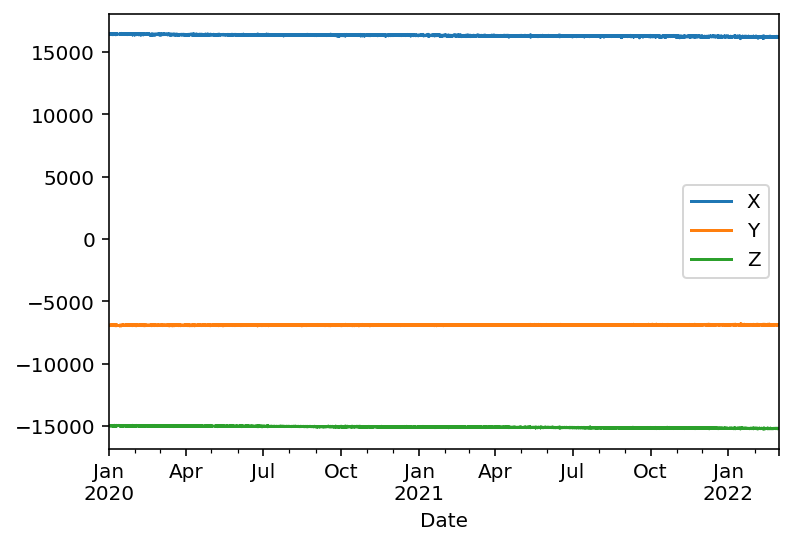

In [3]:
df.plot()

In [4]:
df_kp = dpt.Kp_index_correction(df,kp = 2)

In [17]:
df_kp = df_kp.resample('min').mean()

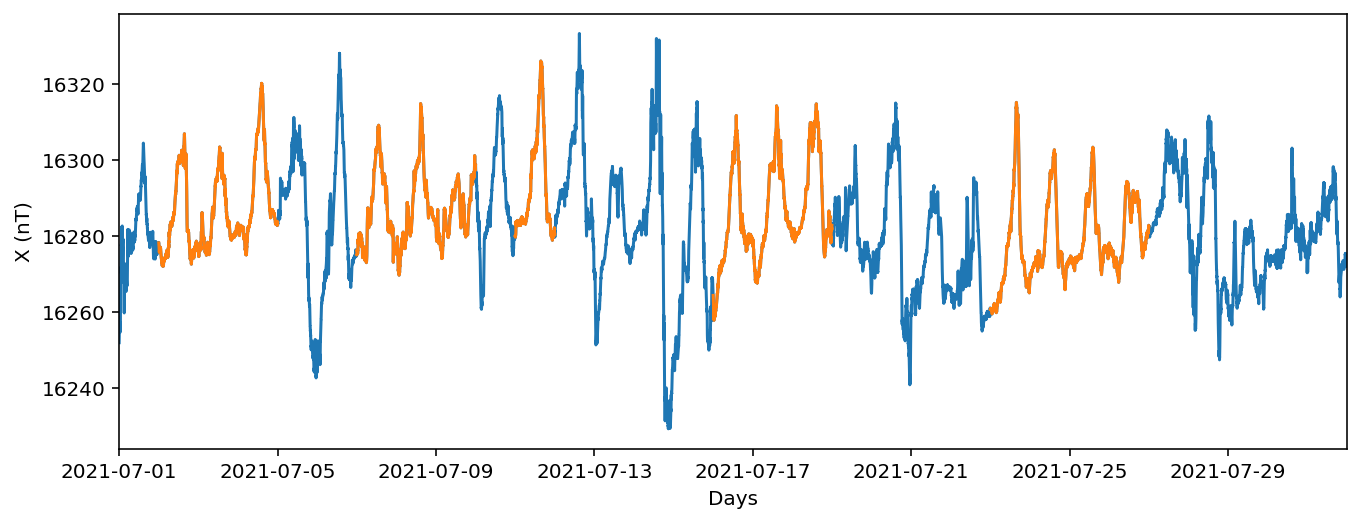

In [30]:
plt.figure(figsize = (11,4))

#for col, ax in zip(df.columns, axis.flatten()):
plt.plot(df.loc['2021-07']['X'])
plt.plot(df_kp.loc['2021-07']['X'])

plt.xlim(df.loc['2021-07'].index[0],df.loc['2021-07'].index[-1])
plt.xlabel('Days')
plt.ylabel('X (nT)')
plt.savefig('kp_method.jpeg',bbox_inches = 'tight', dpi = 300)

In [6]:
df_hf = dpt.hampel_filter_denoising(df,window_size=100,plot_figure=False)

Denoising the data


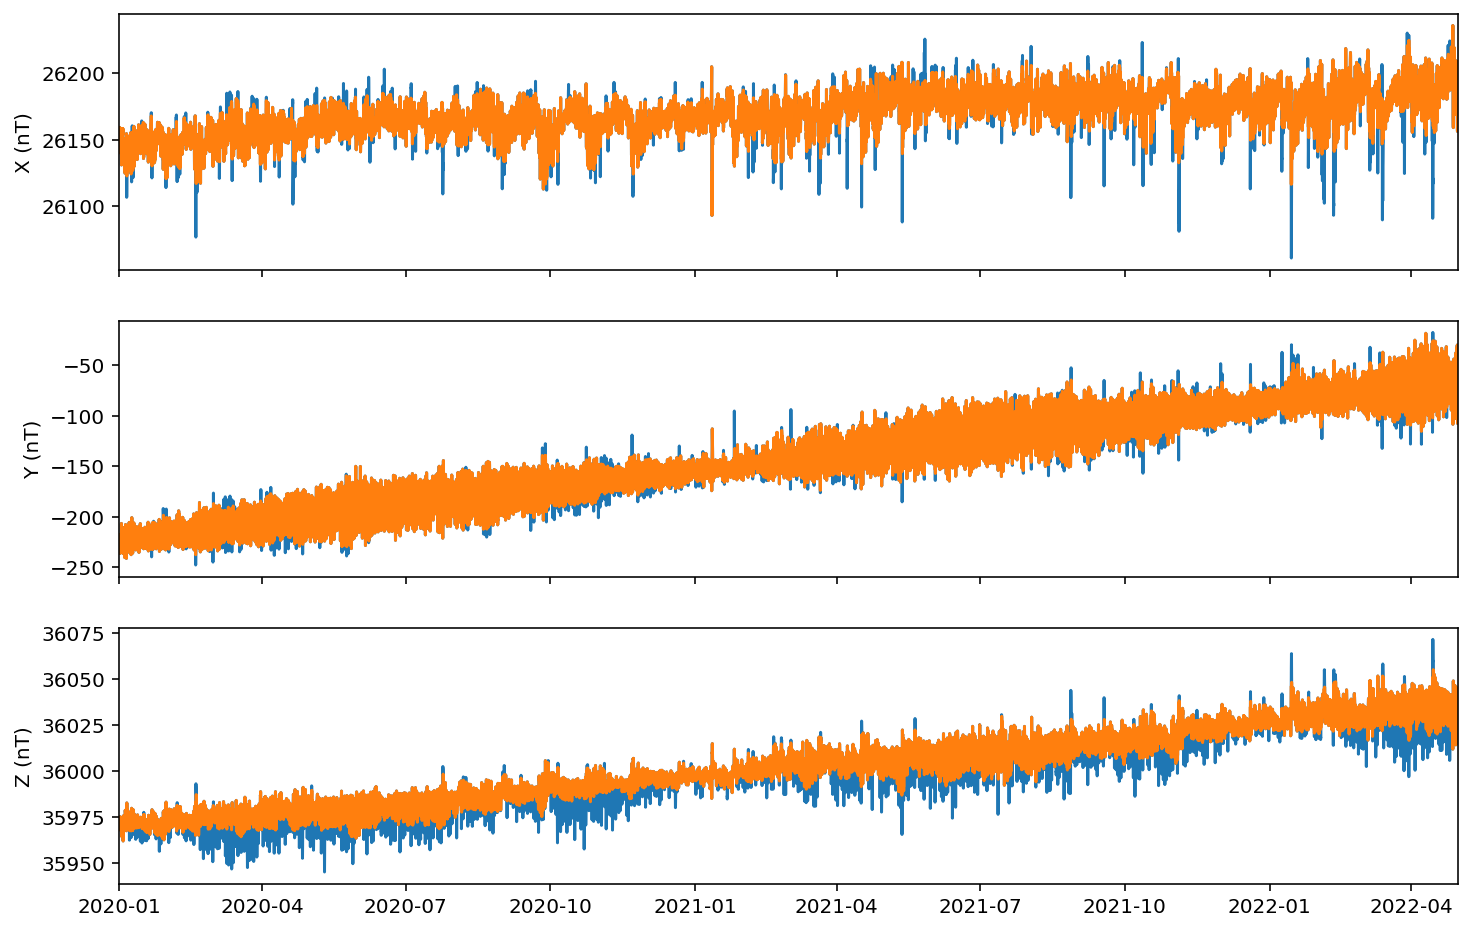

In [10]:
df
fig,axis = plt.subplots(3,1, figsize = (12,8), sharex = True)

for col, ax in zip(df.columns, axis.flatten()):
    ax.plot(df.resample('H').mean()[col])
    ax.set_xlim(df[col].index[0],df[col].index[-1])
    ax.set_ylabel(f'{col} (nT)')
    ax.plot(df_hf[col])

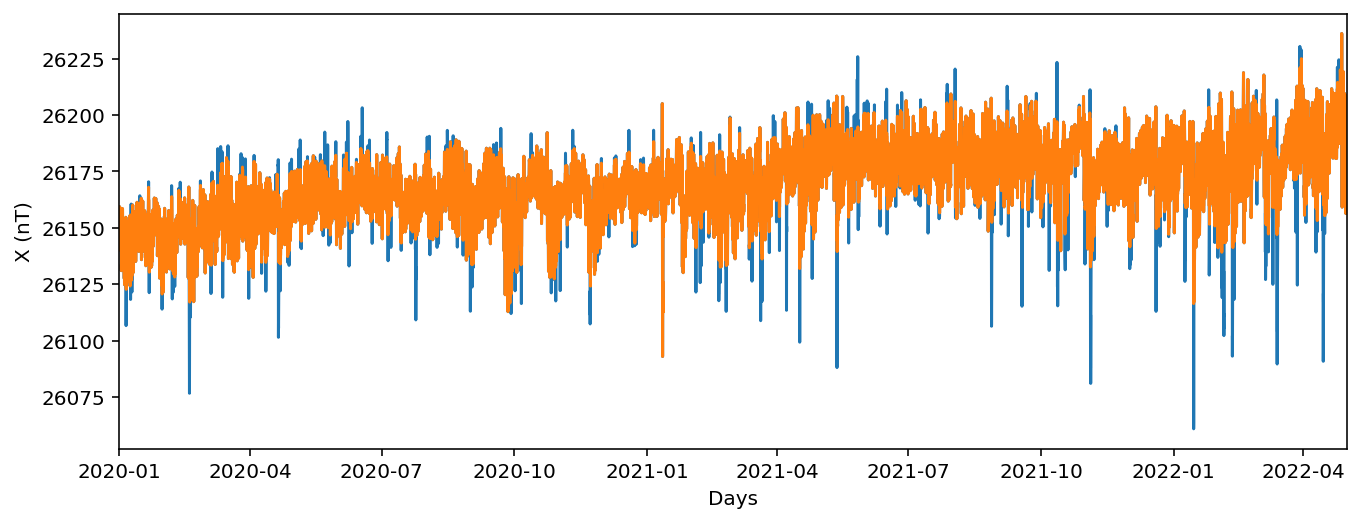

In [14]:
plt.figure(figsize = (11,4))

#for col, ax in zip(df.columns, axis.flatten()):
plt.plot(df.resample('H').mean()['X'])
plt.plot(df_hf['X'])
plt.xlim(df.index[0],df.index[-1])
plt.xlabel('Days')
plt.ylabel('X (nT)')
plt.savefig('hampel_method.jpeg',bbox_inches = 'tight', dpi = 300)

In [22]:
value =35
for i in range(len(ls)):
    if value > 2*ls.rolling(3).median()[i]:
        print('greater')

greater
greater
greater
greater


In [16]:
ls = pd.Series([10,11,10,15,21,11,1100])
ls.rolling(3).median()

0     NaN
1     NaN
2    10.0
3    11.0
4    15.0
5    15.0
6    21.0
dtype: float64

In [19]:
for i in range(len(ls)):
    print(2*ls.rolling(3).median()[i])

nan
nan
20.0
22.0
30.0
30.0
42.0


In [5]:
date_period = pd.date_range('20220601','20220620', freq = 'D')

for station in ['VSS0']:
    #directory_output = f'O:/jmat/{station.upper()}'
    print(directory_output)
    for date in date_period:
        files = glob.glob(f'{directory_output}/*date.ppm')
        
        
        

SyntaxError: EOL while scanning string literal (1970122558.py, line 7)

In [23]:
    station = 'TTB0'
    ftp = ftplib.FTP(f'ftp.gfz-potsdam.de')
    ftp.login('anonymous', 'email@email.com')

'230-\n230-Please avoid any denial of service.\n230-Do not use too many parallel sessions and PLEASE, do not fill up the filesystems.\n230-To assist you with this task you see the actual disk usage below. It is updated every minute.\n230-\n230-For any problems please write to ftpadmin@gfz-potsdam.de. We will surely find solutions for special needs.\n230-\n230-Filesystems free space in megabytes and differences since 6:00 MET and for this hour\n230-File-System                        Space-NOW      since 6:00  This-Hour\n230-/pub                                  19214          0          0\n230-/pub/ICDP                             15863          0          0\n230-/pub/ODYSSEUSWP6                    2096976          0          0\n230-/pub/champ                           174852        -17          0\n230-/pub/champ/chftp4                    115988          0          0\n230-/pub/gemex                            37931          0          0\n230-/pub/grace                            39870  

In [32]:
path_secppm = f'/pub/home/obs/data/relative/second/jmat/{station.upper()}'

#changing the ftp directory
ftp.cwd(path_secppm)

#files_ftp = ftp.nlst('*')

'250 CWD command successful.'

In [17]:
files_to_download = []
directory_output = f'O:/jmat/TTB0'
for file in files_ftp:
    if os.path.exists(f'{directory_output}/{file}') == False:
        files_to_download.append(file)

In [20]:
files_to_download.count() == 0:
    print('k')

SyntaxError: invalid syntax (1044914755.py, line 1)

In [21]:
ftp.quit()

error_temp: 421 Timeout (300 seconds): closing control connection.

In [33]:
filenames = ftp.nlst('TTB0_20220610*')

In [34]:
filenames

['TTB0_20220610.ppm', 'TTB0_20220610.sec']

In [2]:
df_ppm = pd.read_csv('O:/jmat/VSS0/VSS0_20200103.ppm',
                     header = None,
                     sep = '\s+',
                     usecols = [1, 2, 3],
                     names=['date', 'Time', 'F'],
                     parse_dates = {'Date': ['date', 'Time']},
                     index_col = 'Date')

In [3]:
df_ppm

F
Date                         
2020-01-03 00:00:00  23381.90
2020-01-03 00:00:01  23381.90
2020-01-03 00:00:02  23381.90
2020-01-03 00:00:03  23381.90
2020-01-03 00:00:04  23381.90
...                       ...
2020-01-03 23:59:55  23368.55
2020-01-03 23:59:56  23368.55
2020-01-03 23:59:57  23368.55
2020-01-03 23:59:58  23368.55
2020-01-03 23:59:59  23368.55

[86400 rows x 1 columns]

In [2]:
df = mvs.load_INTERMAGNET_files('VSS', '2010-01-01','2021-12-31')

Reading files from VSS...


In [4]:
df_h = dpt.resample_obs_data(df, sample = 'H' )

In [9]:
df_nt = dpt.night_time_selection(station = 'VSS', dataframe = df_h)

The night time period was selected.


In [11]:
df_nt.loc['2010-01-01']

X            Y             Z
Date                                                        
2010-01-01 02:29:30  17402.988333 -7021.710000 -13920.740000
2010-01-01 03:29:30  17403.218333 -7022.933333 -13920.296667
2010-01-01 04:29:30  17404.051667 -7024.091667 -13919.665000
2010-01-01 05:29:30  17403.955000 -7024.611667 -13919.883333
2010-01-01 06:29:30  17404.485000 -7024.738333 -13919.858333
2010-01-01 07:29:30  17403.688333 -7025.493333 -13920.253333
2010-01-01 08:29:30  17403.761667 -7025.963333 -13921.168333

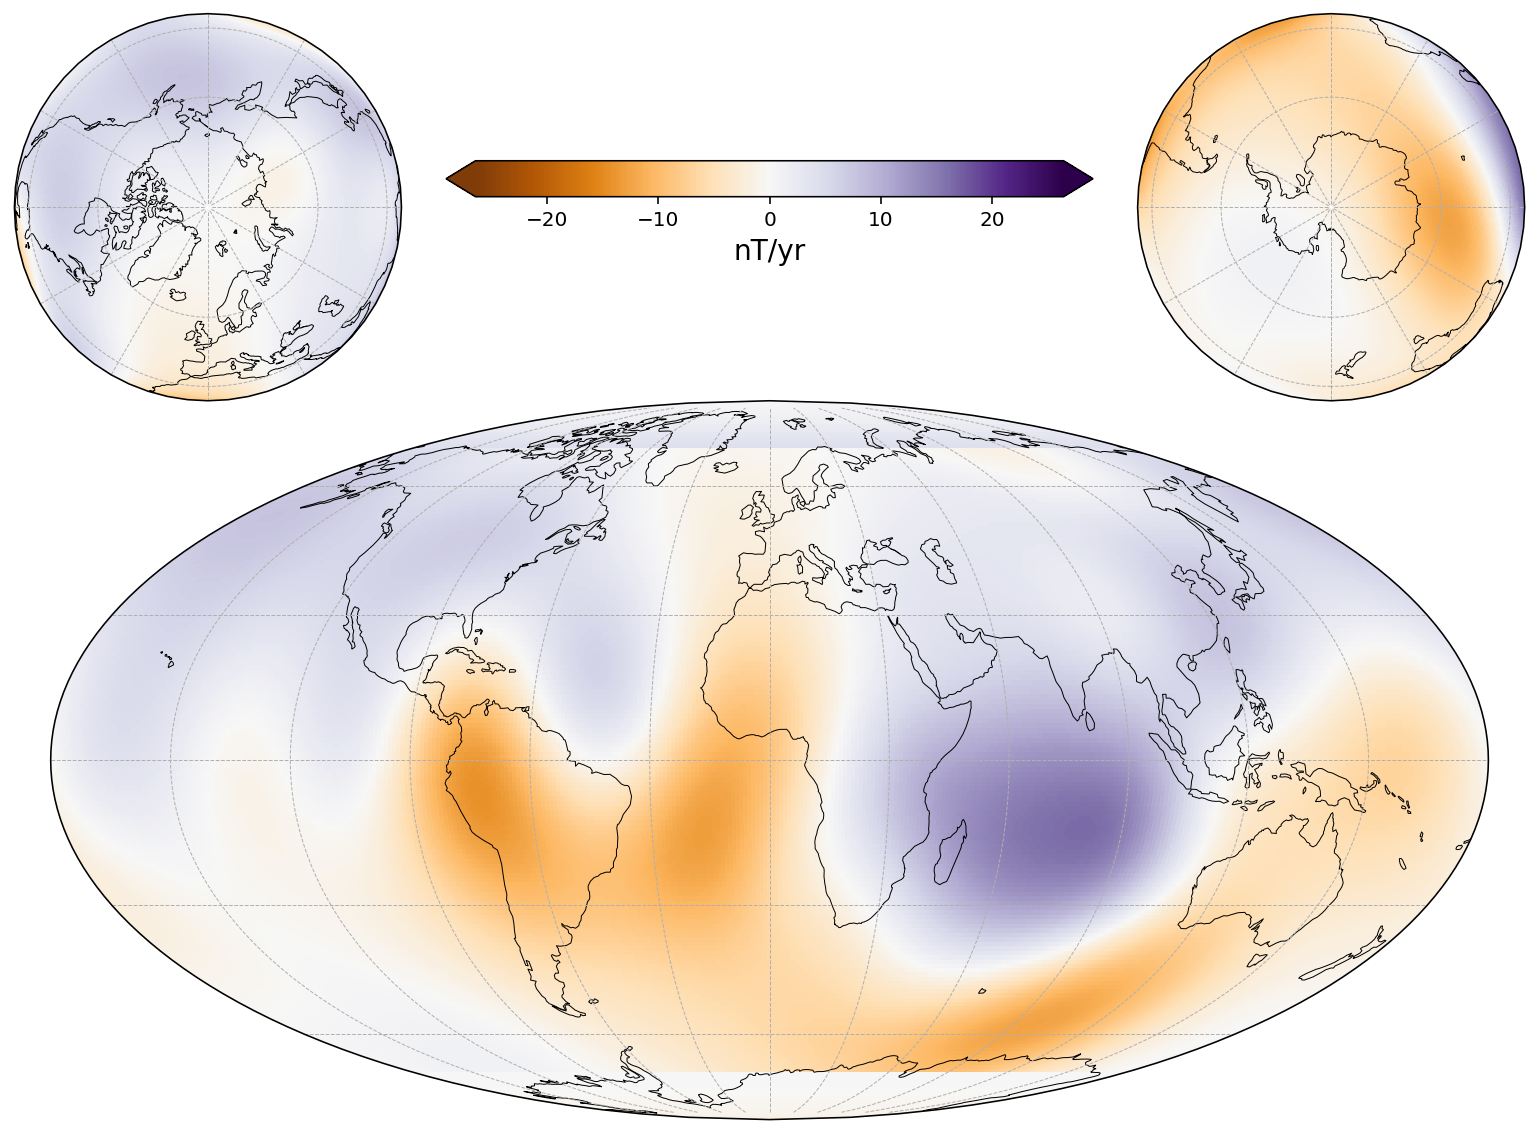

In [2]:
mvs.plot_tdep_map('2007-01-01',2)

In [3]:
from openpyxl import load_workbook, Workbook
spreadsheet = load_workbook(filename='jerk_stats_methods.xlsx')

In [6]:
data_2007 = {'t0':[2005.75, 2006],'A':[4.75, 4.6]}
#data_ebr = {'t0':[2006.28, 2006.4],'A':[6.16, 5.6]}
#data_tam = {'t0':[2005.79, 2005.7],'A':[8.15, 8.2]}
#data_asc = {'t0':[2006.9, 2006.9],'A':[22.72, 23.4]}

In [1]:
a_y_2007 = {'CHAOS':8.06,'KP':8.11, 'NT': 6.37, 'QD': 5.61}
t0_y_2007 = {'CHAOS':45.89,'KP':44.32, 'NT': 28.68, 'QD': 45.67}

a_z_2007 = {'CHAOS':19.69,'KP':9.49, 'NT': 3.33, 'QD': 5.05}
t0_z_2007 = {'CHAOS':69.35,'KP':21.90, 'NT': 18.25, 'QD': 18.77}

a_x_2011 = {'CHAOS':53.24,'KP':25.26, 'NT': 8.00, 'QD': 21.10}
t0_x_2011 = {'CHAOS':216.57,'KP':10.95, 'NT': 24.33, 'QD': 93.69}

a_y_2011 = {'CHAOS':20.01,'KP':12.40, 'NT': 11.88, 'QD': 7.58}
t0_y_2011 = {'CHAOS':107.88,'KP':112.74, 'NT': 58.4, 'QD': 39.34}

a_z_2011 = {'CHAOS':10.86,'KP':1.75, 'NT': 3.63, 'QD': 3.88}
t0_z_2011 = {'CHAOS':69.35,'KP':21.90, 'NT': 18.25, 'QD': 18.77}

a_x_2014 = {'CHAOS':24.96,'KP':16.92, 'NT': 5.19, 'QD': 13.70}
t0_x_2014 = {'CHAOS':472.67,'KP':25.55, 'NT': 25.55, 'QD': 14.6}

a_y_2014 = {'CHAOS':4.42,'KP':3.83, 'NT': 4.01, 'QD': 2.73}
t0_y_2014 = {'CHAOS':148.28,'KP':104.48, 'NT': 60.22, 'QD': 104.02}

a_z_2014 = {'CHAOS':11.03,'KP':4.90, 'NT': 5.02, 'QD': 4.28}
t0_z_2014 = {'CHAOS':143.72,'KP':26.46, 'NT': 33.31, 'QD': 18.71}

In [4]:
t0_x = {'CHAOS':349.49,'KP':44.46, 'NT': 32.85, 'QD': 53.29}
a_x = {'CHAOS':39.20,'KP':19.89, 'NT': 6.64, 'QD': 16.48}

t0_y = {'CHAOS':100.68,'KP':87.18, 'NT': 49.10, 'QD': 61.35}
a_y = {'CHAOS':8.66,'KP':7.44, 'NT': 7.19, 'QD': 5.45}

t0_z = {'CHAOS':105.78,'KP':22.55, 'NT': 22.05, 'QD': 19.44}
a_z = {'CHAOS':15.49,'KP':5.38, 'NT': 3.93, 'QD': 4.41}

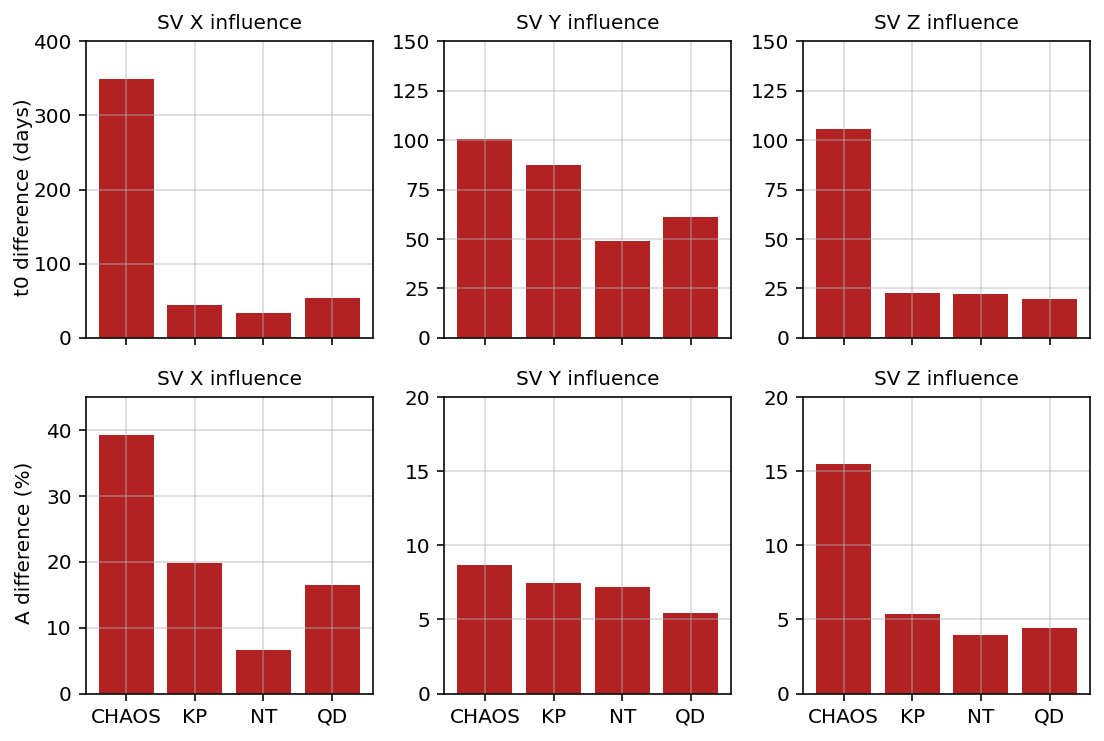

In [5]:
fig, axes = plt.subplots(2,3, figsize = (9,6), sharex = True)

for data, ax, comp in zip([t0_x, t0_y, t0_z, a_x, a_y, a_z], axes.flatten(), ['X','Y','Z','X','Y','Z']):
    ax.grid(alpha = 0.5)
    ax.bar(data.keys(), data.values(), color = 'firebrick')
    ax.set_title(f'SV {comp} influence', fontsize = 10)
    
    
#axes[0,1].get_yaxis().set_visible(False)
#axes[0,2].get_yaxis().set_visible(False)
axes[0,0].set_ylim(0,400)
axes[0,1].set_ylim(0,150)
axes[0,2].set_ylim(0,150)
axes[1,1].set_ylim(0,20)
axes[1,2].set_ylim(0,20)
axes[1,0].set_ylim(0,45)
fig.subplots_adjust(wspace=0.25, hspace = 0.2)
fig.text(0.07, 0.3, 'A difference (%)', va='center', rotation='vertical',fontsize = 10)
fig.text(0.07, 0.7, 't0 difference (days)', va='center', rotation='vertical',fontsize = 10)


plt.savefig('bar_graph_jerk.jpeg', dpi = 300, bbox_inches = 'tight')
plt.show()

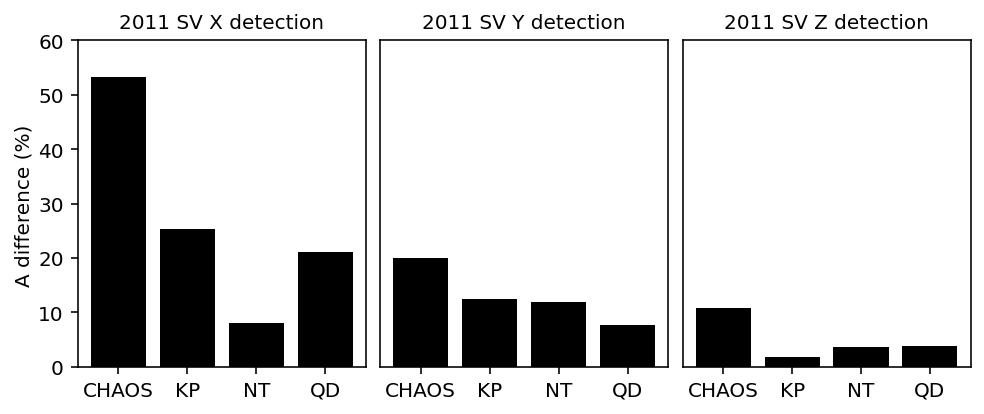

In [4]:
fig, axes = plt.subplots(1,3, figsize = (8,3), sharey = True)

for data, ax, comp in zip([a_x_2011, a_y_2011, a_z_2011], axes, ['X','Y','Z']):
    ax.bar(data.keys(), data.values(),color = 'black')
    ax.set_title(f'2011 SV {comp} detection', fontsize = 10)
    ax.set_ylim(0,60)
    axes[1].get_yaxis().set_visible(False)
    axes[2].get_yaxis().set_visible(False)
fig.text(0.07, 0.5, 'A difference (%)', va='center', rotation='vertical',fontsize = 10)
fig.subplots_adjust(wspace=0.05)   

Text(0.07, 0.5, 'A difference (%)')

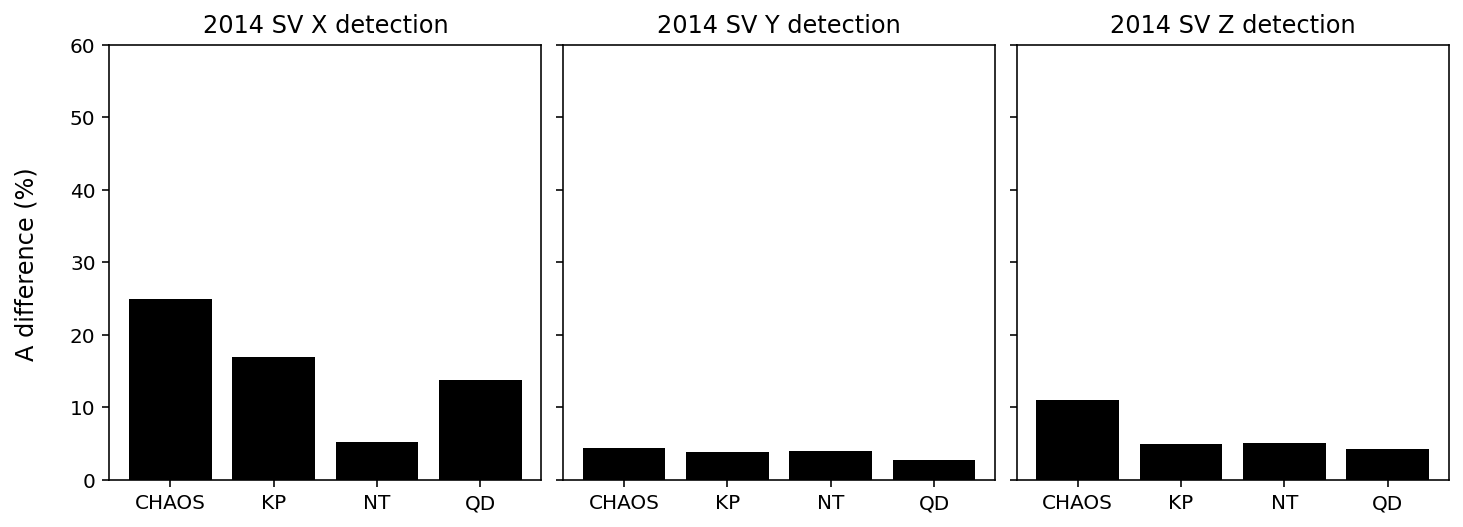

In [87]:
fig, axes = plt.subplots(1,3, figsize = (12,4), sharey = True)

for data, ax, comp in zip([a_x_2014, a_y_2014, a_z_2014], axes, ['X','Y','Z']):
    ax.bar(data.keys(), data.values(), color = 'black')
    ax.set_title(f'2014 SV {comp} detection')
    ax.set_ylim(0,60)
fig.subplots_adjust(wspace=0.05)  
fig.text(0.07, 0.5, 'A difference (%)', va='center', rotation='vertical',fontsize = 12)
